In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn import preprocessing
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from tqdm.auto import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from multiprocessing import cpu_count
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.fft import fft
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, BatchNormalization, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2 

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10

tqdm.pandas()

# Preprocessing And Plotting The Training Data 

In [3]:
df = pd.read_csv("machines.csv")

In [4]:
import pandas as pd

# Assuming df is your DataFrame and 'Label' is the column containing the labels
# Replace 'NORMAL ' with 'NORMAL'
df['Category'] = df['Category'].replace({'NORMAL ': 'NORMAL'})

# Now, you can proceed with your analysis or visualization using the updated DataFrame


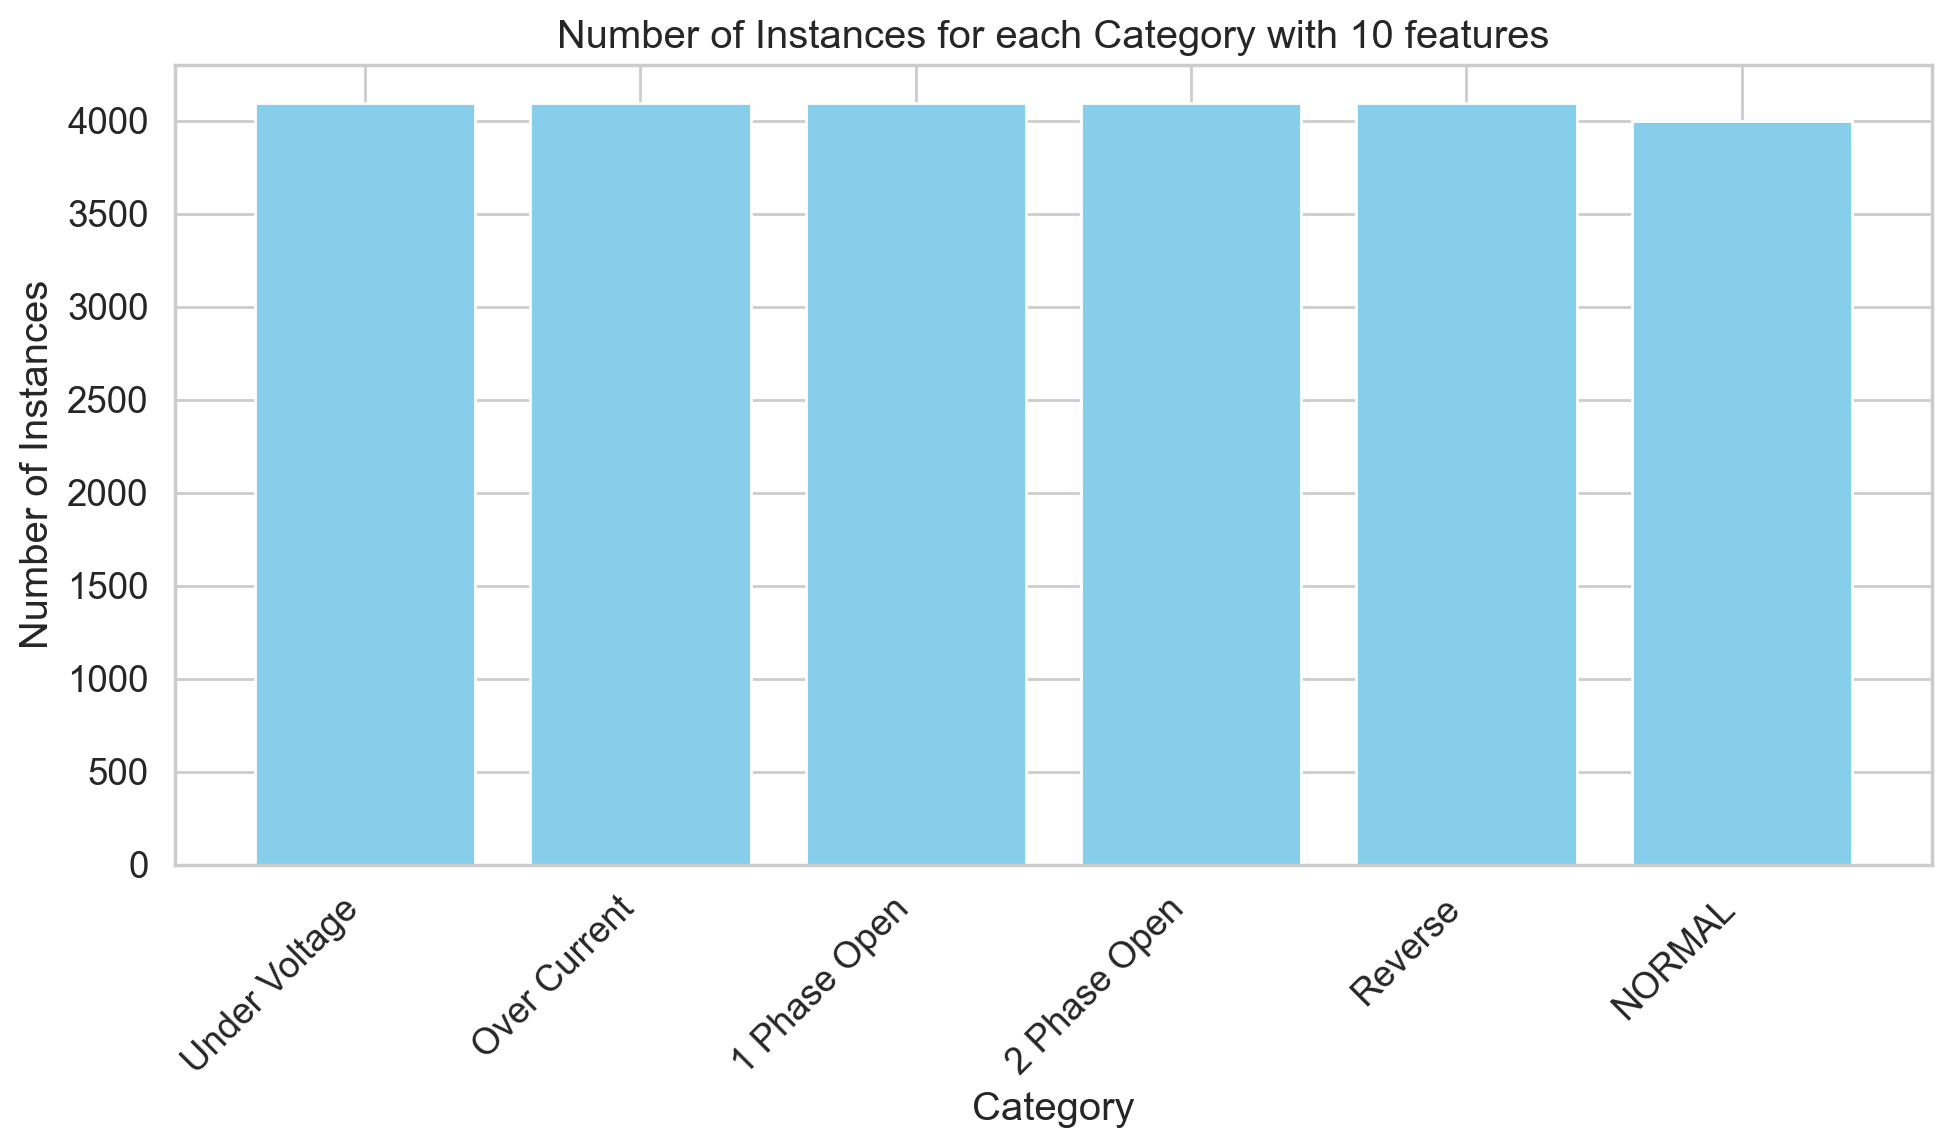

In [5]:
num_features = len(df.columns) - 1  # Assuming the last column is the label
label_counts = df['Category'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Instances')
plt.title(f'Number of Instances for each Category with {num_features} features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [6]:
print(df.columns)


Index(['Time', 'E1', 'I1', 'E2', 'I2', 'E3', 'I3', 'AI8', 'Pm', 'Torque',
       'Category'],
      dtype='object')


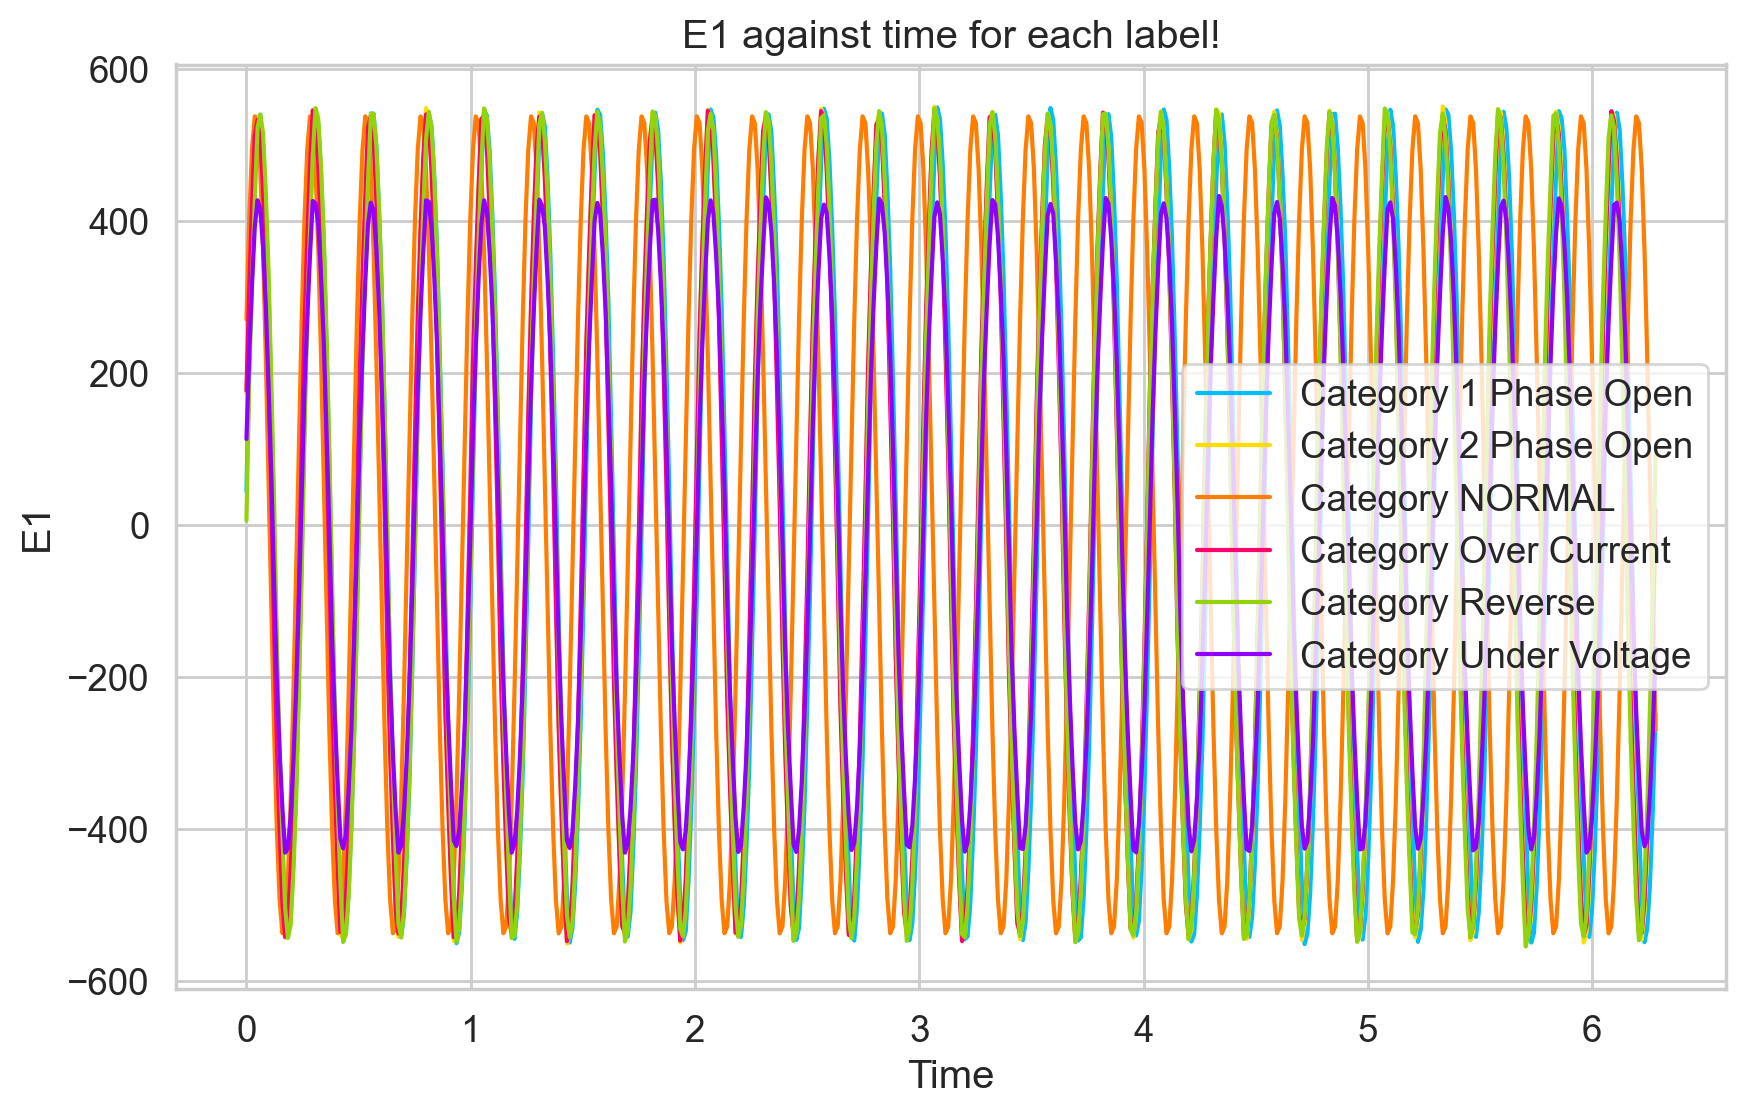

In [7]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(511)

# Generate time values
num_readings = 511
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['E1'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('E1')
plt.title('E1 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

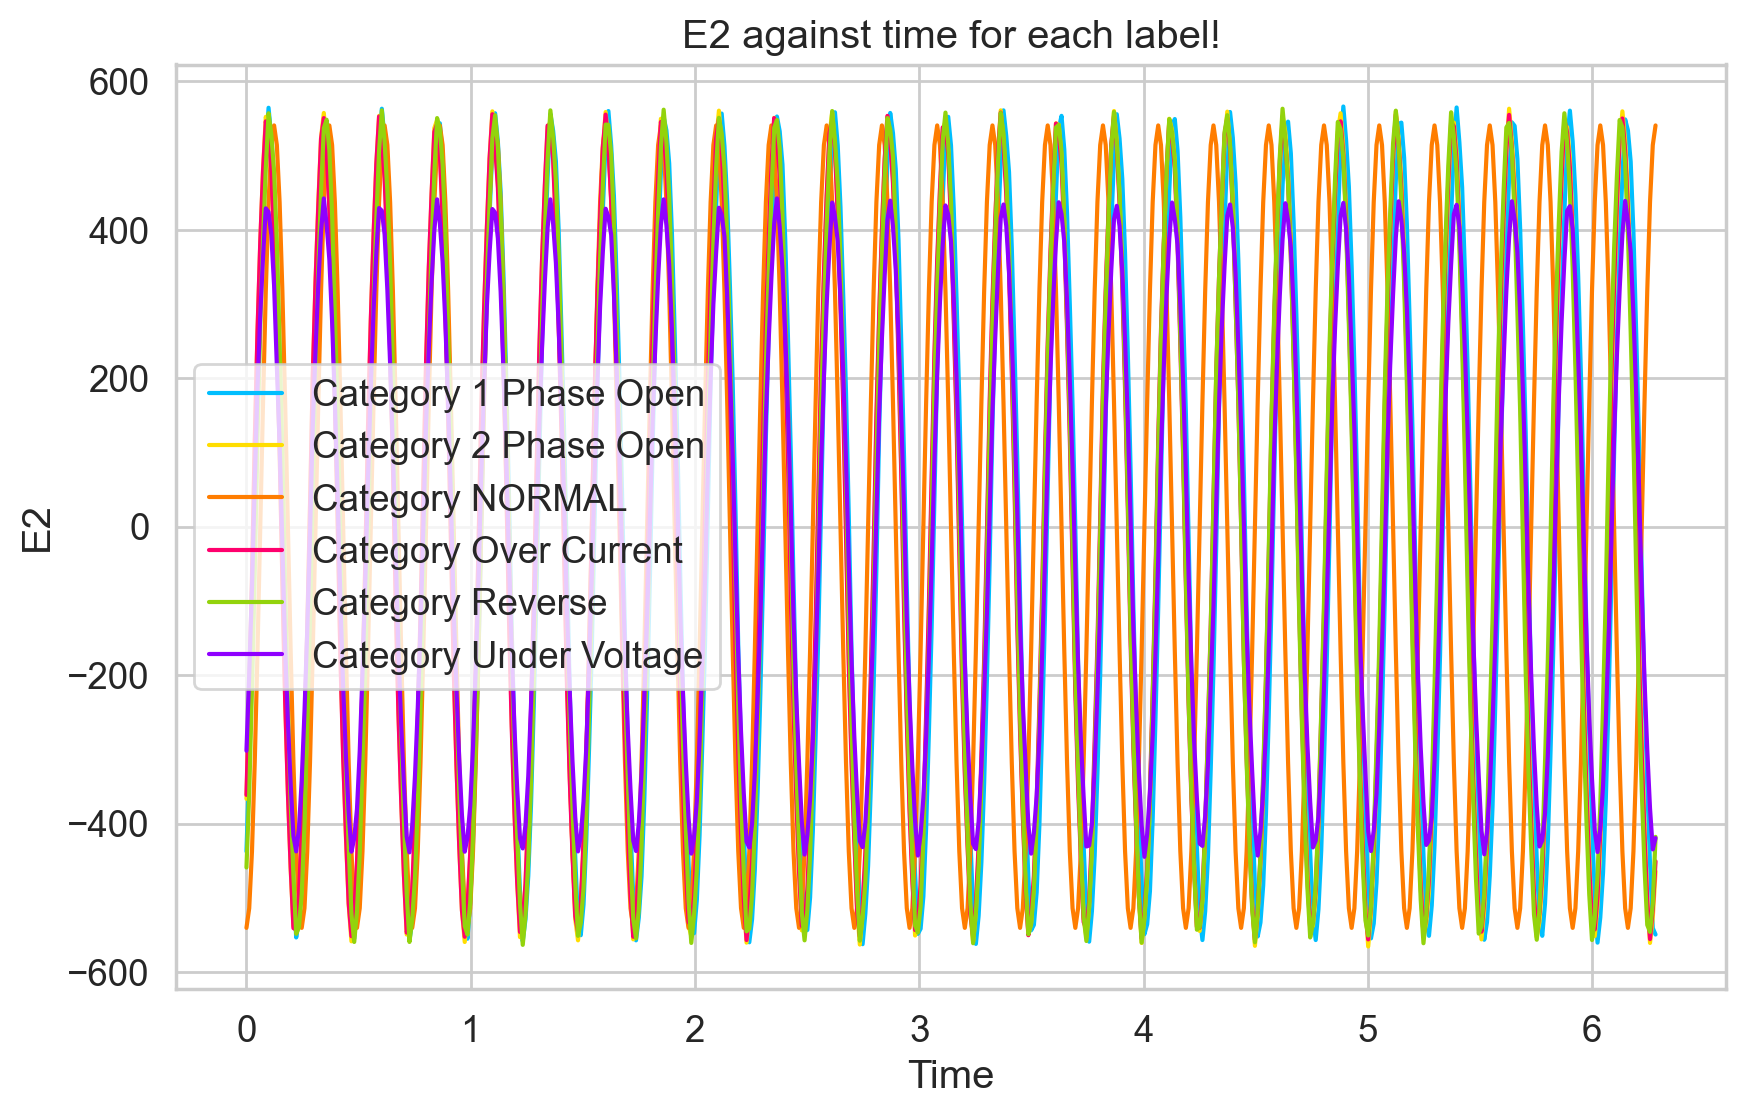

In [8]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(511)

# Generate time values
num_readings = 511
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['E2'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('E2')
plt.title('E2 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

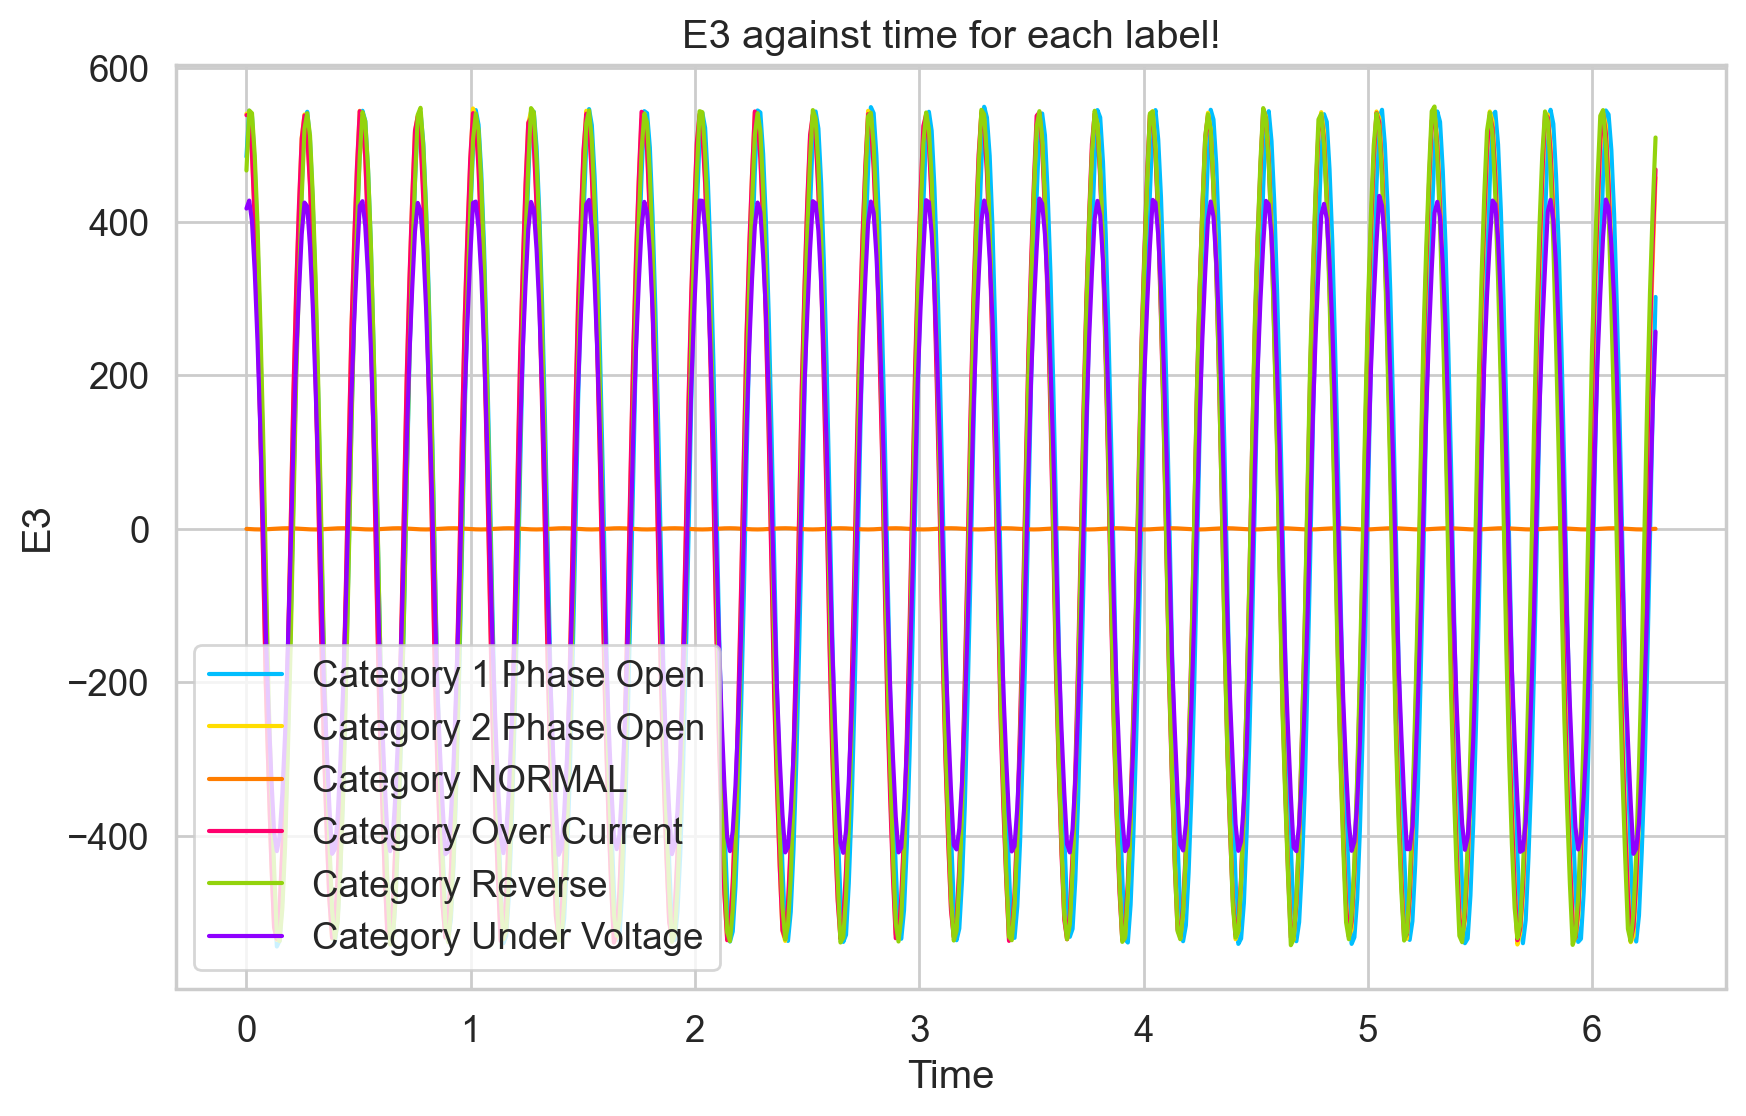

In [32]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(511)

# Generate time values
num_readings = 511
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['E3'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('E3')
plt.title('E3 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

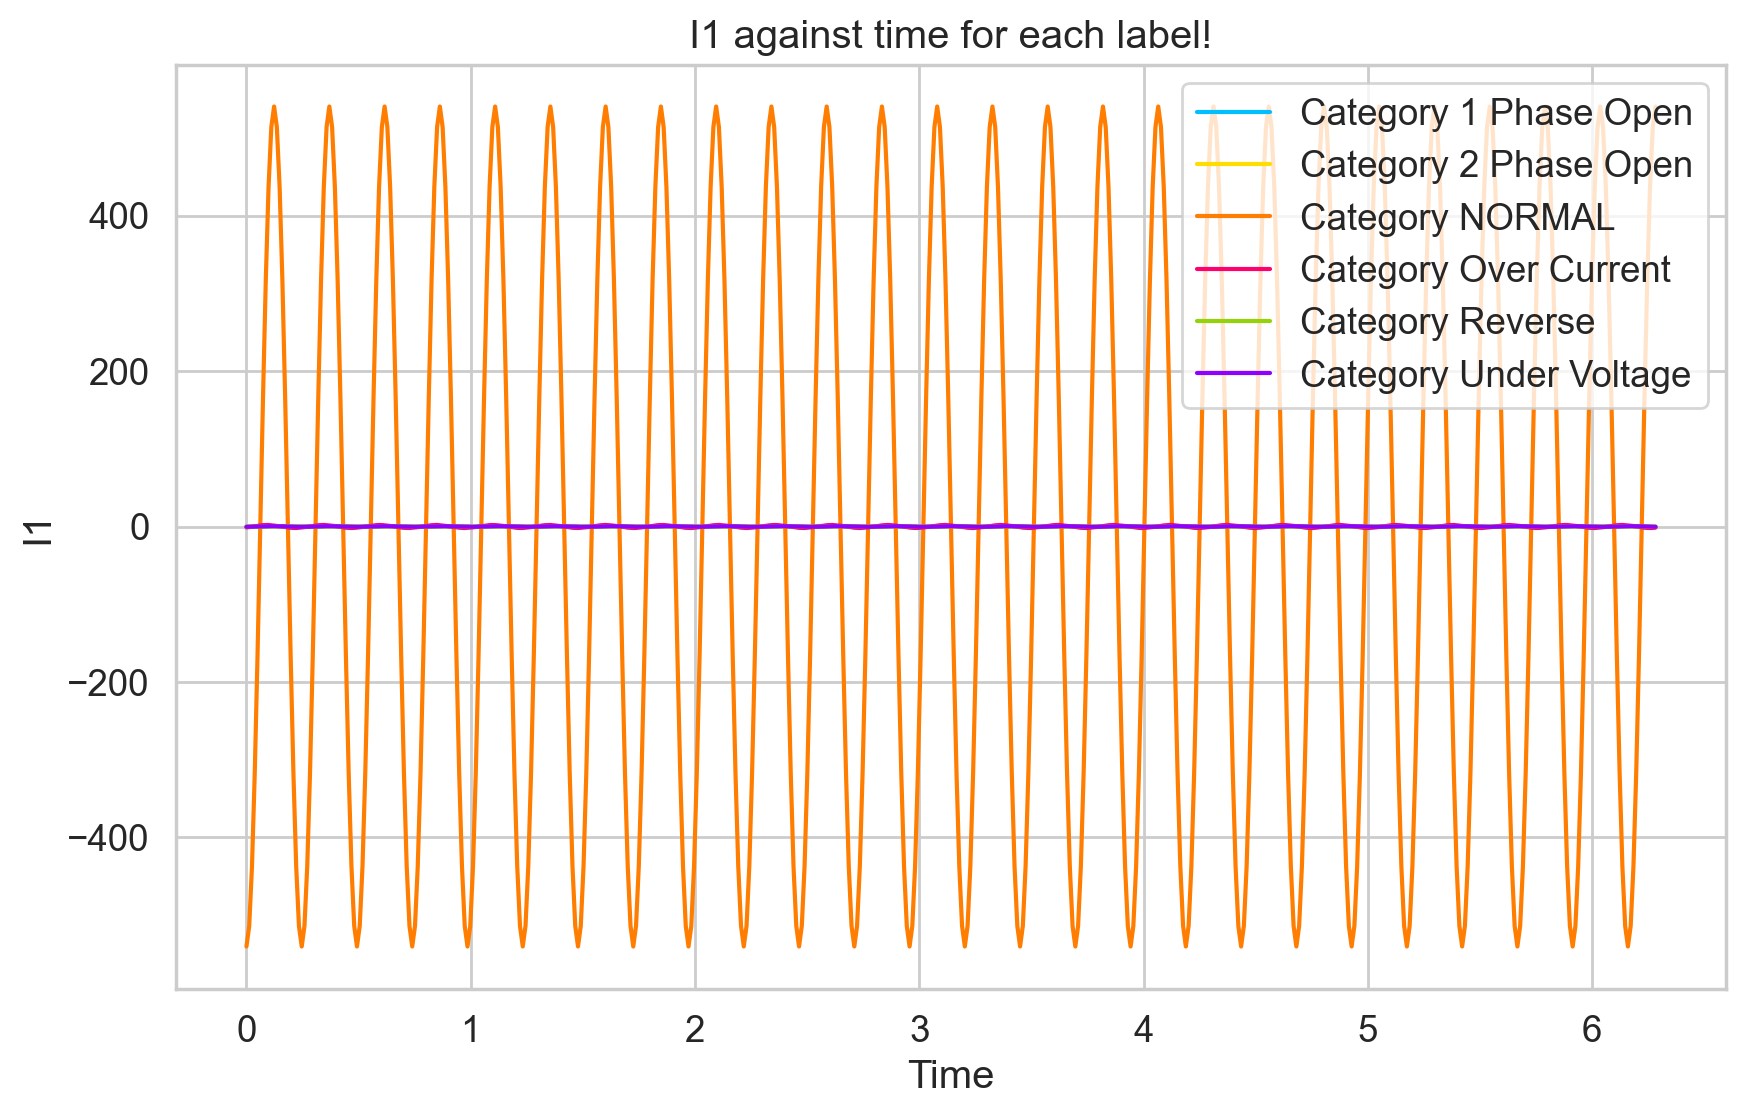

In [33]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(511)

# Generate time values
num_readings = 511
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['I1'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('I1')
plt.title('I1 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

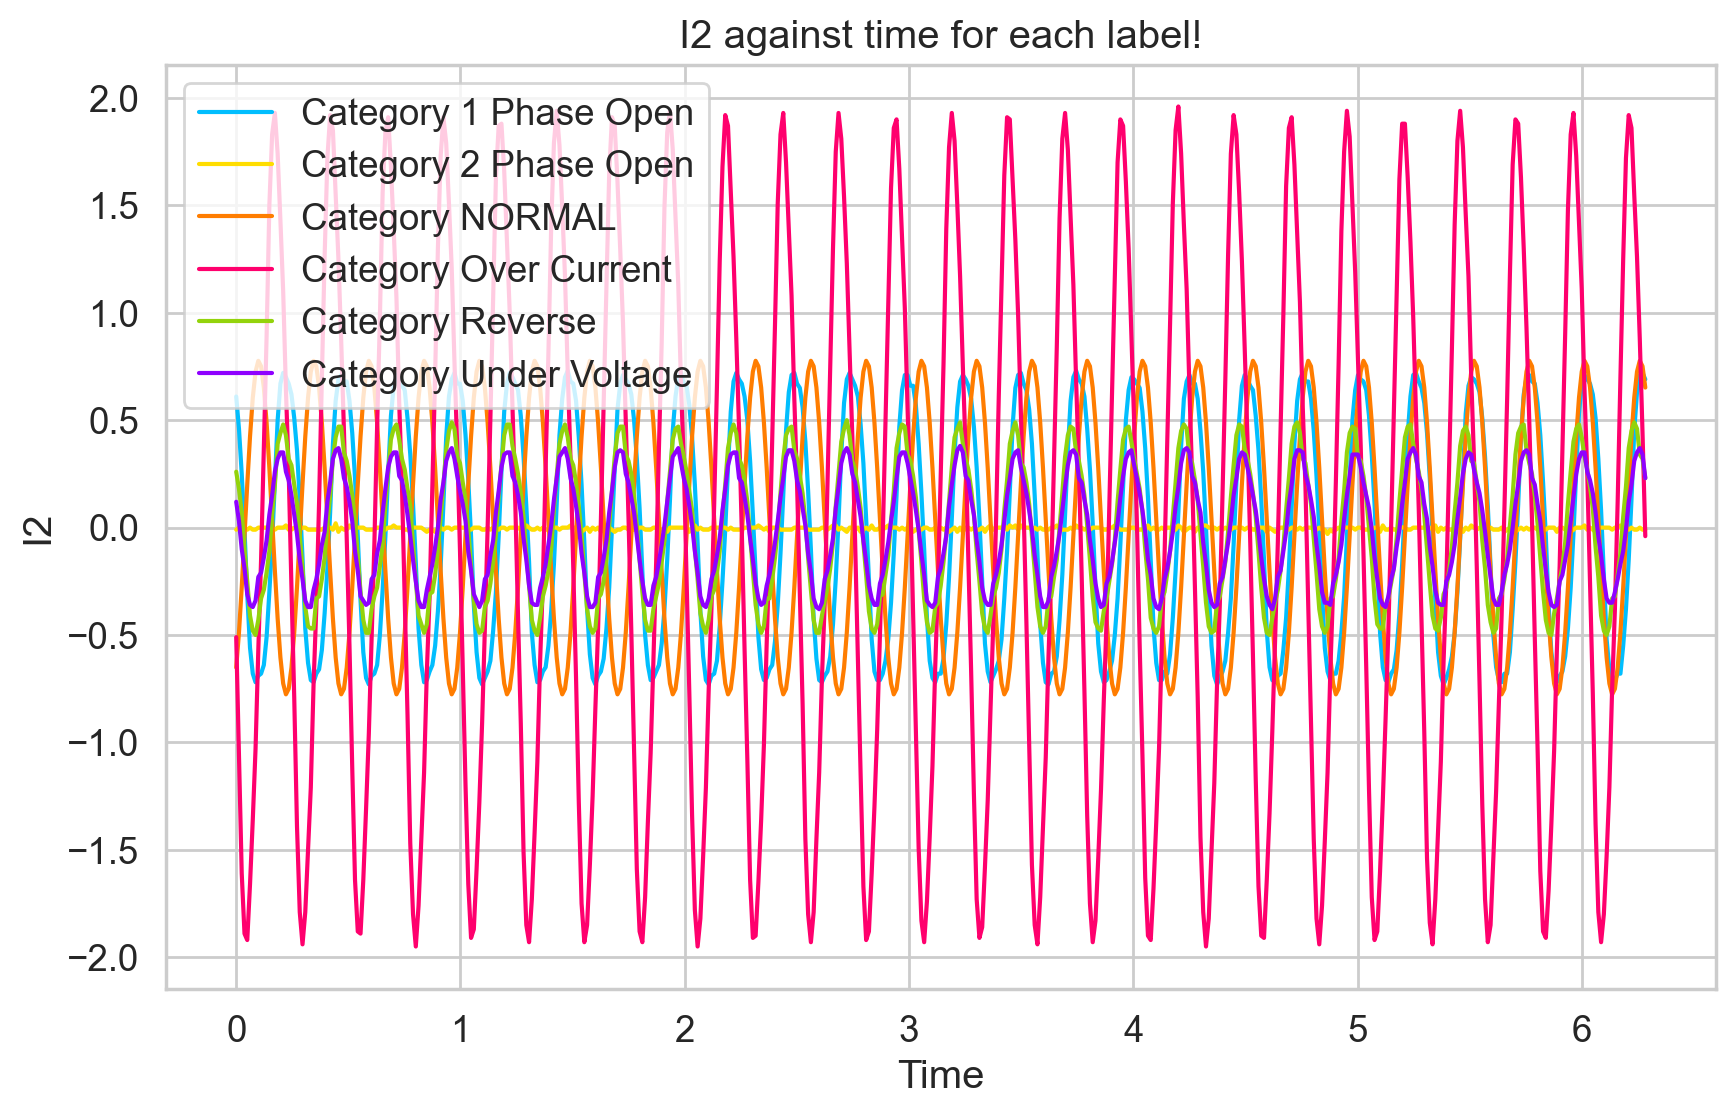

In [34]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(511)

# Generate time values
num_readings = 511
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['I2'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('I2')
plt.title('I2 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

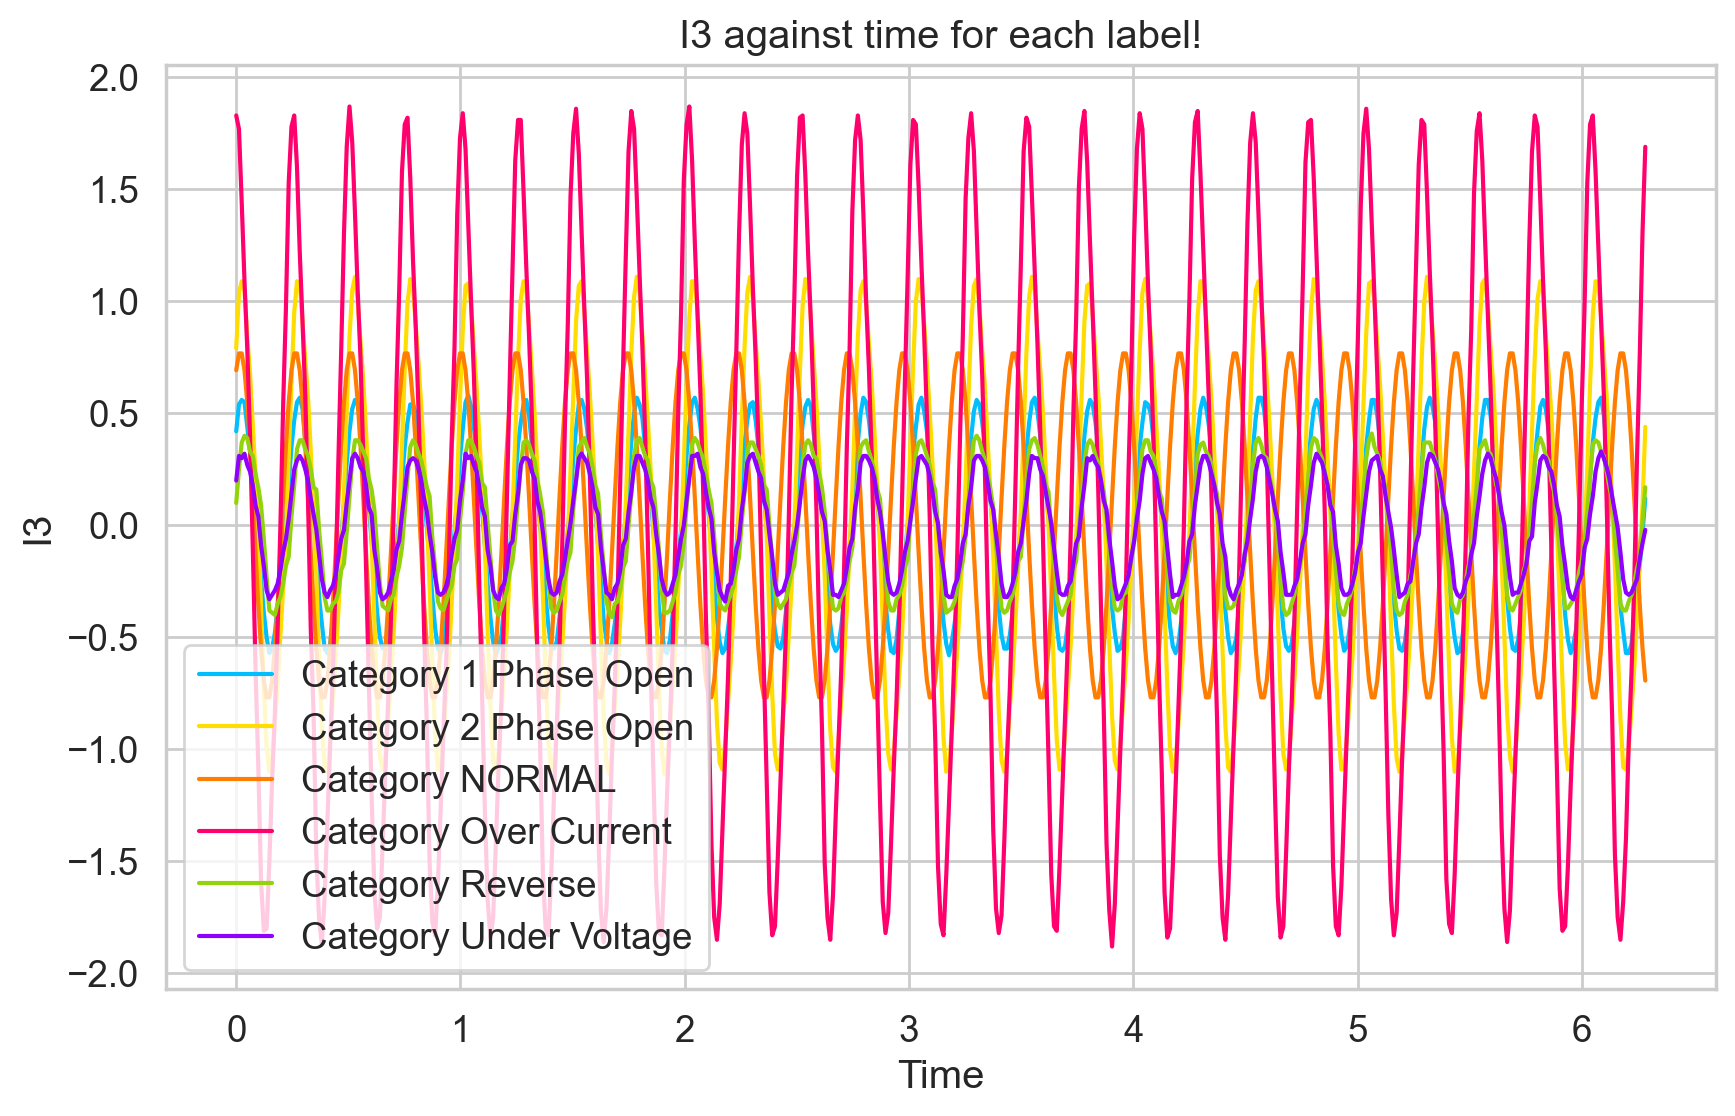

In [35]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(511)

# Generate time values
num_readings =511
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['I3'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('I3')
plt.title('I3 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

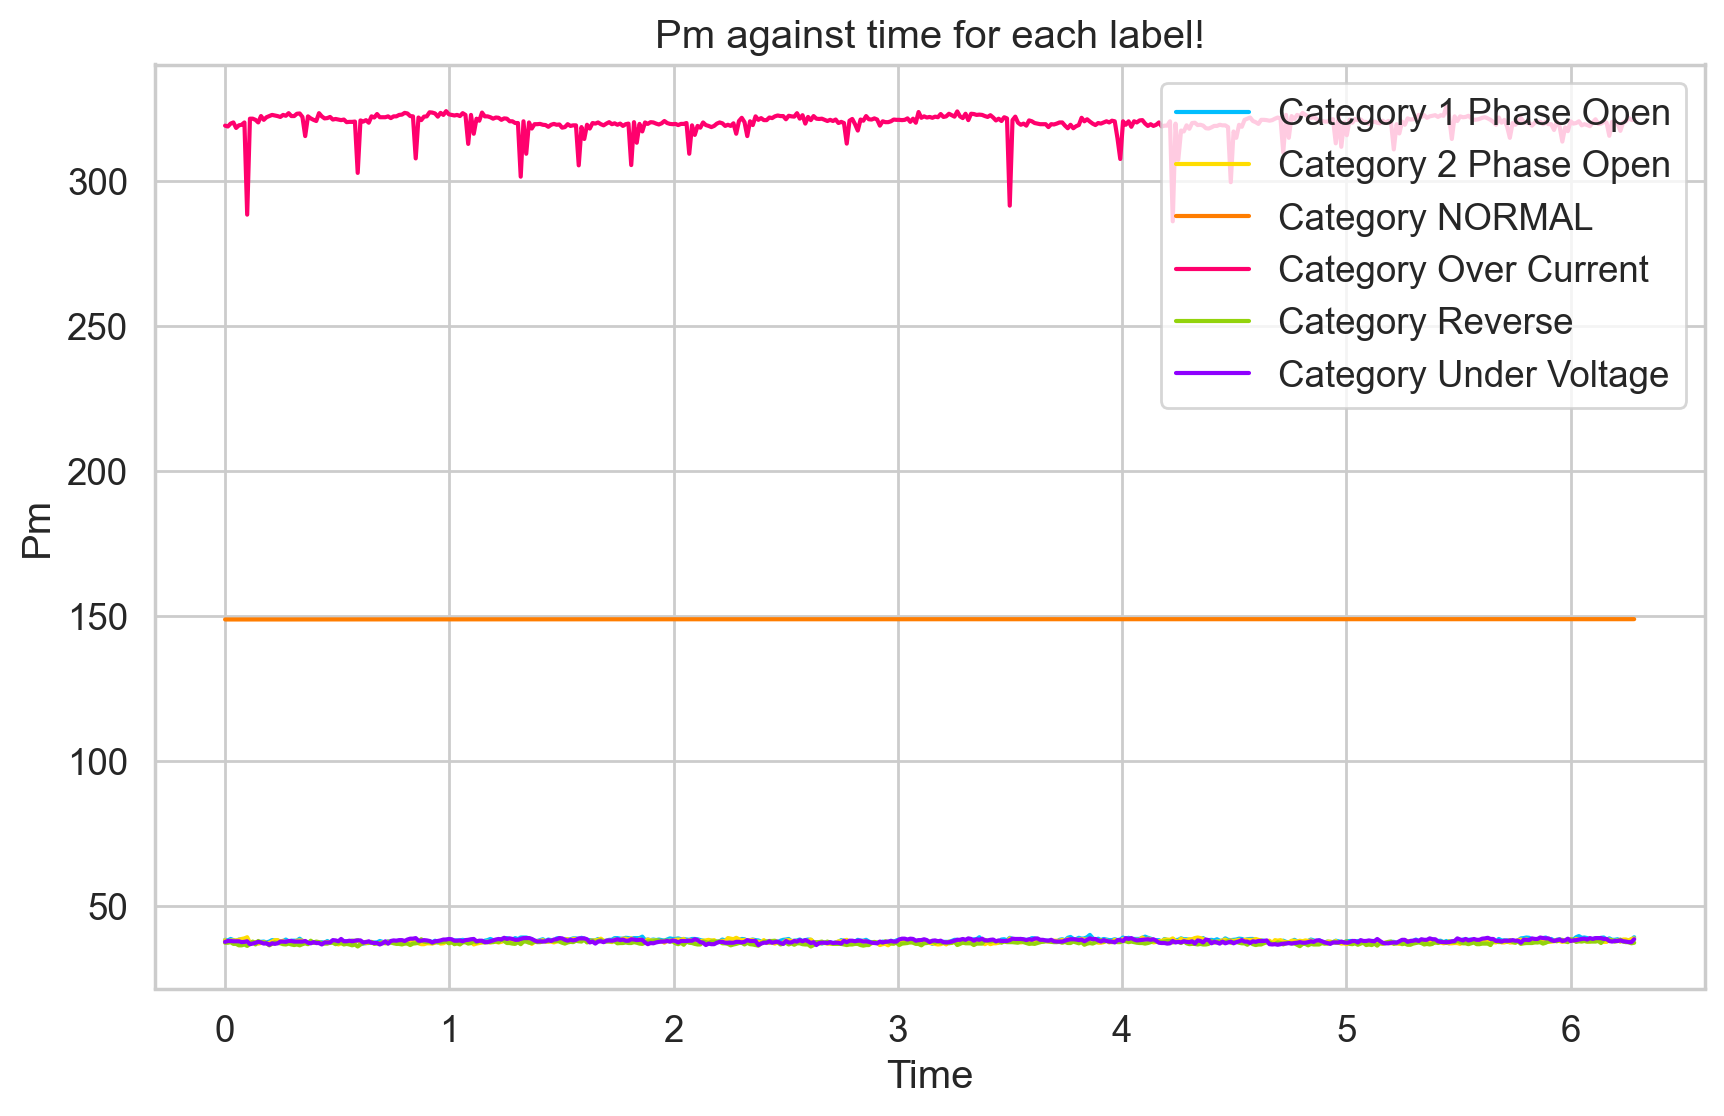

In [36]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(511)

# Generate time values
num_readings = 511
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['Pm'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('Pm')
plt.title('Pm against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
df.dropna(inplace=True) #Drop NA Vals
missing_values_count = df.isnull().sum()                # Get the number of missing data points per column
missing_values_count[0:10]

Time      0
E1        0
I1        0
E2        0
I2        0
E3        0
I3        0
AI8       0
Pm        0
Torque    0
dtype: int64

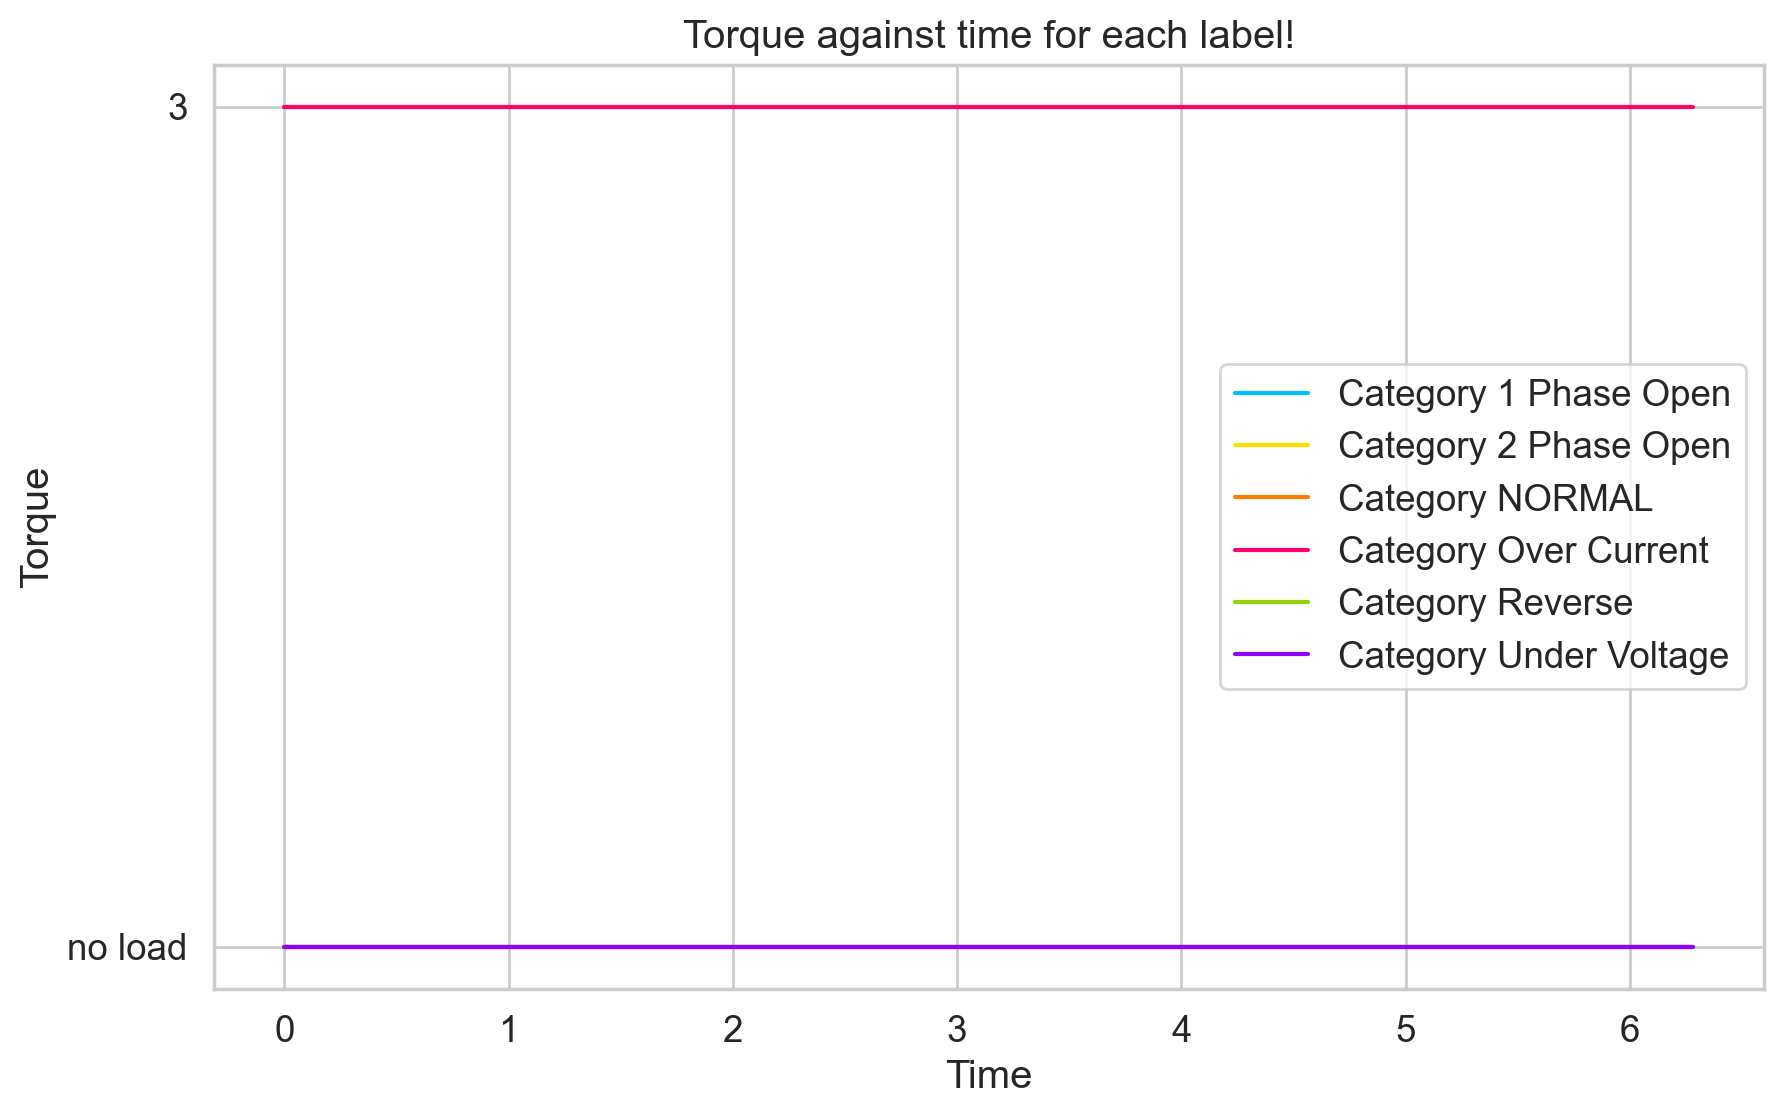

In [32]:
# Take the first 512 values for each label
subset_df = df.groupby('Category').head(511)

# Generate time values
num_readings = 511
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['Torque'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('Torque')
plt.title('Torque against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
df_unused = pd.read_csv("Unused Data.csv")

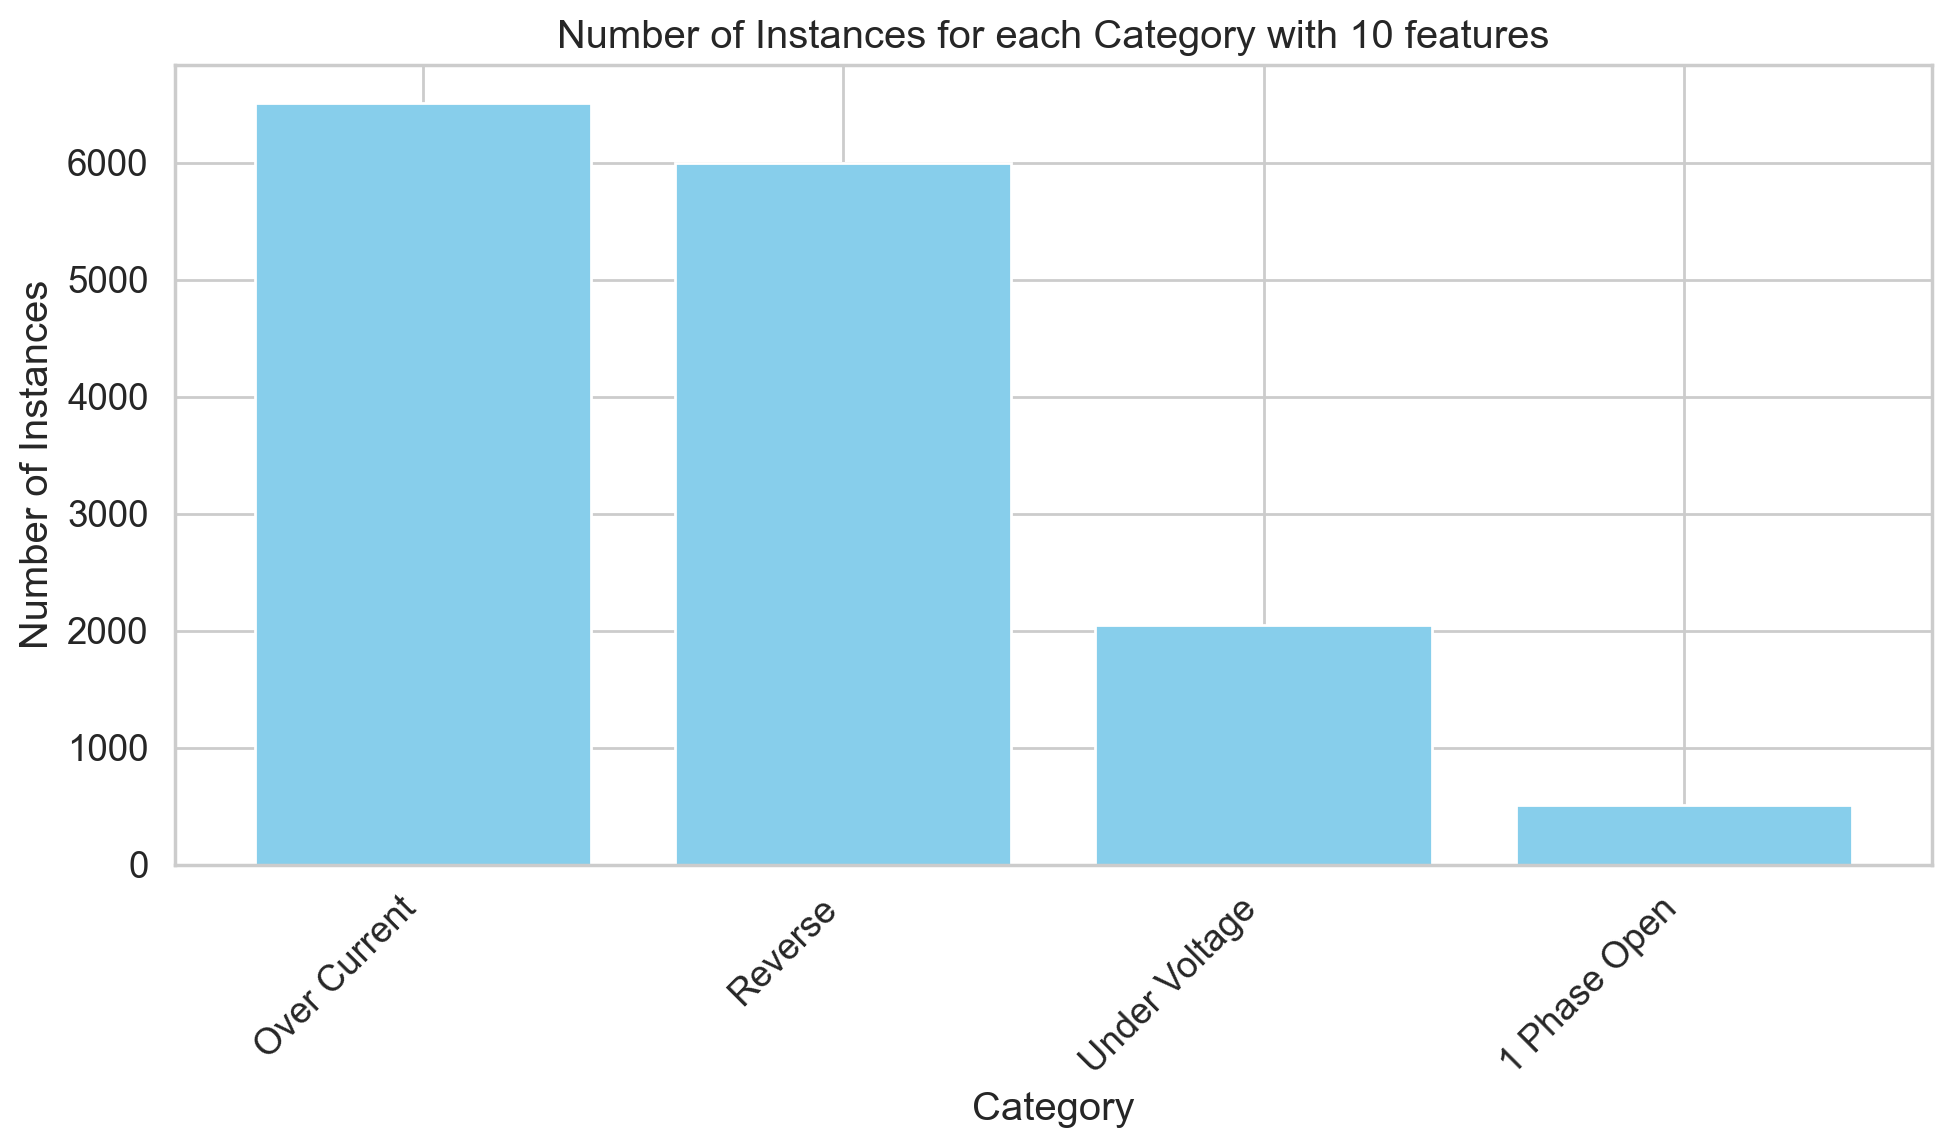

In [25]:
num_features = len(df_unused.columns) - 1  # Assuming the last column is the label
label_counts = df_unused['Category'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Instances')
plt.title(f'Number of Instances for each Category with {num_features} features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Plotting And Preprocessing The Test Data

In [19]:
df_test = pd.read_csv("machines test.csv")

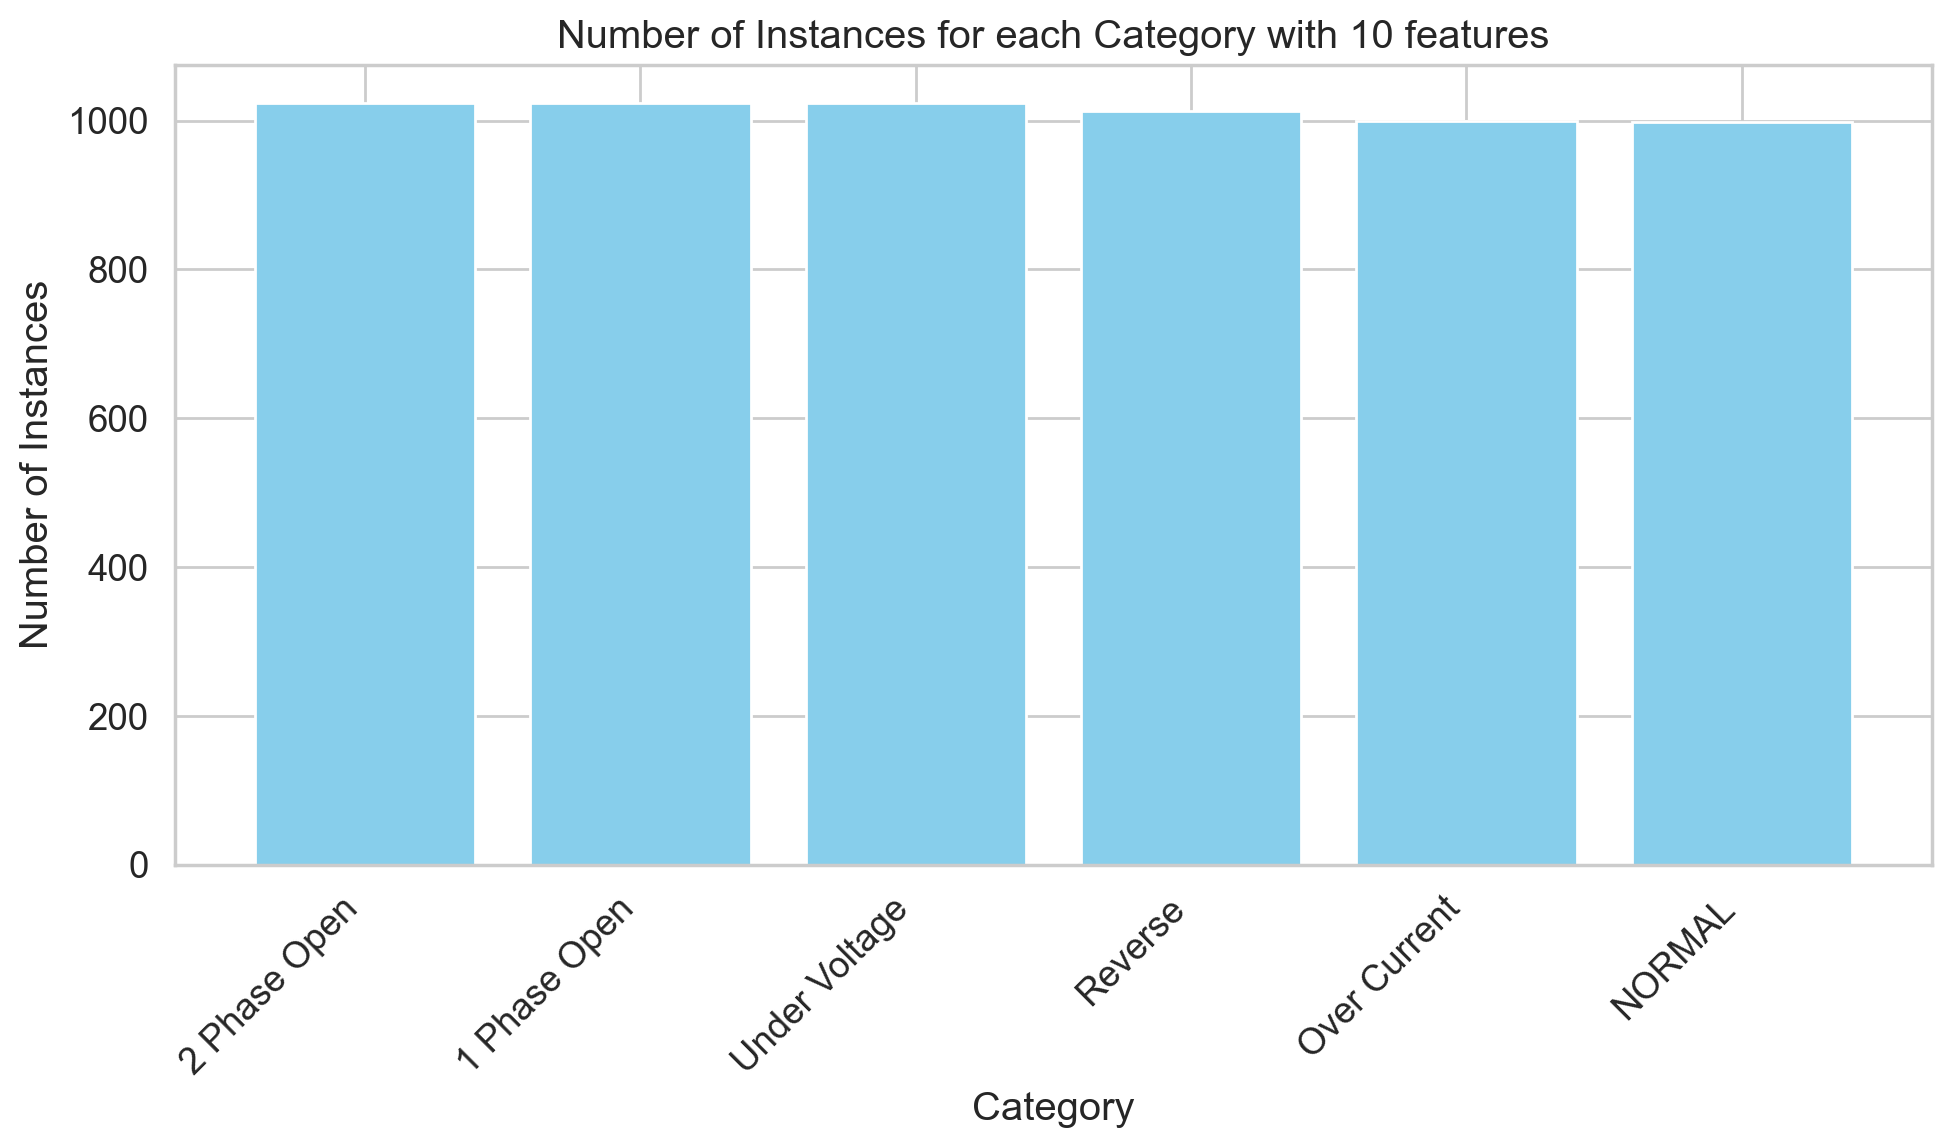

In [20]:
num_features = len(df_test.columns) - 1  # Assuming the last column is the label
label_counts = df_test['Category'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Instances')
plt.title(f'Number of Instances for each Category with {num_features} features')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

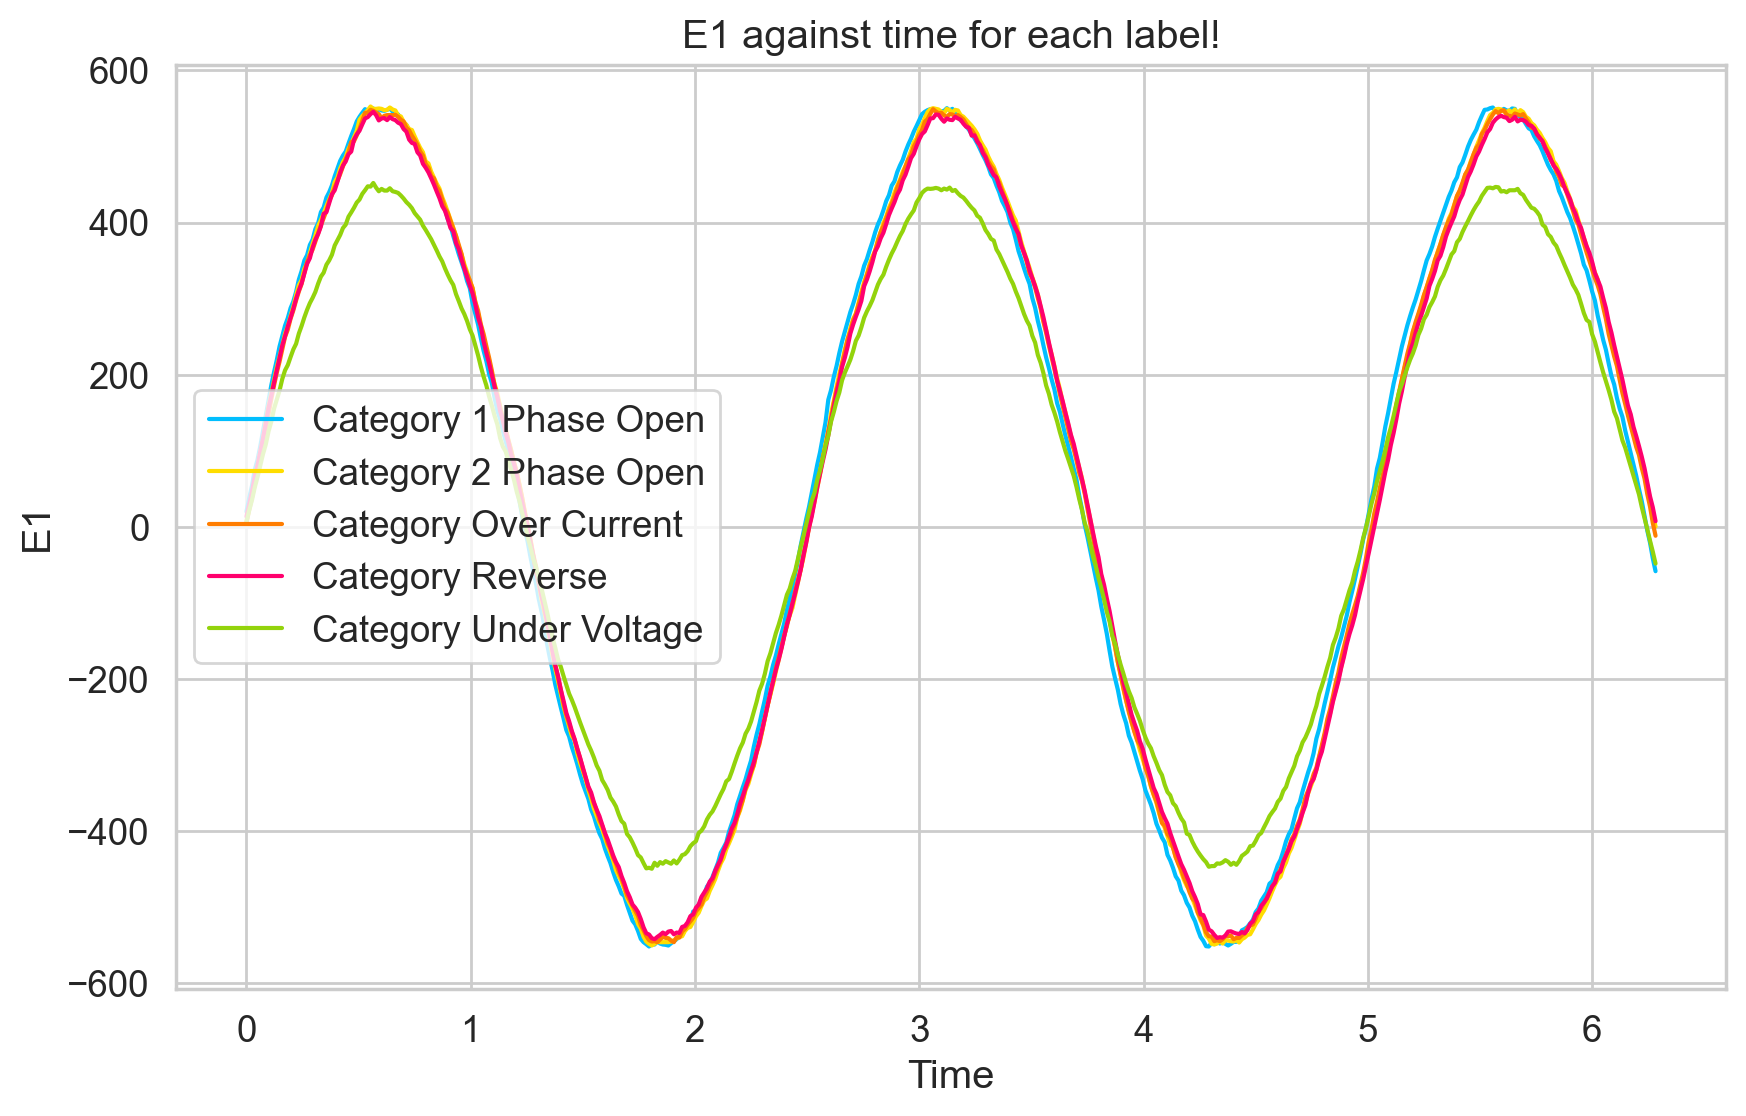

In [35]:
# Take the first 512 values for each label
subset_df = df_test.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['E1'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('E1')
plt.title('E1 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

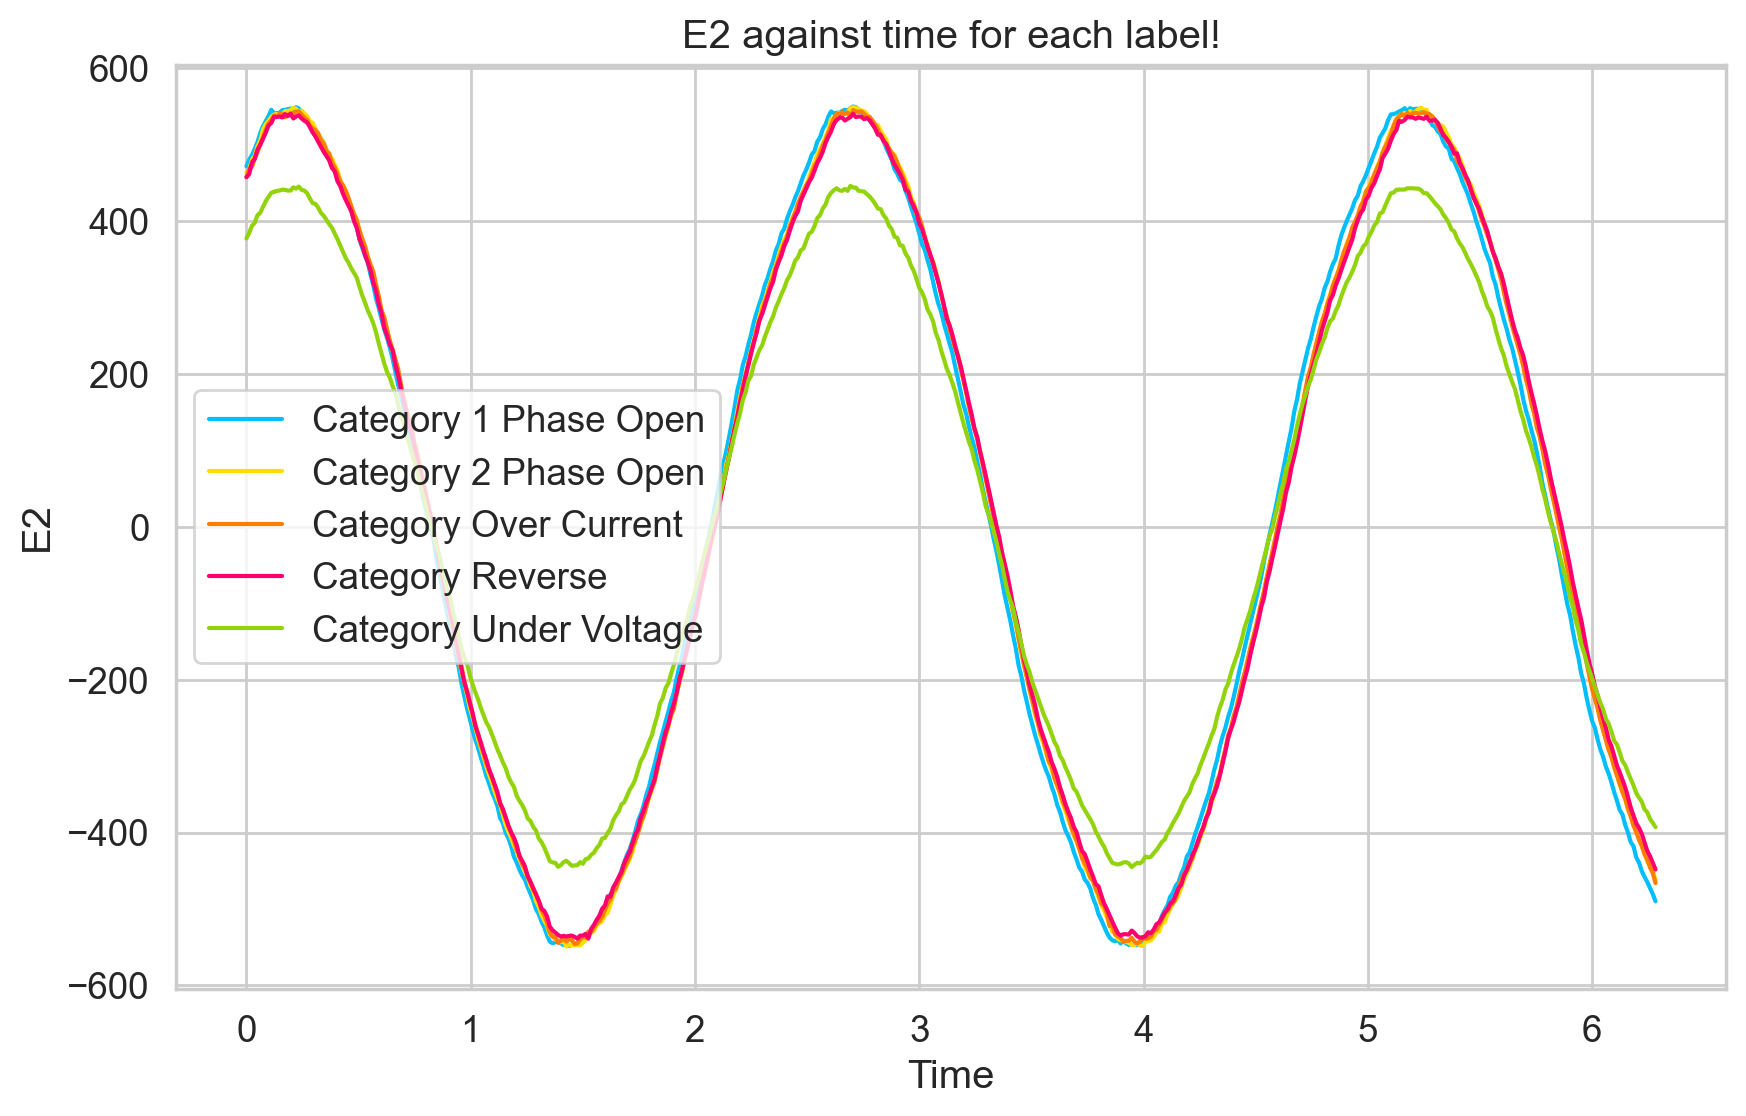

In [36]:
# Take the first 512 values for each label
subset_df = df_test.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['E2'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('E2')
plt.title('E2 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

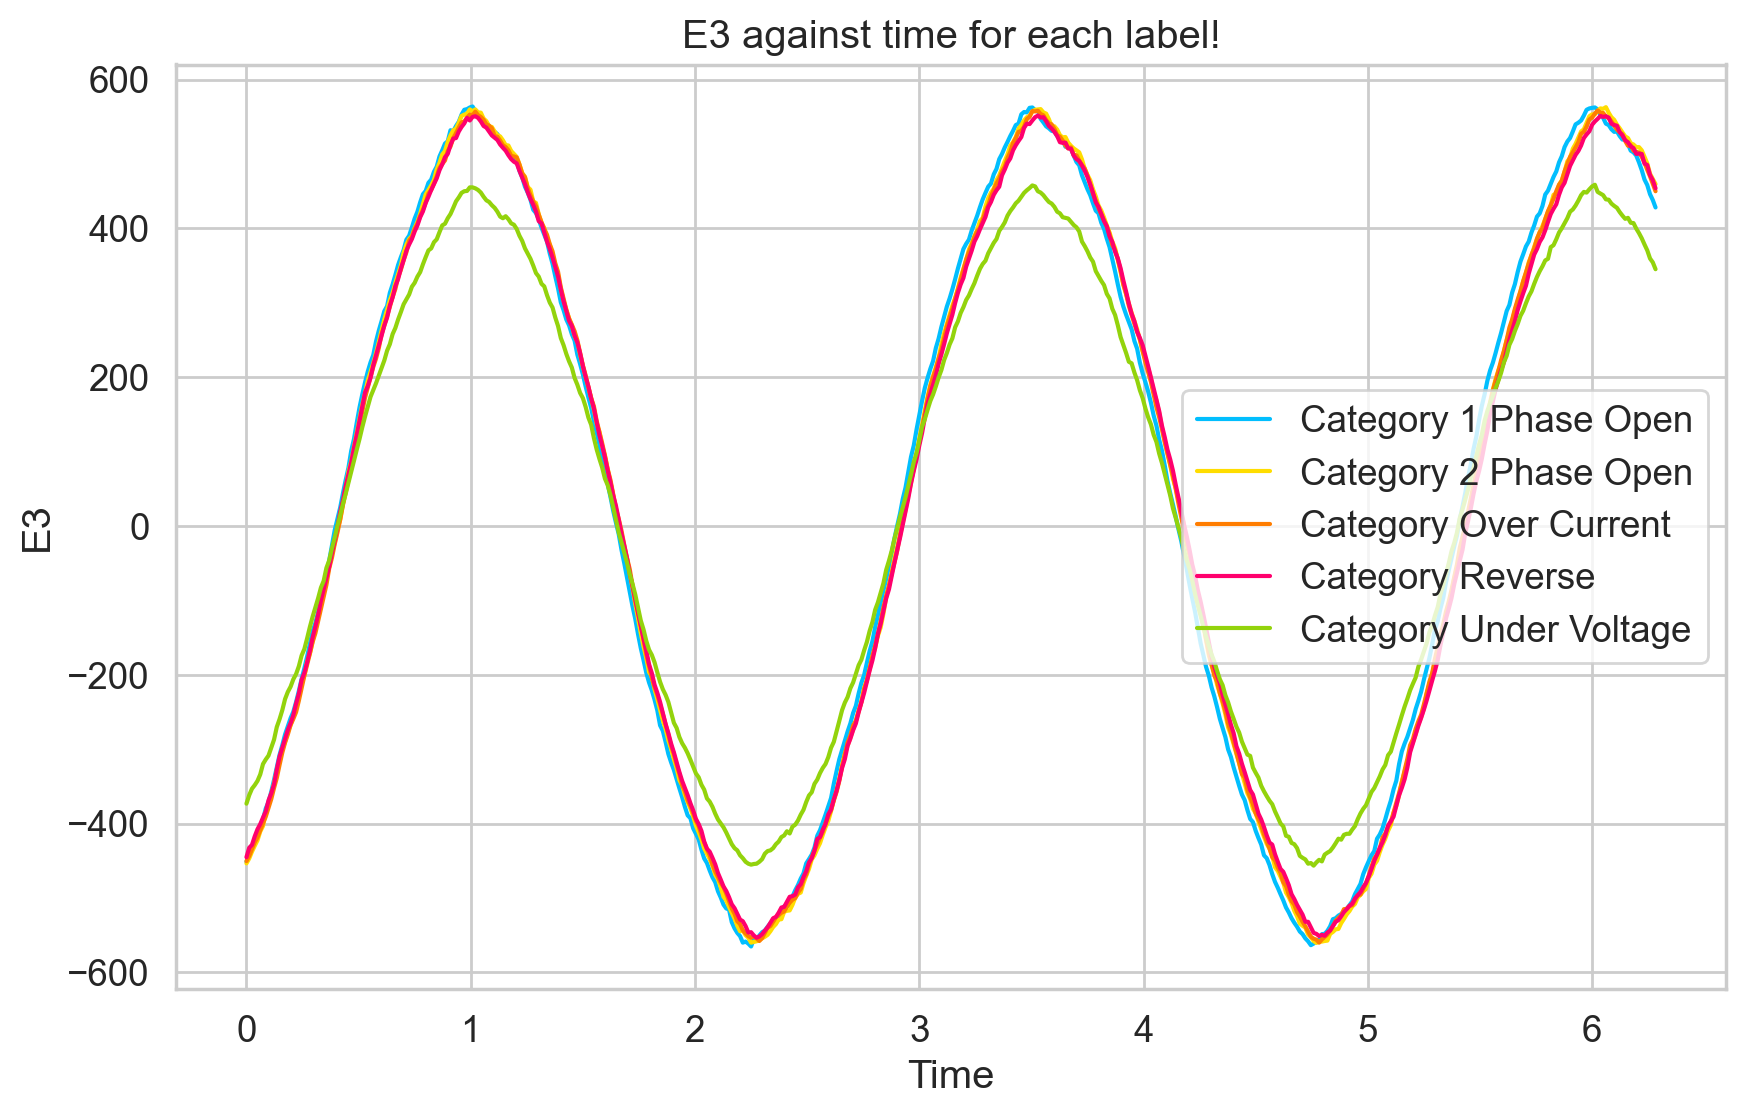

In [37]:
# Take the first 512 values for each label
subset_df = df_test.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['E3'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('E3')
plt.title('E3 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

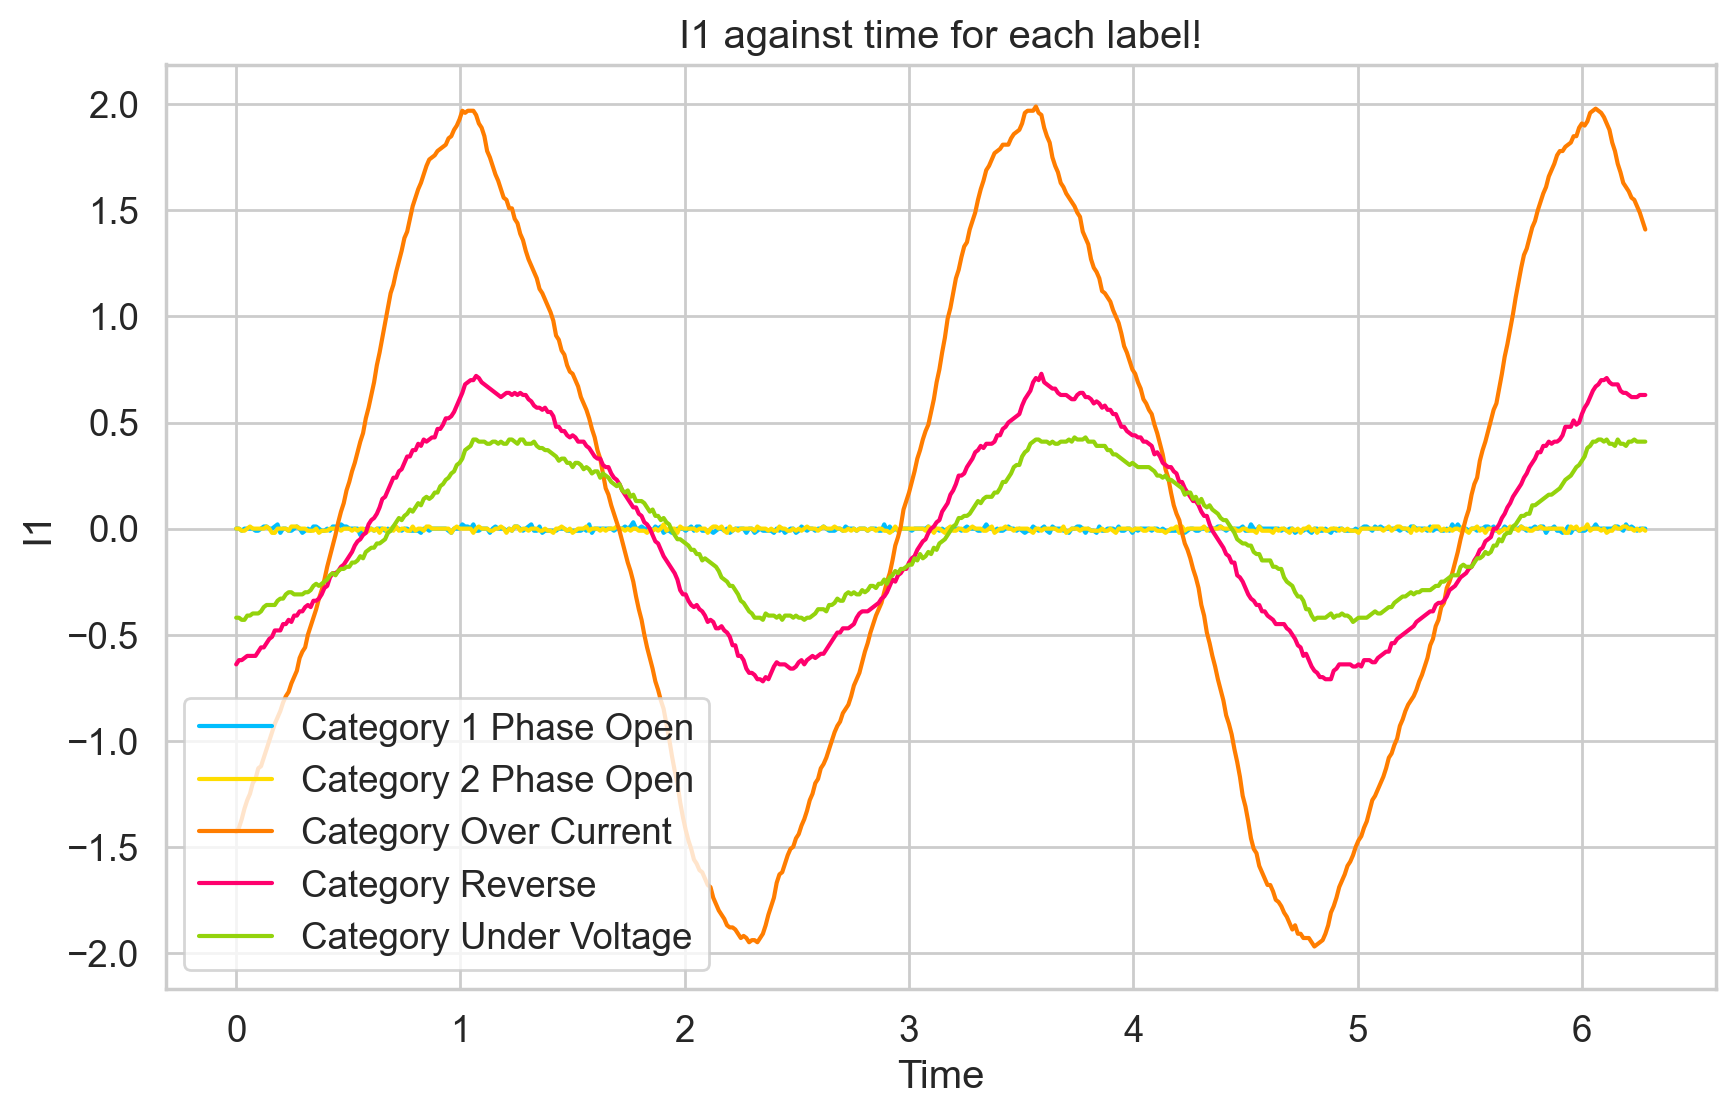

In [38]:
# Take the first 512 values for each label
subset_df = df_test.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['I1'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('I1')
plt.title('I1 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

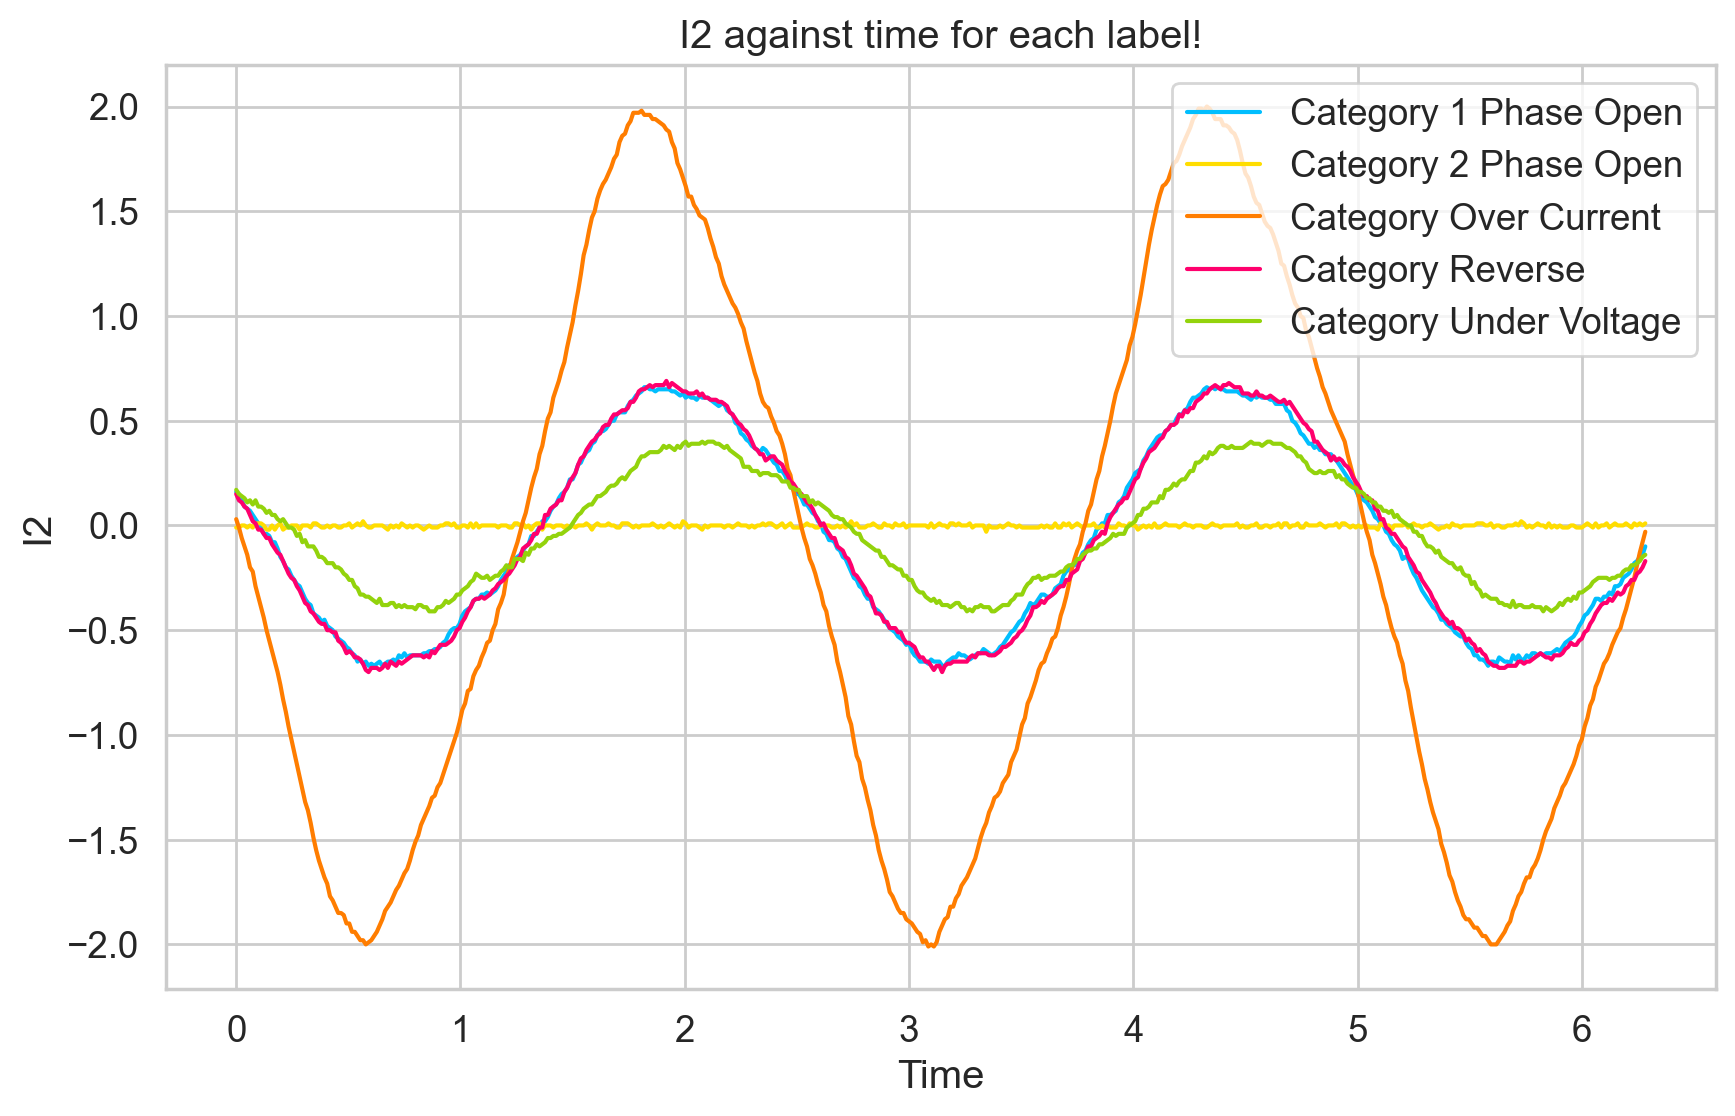

In [39]:
# Take the first 512 values for each label
subset_df = df_test.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['I2'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('I2')
plt.title('I2 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

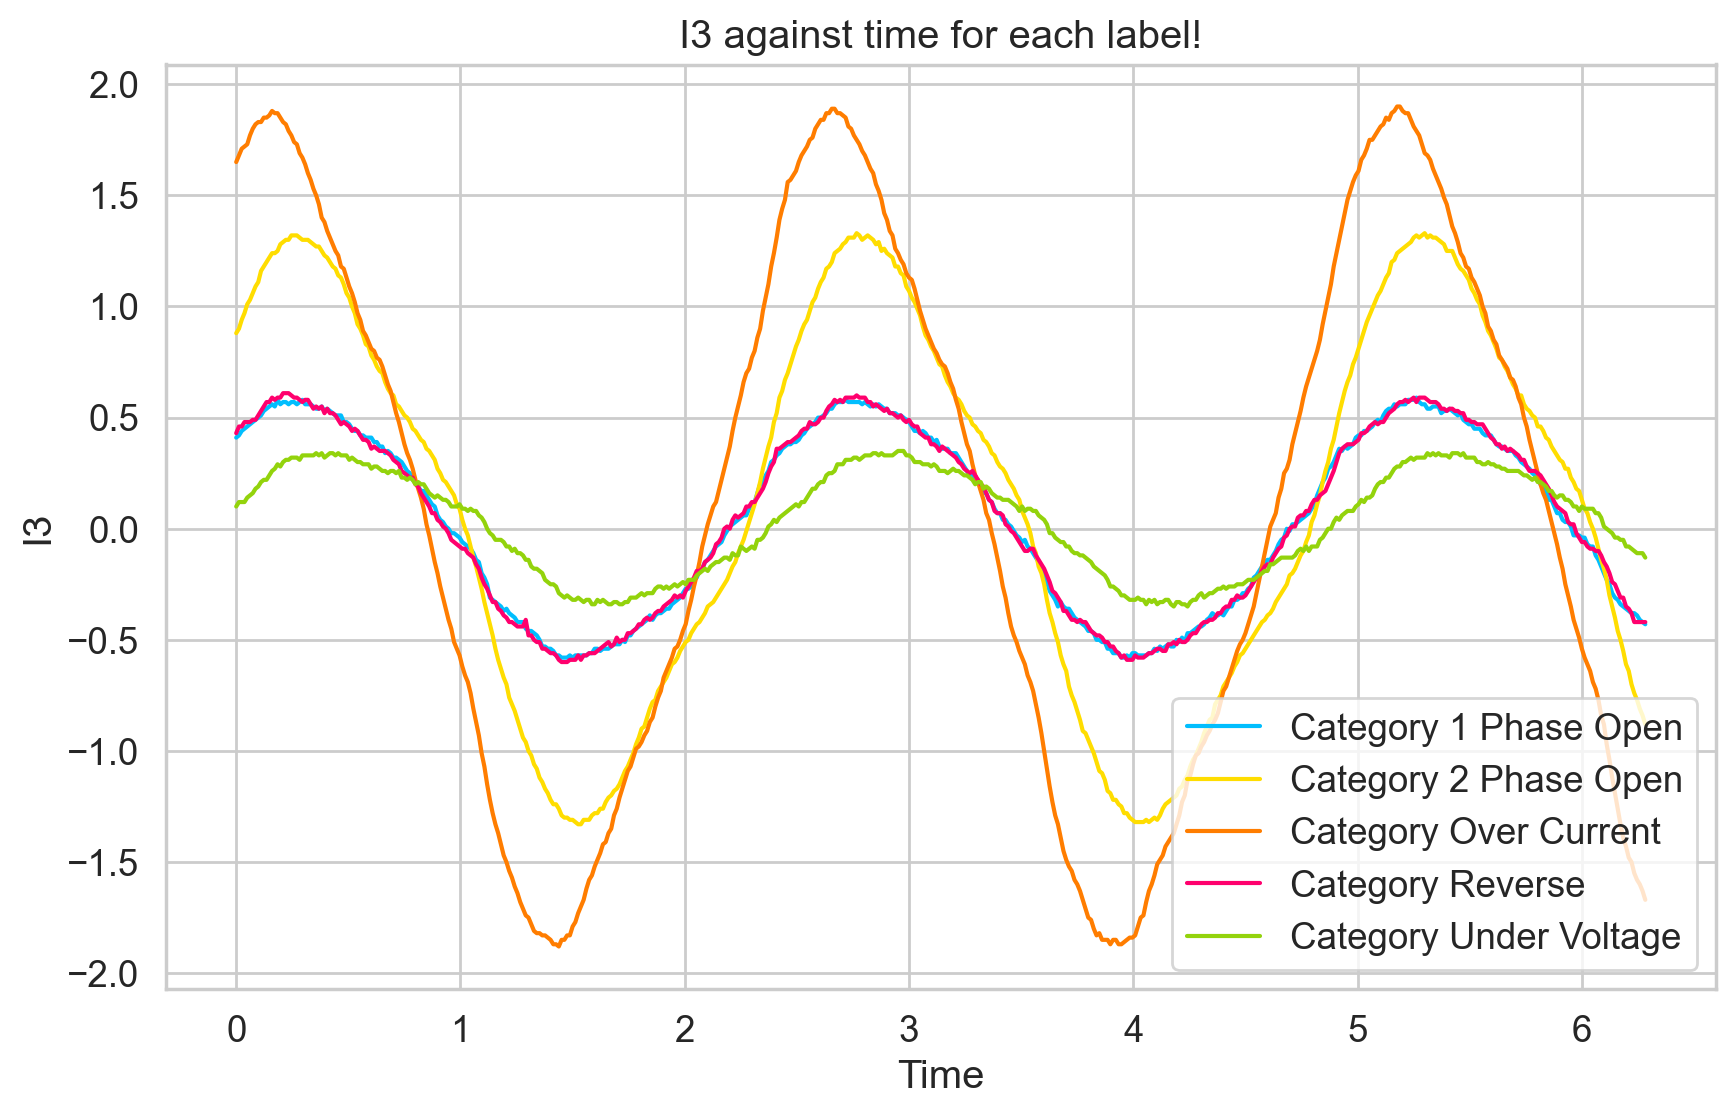

In [40]:
# Take the first 512 values for each label
subset_df = df_test.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['I3'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('I3')
plt.title('I3 against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

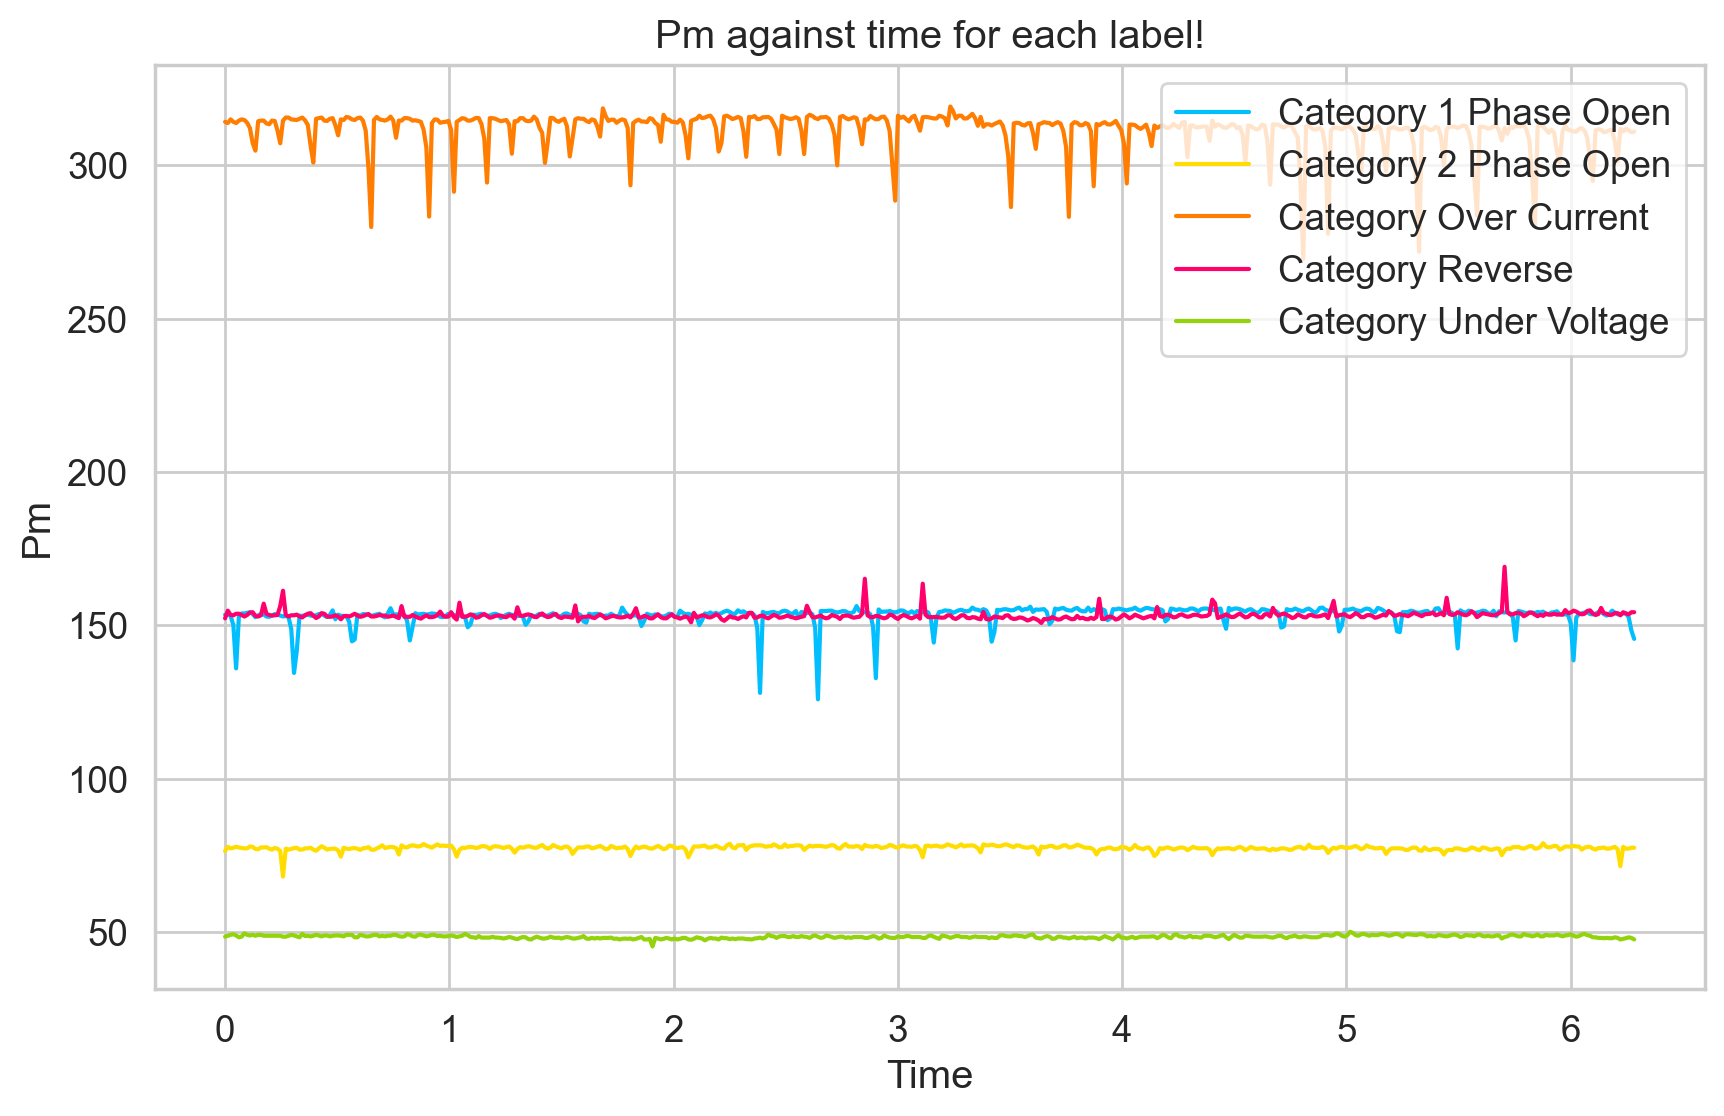

In [41]:
# Take the first 512 values for each label
subset_df = df_test.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['Pm'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('Pm')
plt.title('Pm against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

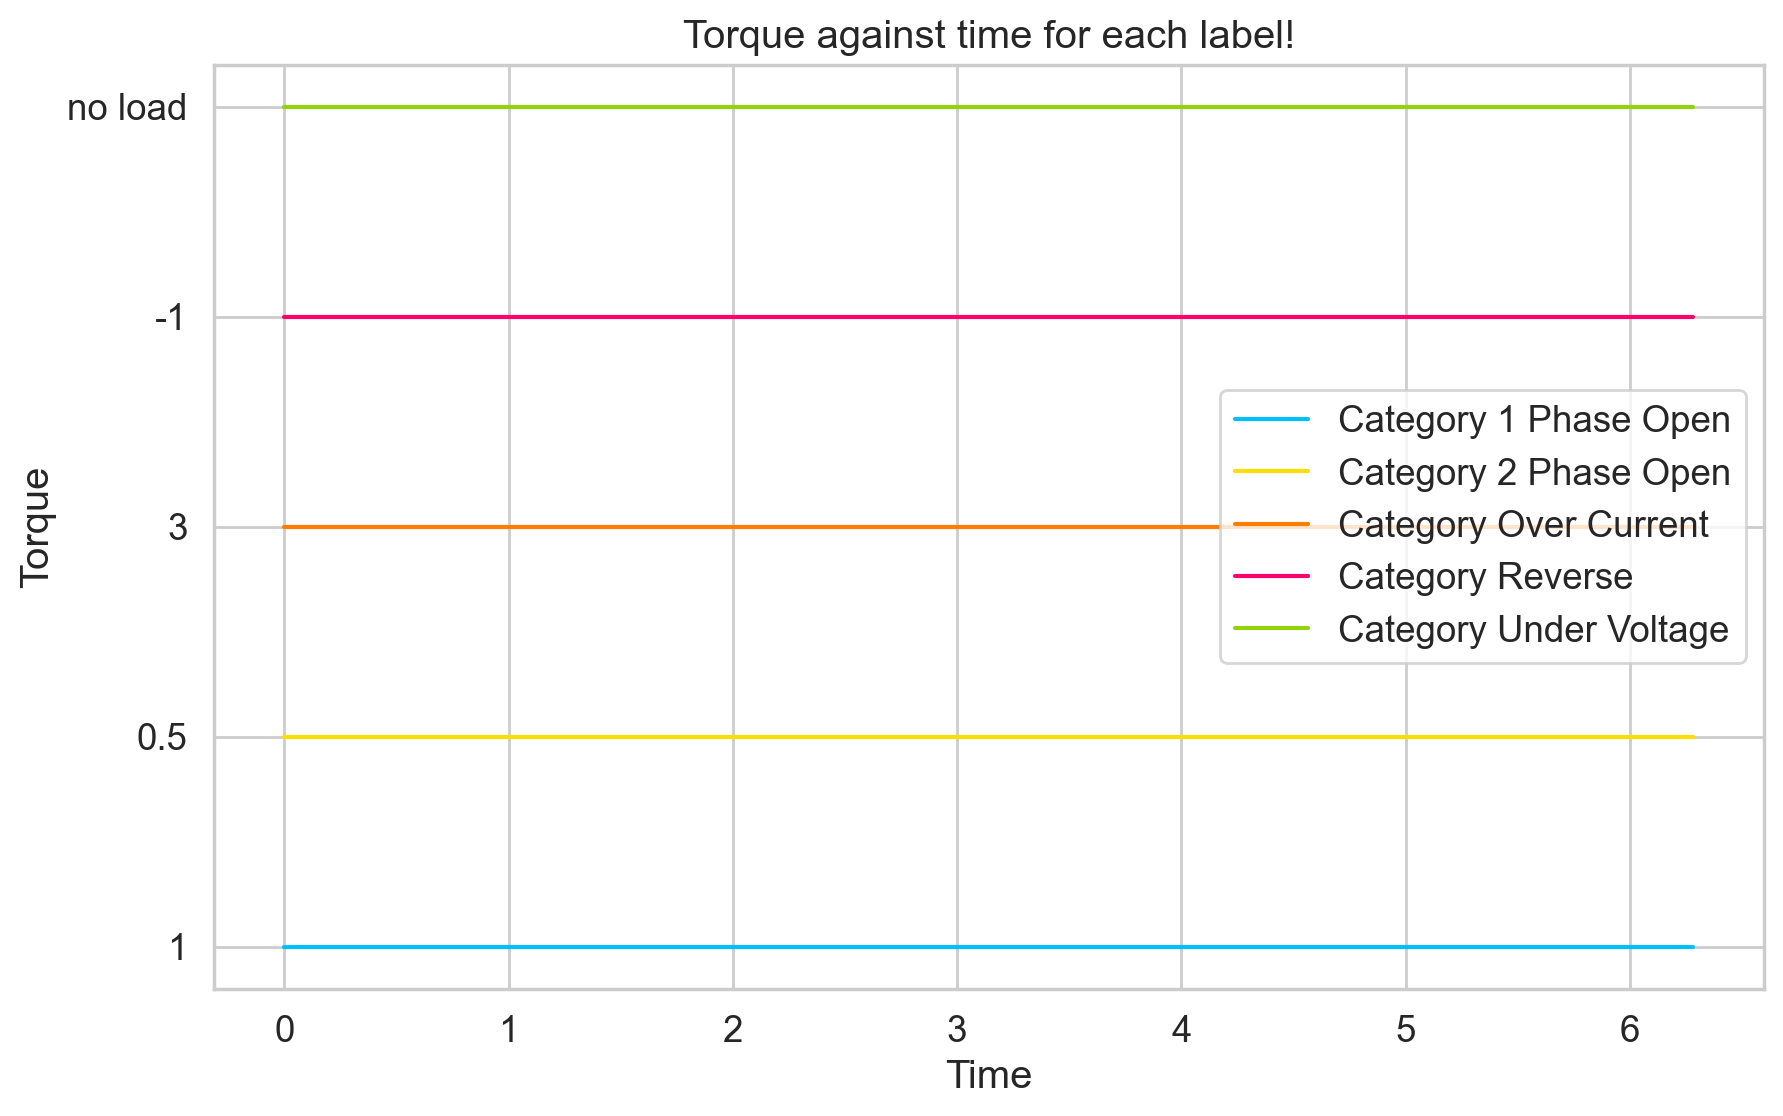

In [42]:
# Take the first 512 values for each label
subset_df = df_test.groupby('Category').head(512)

# Generate time values
num_readings = 512
time = np.linspace(0, 2 * np.pi, num_readings)  # Assuming one period of the sinusoid

# Plotting each group separately
plt.figure(figsize=(10, 6))
for label, group in subset_df.groupby('Category'):
    plt.plot(time, group['Torque'], label=f'Category {label}')

plt.xlabel('Time')
plt.ylabel('Torque')
plt.title('Torque against time for each label!')
plt.legend()
plt.grid(True)
plt.show()

# Time Series Functions

In [43]:
def time_series(df):
    #df['Torque'] = df['Torque'].replace('no load', 0)

                
    features = ['E1', 'E2', 'E3', 'I1','I2','I3','Pm','AI8', 'Torque']
    target_column = 'Category'

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])    
    #X = X.assign(column_to_add=df['Torque'])
    
    X = X.astype(float)
    Y = Y.astype(float)
    label_encoder = 1

    print("X shape:", X.shape)
    print("y shape:", Y.shape)

    return X, Y, label_encoder

In [44]:
def time_series_steps(df):
    X, y, label_encoder = time_series(df)
    print(X)

    # Assuming X and y are your original features and labels
    X_seq = []
    y_seq = []

    # Assuming seq_length is the desired length of each sequence
    seq_length = 150 #You can adjust this value based on your problem

    for i in range(len(X) - seq_length + 1):
        X_seq.append(X[i:i + seq_length, :])
        y_seq.append(y[i + seq_length - 1])  # Fix the indexing here

    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)
    

    # Print the shapes
    print("X sequence shape:", X_seq.shape)
    print("y sequence shape:", y_seq.shape)
    return X_seq, y_seq, label_encoder

# Basic LSTM

# Basic GRU

# LSTM With FFT

In [71]:
def preprocess_data(df):
    df['Torque'] = df['Torque'].replace('no load', 0)
                
    features = ['E1', 'E2', 'E3', 'I1', 'I2', 'I3', 'Pm', 'AI8', 'Torque']
    target_column = 'Category'

    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df[target_column])

    X = X.astype(float)
    y = y.astype(int)

    print("X shape:", X.shape)
    print("y shape:", y.shape)

    return X, y, label_encoder

def apply_fft(x):
    return np.abs(fft(x))

def time_series_steps(df, seq_length=200):
    X, y, label_encoder = preprocess_data(df)

    X_seq = []
    y_seq = []

    for i in range(len(X) - seq_length + 1):
        X_seq.append(np.apply_along_axis(apply_fft, axis=0, arr=X[i:i + seq_length, :]))
        y_seq.append(y[i + seq_length - 1])

    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

#     print("X sequence shape:", X_seq.shape)
#     print("y sequence shape:", y_seq.shape)
    
    return X_seq, y_seq, label_encoder

def init_model(X, y, df_test):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=102)
    
    # Assuming seq_length is the desired length of each sequence
    seq_length = 200
    
    X_test, y_test, label_encoder = time_series_steps(df_test, seq_length)
    
    # Reshape your input data to have the shape (batch_size, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], seq_length, X_train.shape[2]))
    X_test = X_test.reshape((X_test.shape[0], seq_length, X_test.shape[2]))
    X_val = X_val.reshape((X_val.shape[0], seq_length, X_val.shape[2]))
    
#     print("X_train shape:", X_train.shape)
#     print("X_test shape:", X_test.shape)
#     print("X_val shape:", X_val.shape)

    # Convert labels to integers (if not already)
    y_train = y_train.astype(int)
    y_val = y_val.astype(int)
    y_test = y_test.astype(int)

    # Define input layer
    inputs = Input(shape=(seq_length, X_train.shape[2]))

    # Build the model using the Functional API
    x = LSTM(units=38, kernel_regularizer=l2(0.08))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(units=6, activation='softmax', kernel_regularizer=l2(0.08))(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Set your custom learning rate parameters
    initial_learning_rate = 0.008
    decay_steps = 10000
    decay_rate = 0.9
    clip_value = 1.0  # Adjust as needed

    # Create the optimizer with gradient clipping using clipvalue
    optimizer = Adam(
        learning_rate=0.008,
        clipvalue=clip_value
    )

    # Compile your model with the custom optimizer and sparse categorical crossentropy
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model, X_train, y_train, X_val, X_test, y_val, y_test

In [72]:
df = pd.read_csv("MACHINES COMPILED.csv")
df_test = pd.read_csv("MACHINES COMPILED TEST.csv")
X, y, label_encoder= time_series_steps(df)

model ,X_train, y_train, X_val, X_test, y_val, y_test = init_model(X, y, df_test)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

X shape: (19968, 9)
y shape: (19968,)
X shape: (5630, 9)
y shape: (5630,)
Epoch 1/10
371/371 [==============================] - 27s 65ms/step - loss: 1.2783 - accuracy: 0.6821 - val_loss: 1.2109 - val_accuracy: 0.6655
Epoch 2/10
371/371 [==============================] - 23s 62ms/step - loss: 0.9800 - accuracy: 0.7425 - val_loss: 0.9449 - val_accuracy: 0.7883
Epoch 3/10
371/371 [==============================] - 23s 62ms/step - loss: 0.9275 - accuracy: 0.7640 - val_loss: 0.8088 - val_accuracy: 0.8462
Epoch 4/10
371/371 [==============================] - 23s 62ms/step - loss: 0.9543 - accuracy: 0.7515 - val_loss: 0.7312 - val_accuracy: 0.8207
Epoch 5/10
371/371 [==============================] - 23s 63ms/step - loss: 0.8366 - accuracy: 0.7787 - val_loss: 0.6556 - val_accuracy: 0.8810
Epoch 6/10
371/371 [==============================] - 24s 64ms/step - loss: 1.1029 - accuracy: 0.7141 - val_loss: 1.1279 - val_accuracy: 0.6550
Epoch 7/10
371/371 [==============================] - 24s 65ms

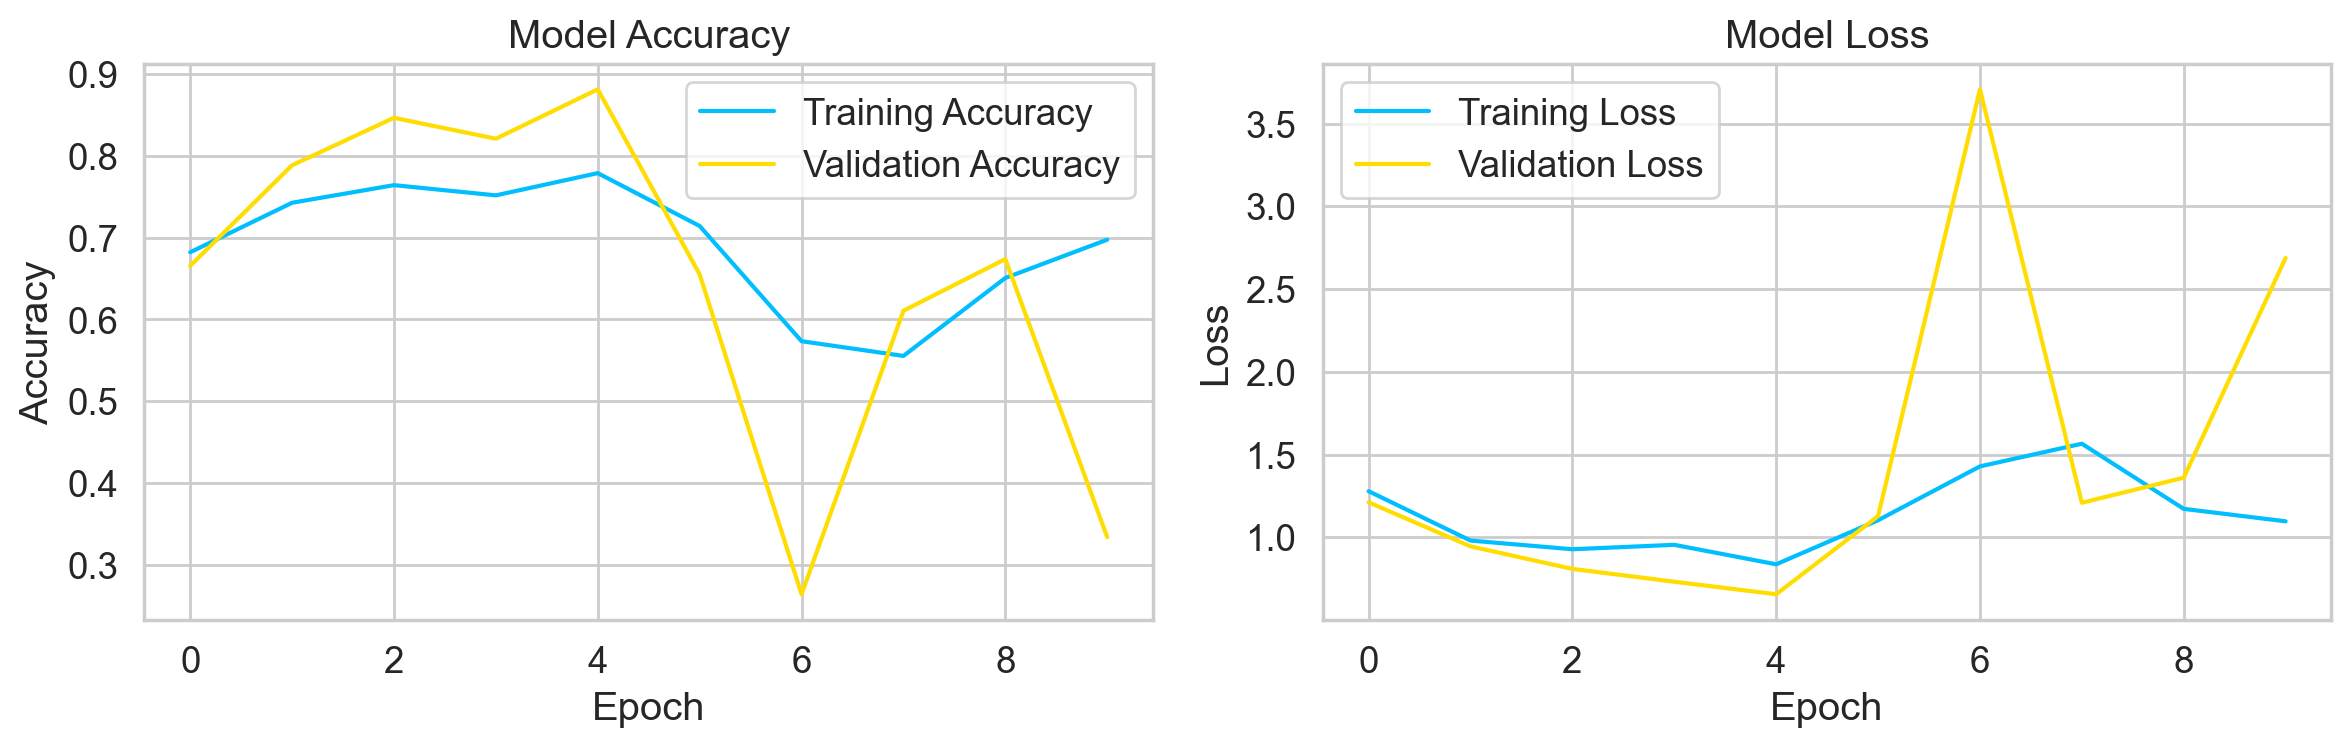

In [73]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [74]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = (y_test)  # No need to specify axis

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, zero_division=1))

170/170 [==============================] - 3s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.31      0.42      1024
           1       0.60      1.00      0.75       512
           2       0.75      0.00      0.01       823
           3       0.15      0.99      0.26       512
           4       0.64      0.23      0.33      2048
           5       0.36      0.03      0.05       512

    accuracy                           0.33      5431
   macro avg       0.53      0.43      0.31      5431
weighted avg       0.58      0.33      0.31      5431



170/170 [==============================] - 3s 17ms/step


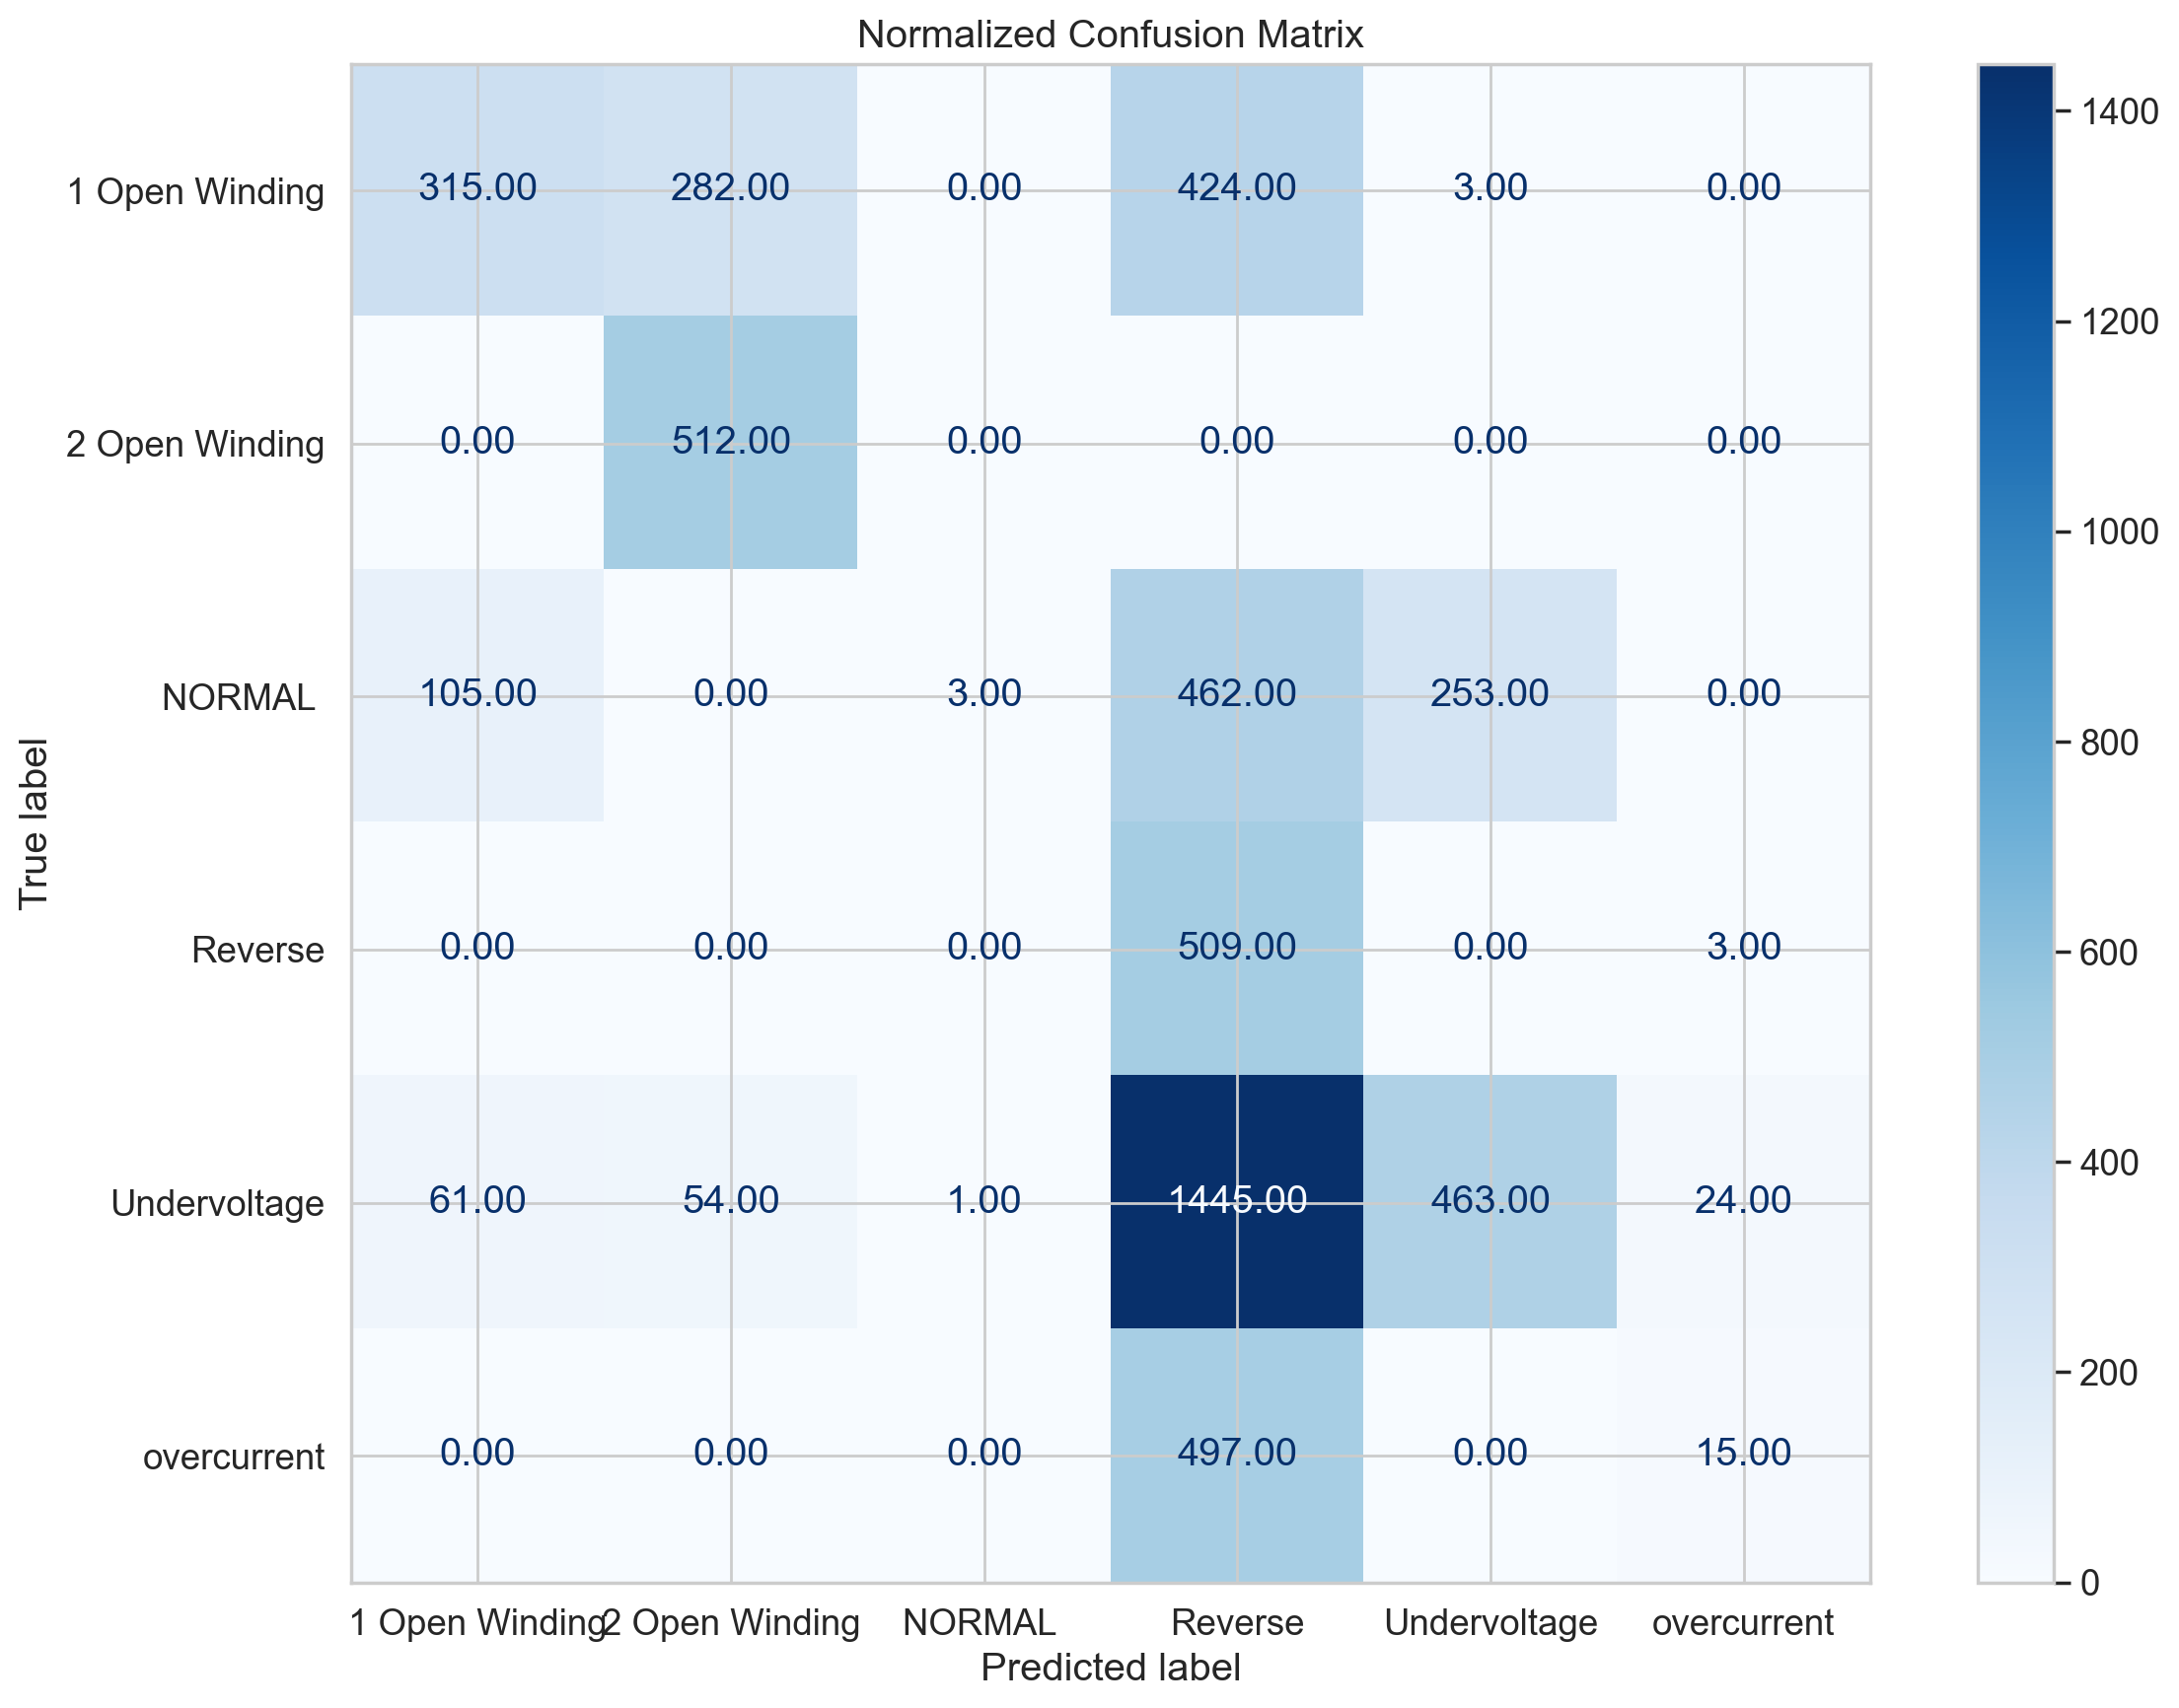

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Get original class labels from the label_encoder
original_labels = label_encoder.classes_

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=original_labels)
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Normalized Confusion Matrix')
plt.show()


170/170 [==============================] - 3s 18ms/step - loss: 2.7443 - accuracy: 0.3346
Test Accuracy: 0.3345608413219452


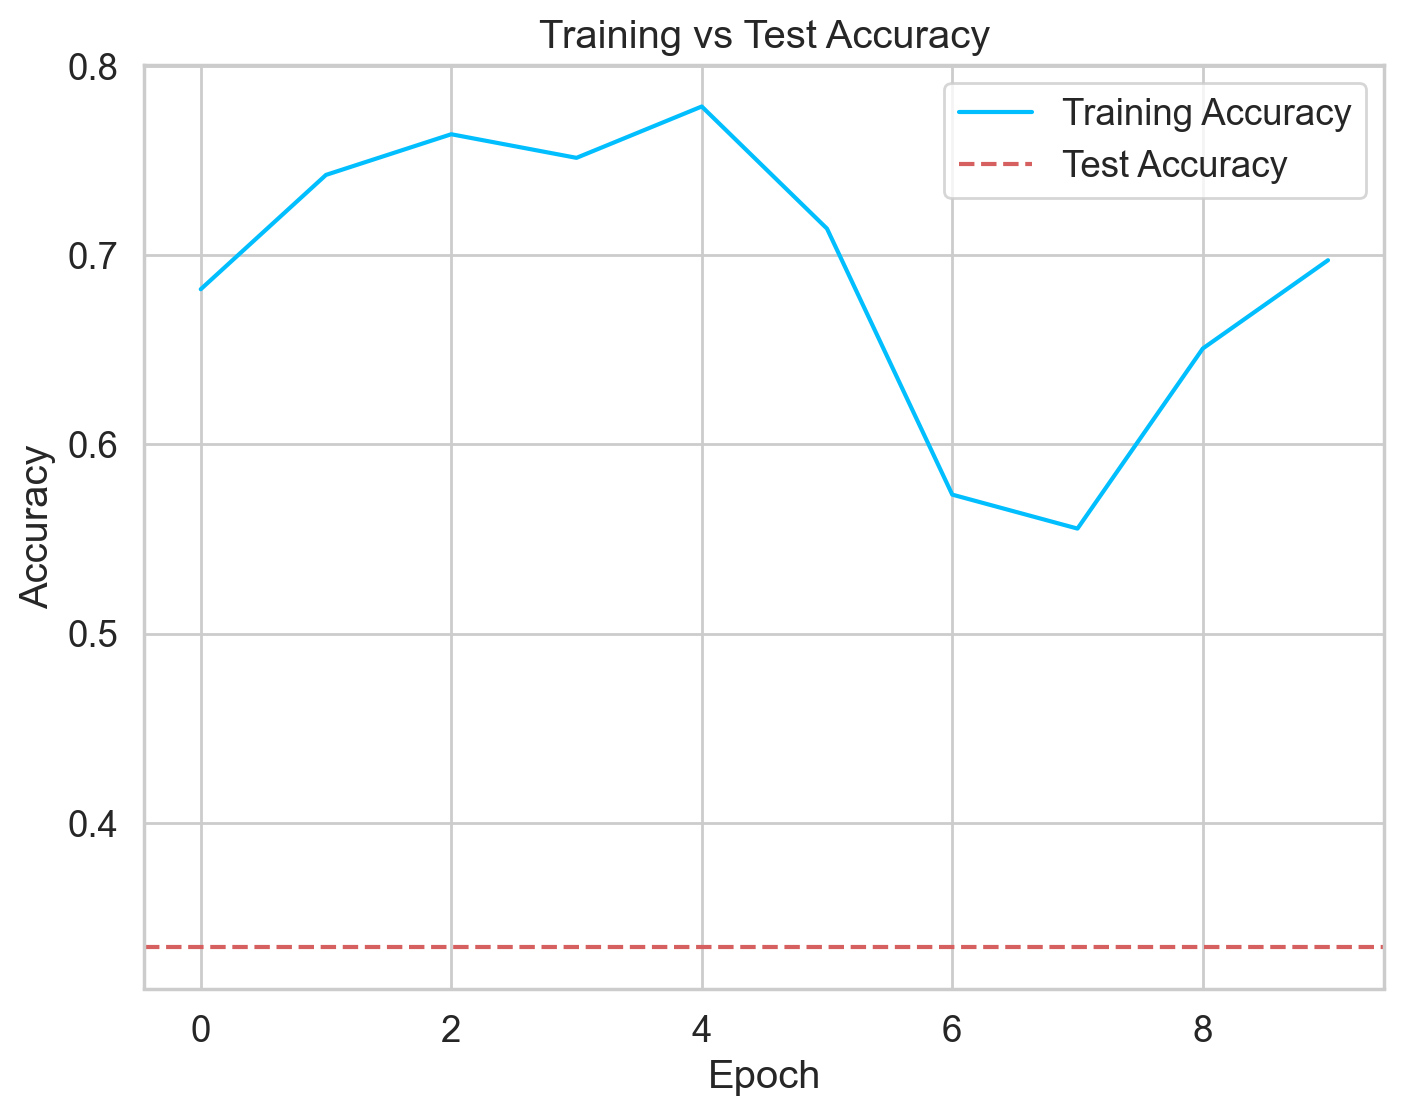

In [76]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy}')

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training vs Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# LSTM Without FFT

In [59]:
def time_series_steps(df, seq_length=200):
    X, y, label_encoder = preprocess_data(df)
    print("X Shape: ", X.shape)
    X_seq = []
    y_seq = []

    for i in range(len(X) - seq_length + 1):
        X_seq.append(X[i:i + seq_length, :])
        y_seq.append(y[i + seq_length - 1])

    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

    print("X sequence shape:", X_seq.shape)
    print("y sequence shape:", y_seq.shape)
    
    return X_seq, y_seq, label_encoder
def preprocess_data(df):
    df['Torque'] = df['Torque'].replace('no load', 0)
                
    features = ['E1', 'E2', 'E3', 'I1', 'I2', 'I3', 'Pm', 'AI8', 'Torque']
    target_column = 'Category'

    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df[target_column])

    X = X.astype(float)
    y = y.astype(int)

    print("X shape:", X.shape)
    print("y shape:", y.shape)

    return X, y, label_encoder

In [75]:

def init_model(X, y, df_test):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=102)
    
    # Assuming seq_length is the desired length of each sequence
    seq_length = 200
    
    X_test, y_test, label_encoder = time_series_steps(df_test, seq_length)
    
    # Reshape your input data to have the shape (batch_size, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], seq_length, X_train.shape[2]))
    X_test = X_test.reshape((X_test.shape[0], seq_length, X_test.shape[2]))
    X_val = X_val.reshape((X_val.shape[0], seq_length, X_val.shape[2]))
    
#     print("X_train shape:", X_train.shape)
#     print("X_test shape:", X_test.shape)
#     print("X_val shape:", X_val.shape)

    # Convert labels to integers (if not already)
    y_train = y_train.astype(int)
    y_val = y_val.astype(int)
    y_test = y_test.astype(int)

    # Define input layer
    inputs = Input(shape=(seq_length, X_train.shape[2]))

    # Build the model using the Functional API
    x = LSTM(units=20, kernel_regularizer=l2(0.1))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    outputs = Dense(units=5, activation='softmax', kernel_regularizer=l2(0.1))(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Set your custom learning rate parameters
    initial_learning_rate = 0.008
    decay_steps = 10000
    decay_rate = 0.9
    clip_value = 1.0  # Adjust as needed

    # Create the optimizer with gradient clipping using clipvalue
    optimizer = Adam(
        learning_rate=0.008,
        clipvalue=clip_value
    )

    # Compile your model with the custom optimizer and sparse categorical crossentropy
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model, X_train, y_train, X_val, X_test, y_val, y_test

In [76]:
df = pd.read_csv("machines.csv")
df_test = pd.read_csv("machines test.csv")
X, y, label_encoder= time_series_steps(df)

model ,X_train, y_train, X_val, X_test, y_val, y_test = init_model(X, y, df_test)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

X shape: (19968, 9)
y shape: (19968,)
X Shape:  (19968, 9)
X sequence shape: (19769, 200, 9)
y sequence shape: (19769,)
X shape: (6655, 9)
y shape: (6655,)
X Shape:  (6655, 9)
X sequence shape: (6456, 200, 9)
y sequence shape: (6456,)
Epoch 1/100
371/371 [==============================] - 18s 44ms/step - loss: 0.8955 - accuracy: 0.6942 - val_loss: 1.3115 - val_accuracy: 0.6132
Epoch 2/100
371/371 [==============================] - 15s 42ms/step - loss: 0.9077 - accuracy: 0.6497 - val_loss: 0.8048 - val_accuracy: 0.7486
Epoch 3/100
371/371 [==============================] - 16s 42ms/step - loss: 0.6887 - accuracy: 0.7065 - val_loss: 0.6620 - val_accuracy: 0.6778
Epoch 4/100
371/371 [==============================] - 16s 43ms/step - loss: 0.6578 - accuracy: 0.7006 - val_loss: 0.8324 - val_accuracy: 0.6721
Epoch 5/100
371/371 [==============================] - 16s 42ms/step - loss: 0.6432 - accuracy: 0.7231 - val_loss: 1.9678 - val_accuracy: 0.5673
Epoch 6/100
371/371 [===================

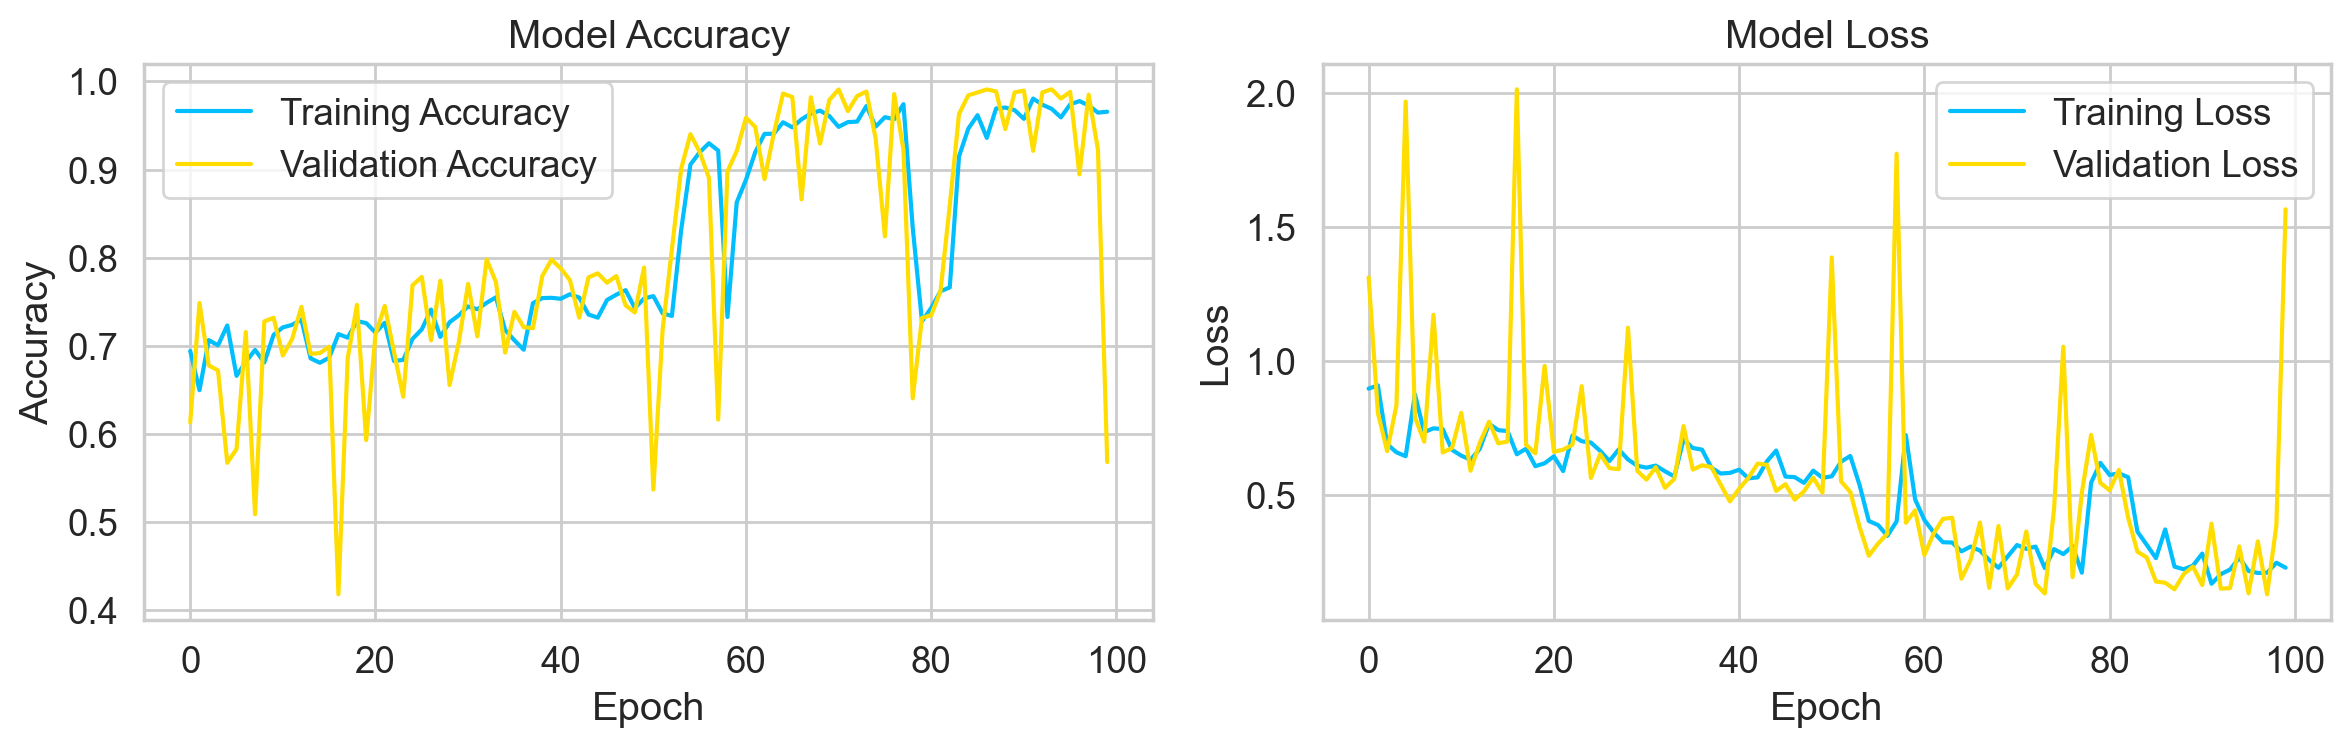

In [77]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [78]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = (y_test)  # No need to specify axis

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, zero_division=1))

202/202 [==============================] - 5s 20ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.02      0.03      1536
           1       0.82      0.76      0.79      1024
           2       1.00      0.00      0.00       512
           3       0.38      1.00      0.56       313
           4       0.53      0.78      0.63      3071

    accuracy                           0.55      6456
   macro avg       0.59      0.51      0.40      6456
weighted avg       0.53      0.55      0.46      6456



202/202 [==============================] - 4s 19ms/step


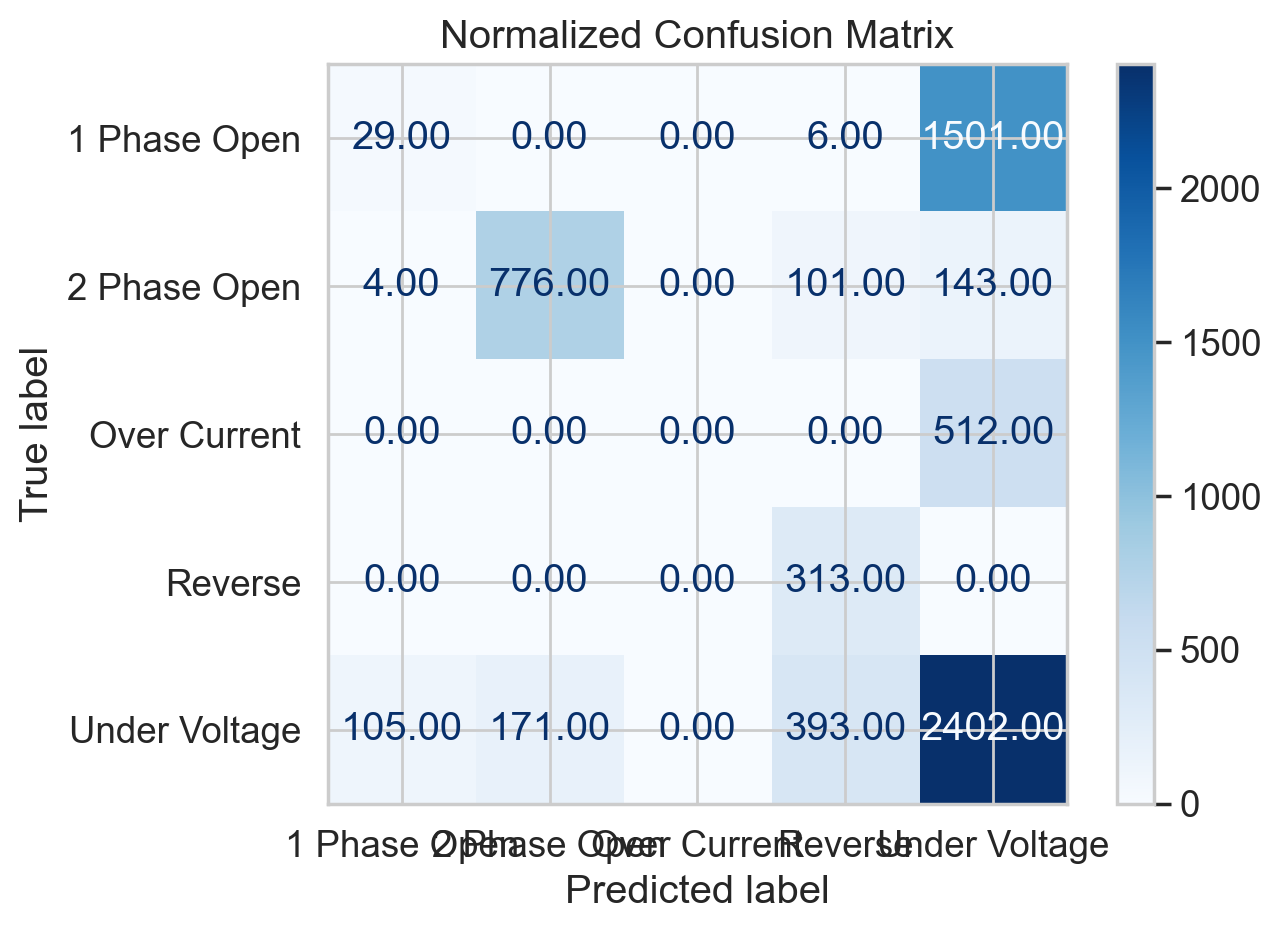

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Get original class labels from the label_encoder
original_labels = label_encoder.classes_

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=original_labels)
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Normalized Confusion Matrix')
plt.show()


# CNN-LSTM Network

In [11]:
# import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scipy.fft import fft

# Assuming 'df' is your DataFrame
def preprocess_data(df):
    df['Torque'] = df['Torque'].replace('no load', 0)
    features = ['E1', 'E2', 'E3', 'I1', 'I2', 'I3', 'Pm', 'AI8', 'Torque']
    target_column = 'Category'

    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])
    
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(df[target_column])

    X = X.astype(float)
    Y = Y.astype(float)

    return X, Y, label_encoder

def time_series_steps(df, seq_length=200):
    X, y, label_encoder = preprocess_data(df)
    print("X Shape: ", X.shape)
    X_seq = []
    y_seq = []

    for i in range(len(X) - seq_length + 1):
        X_seq.append(np.apply_along_axis(apply_fft, axis=0, arr=X[i:i + seq_length, :]))
        y_seq.append(y[i + seq_length - 1])

    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

    print("X sequence shape:", X_seq.shape)
    print("y sequence shape:", y_seq.shape)
    
    return X_seq, y_seq, label_encoder

def apply_fft(x):
    return np.abs(fft(x))

def init_model(X, y):
    seq_length = 200
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=102)
    
      # Reshape your input data to have the shape (batch_size, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], seq_length, X_train.shape[2]))
#     X_test = X_test.reshape((X_test.shape[0], seq_length, X_test.shape[2]))
    X_val = X_val.reshape((X_val.shape[0], seq_length, X_val.shape[2]))
    
#     print("X_train shape:", X_train.shape)
#     print("X_test shape:", X_test.shape)
#     print("X_val shape:", X_val.shape)

    # Convert labels to integers (if not already)
    y_train = y_train.astype(int)
    y_val = y_val.astype(int)
#     y_test = y_test.astype(int)


    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 9)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(units=38, activation='tanh', recurrent_activation='sigmoid'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(units=5, activation='softmax'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model, X_train, y_train, X_val, y_val

# Assuming 'df' is your DataFrame
df = pd.read_csv("machines.csv")
df_test = pd.read_csv("machines test.csv")
X, Y, label_encoder = time_series_steps(df, 200)
X = np.expand_dims(X, axis=-1)  # Add a channel dimension for Conv1D
model, X_train, y_train, X_val, y_val = init_model(X, Y)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=2)


X Shape:  (19968, 9)
X sequence shape: (19769, 200, 9)
y sequence shape: (19769,)
Epoch 1/10
371/371 - 27s - loss: 1.1178 - accuracy: 0.5838 - val_loss: 0.4473 - val_accuracy: 0.8135 - 27s/epoch - 73ms/step
Epoch 2/10
371/371 - 24s - loss: 0.6070 - accuracy: 0.7574 - val_loss: 0.3338 - val_accuracy: 0.8422 - 24s/epoch - 64ms/step
Epoch 3/10
371/371 - 25s - loss: 0.4735 - accuracy: 0.8072 - val_loss: 0.2299 - val_accuracy: 0.8976 - 25s/epoch - 68ms/step
Epoch 4/10
371/371 - 23s - loss: 0.3930 - accuracy: 0.8436 - val_loss: 0.1987 - val_accuracy: 0.9398 - 23s/epoch - 61ms/step
Epoch 5/10
371/371 - 23s - loss: 0.3242 - accuracy: 0.8683 - val_loss: 0.1443 - val_accuracy: 0.9807 - 23s/epoch - 63ms/step
Epoch 6/10
371/371 - 22s - loss: 0.2870 - accuracy: 0.8858 - val_loss: 0.1155 - val_accuracy: 0.9695 - 22s/epoch - 59ms/step
Epoch 7/10
371/371 - 23s - loss: 0.2801 - accuracy: 0.8932 - val_loss: 0.2041 - val_accuracy: 0.9221 - 23s/epoch - 61ms/step
Epoch 8/10
371/371 - 22s - loss: 0.2217 - a

In [12]:
X_test, y_test, label_encoder = preprocess_data(df_test)

In [13]:
# Assuming 'df_test' is your testing DataFrame
X_test, y_test, label_encoder = time_series_steps(df_test, 200)
X_test = np.expand_dims(X_test, axis=-1)  # Add a channel dimension for Conv1D

X Shape:  (6655, 9)
X sequence shape: (6456, 200, 9)
y sequence shape: (6456,)


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = (y_test)  # No need to specify axis

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, zero_division=1))

202/202 [==============================] - 4s 18ms/step
Test Accuracy: 47.34%


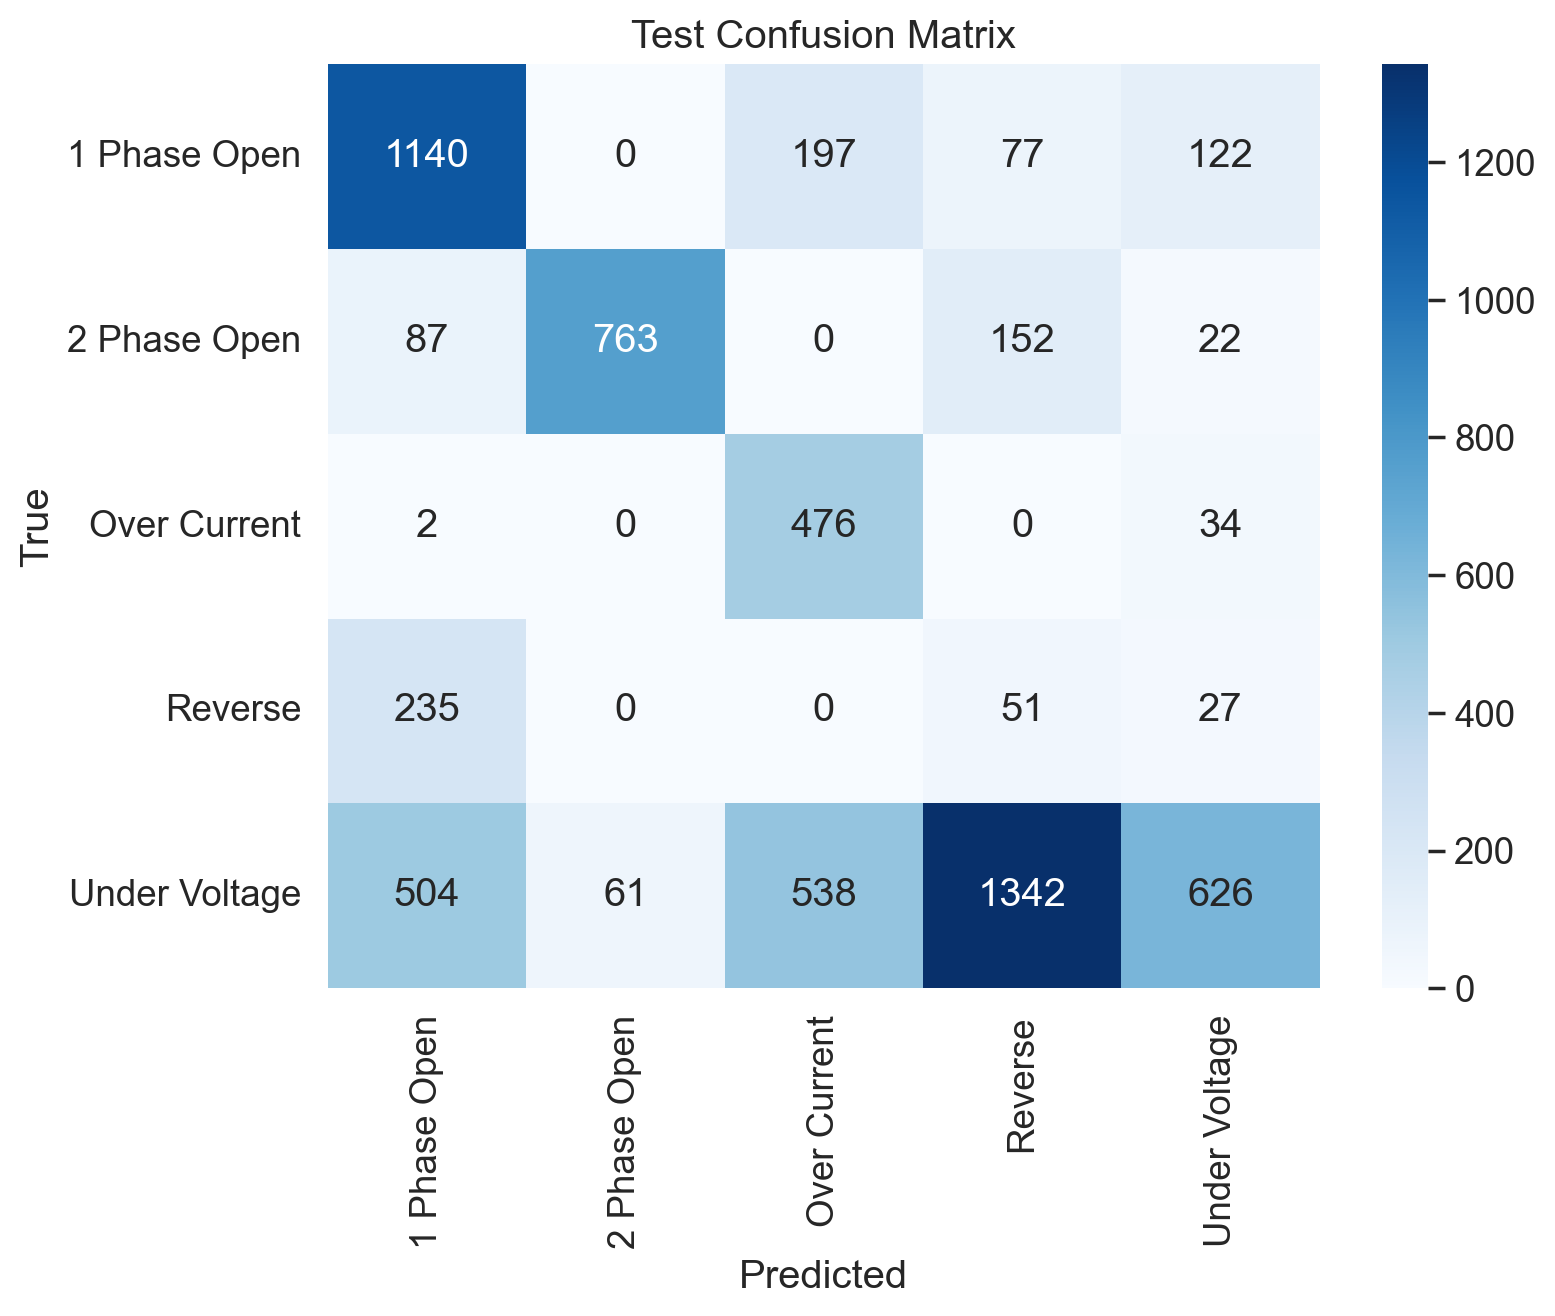

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluate the model on the testing data
y_test_pred = model.predict(X_test)
y_test_pred_class = np.argmax(y_test_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred_class)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_test_pred_class)
print(f'Test Accuracy: {accuracy_test * 100:.2f}%')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


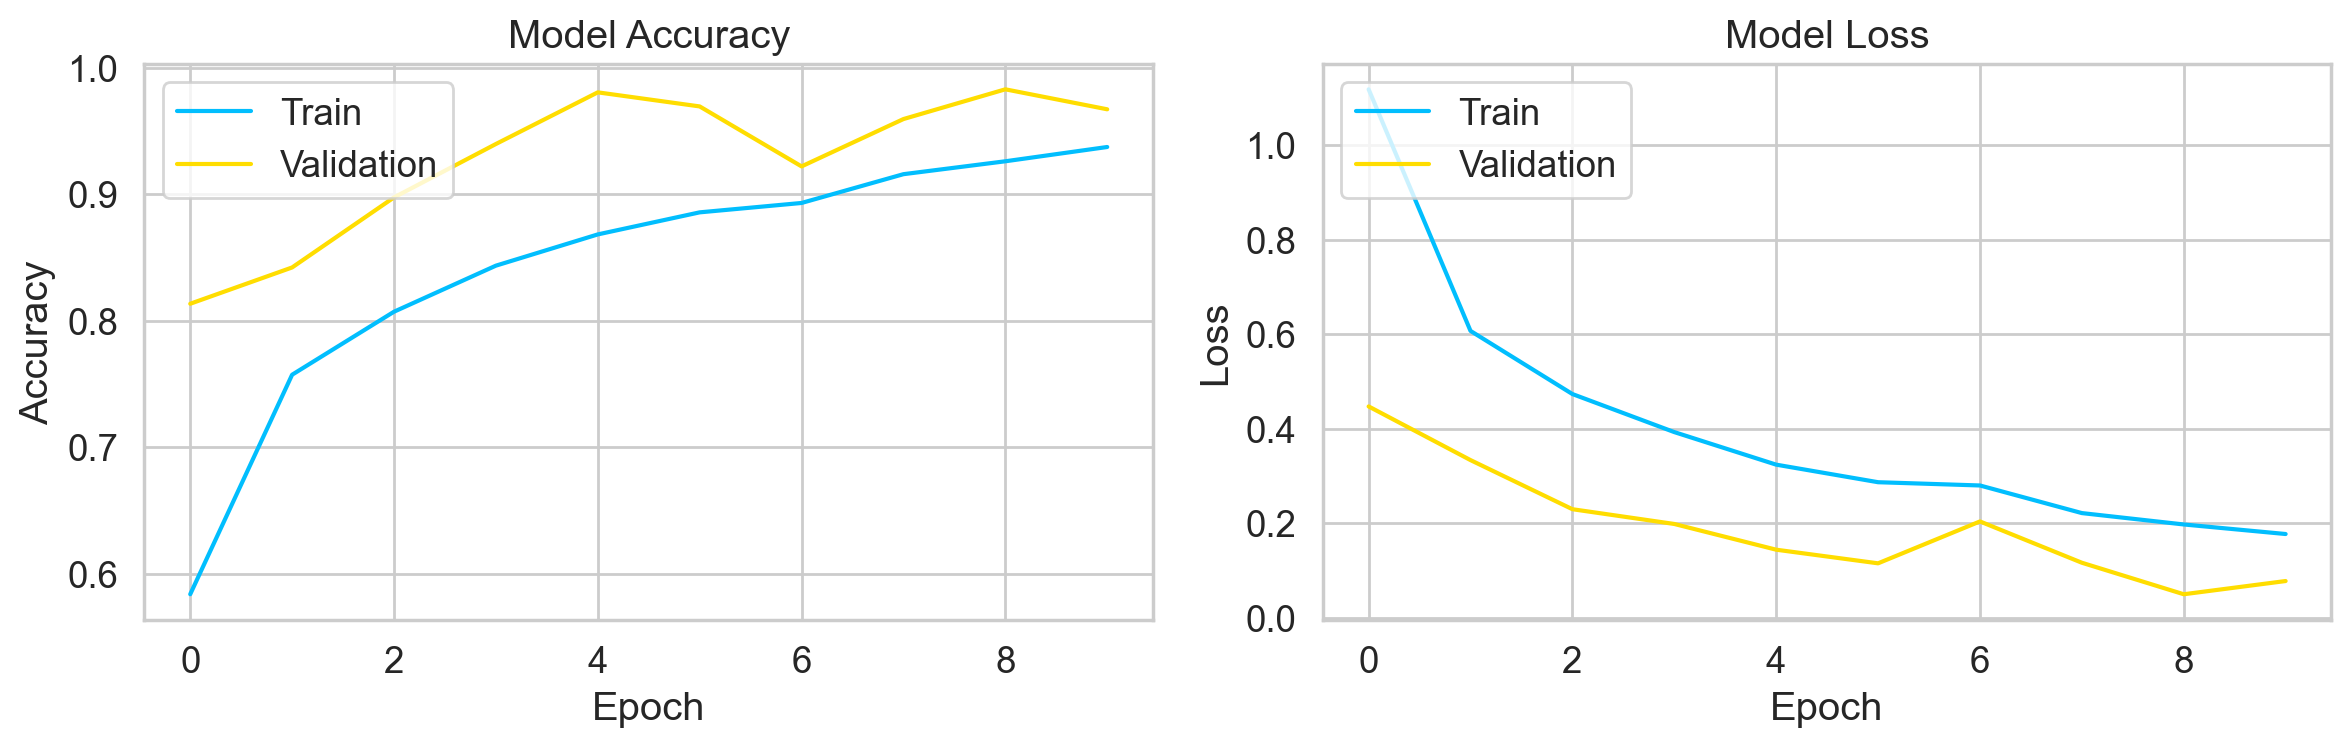

In [15]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Non FFT CNN LSTM

In [52]:
# import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scipy.fft import fft

# Assuming 'df' is your DataFrame
def preprocess_data(df):
    df['Torque'] = df['Torque'].replace('no load', 0)
    features = ['E1', 'E2', 'E3', 'I1', 'I2', 'I3', 'Pm', 'AI8', 'Torque']
    target_column = 'Category'

    scaler = StandardScaler()
    X = scaler.fit_transform(df[features])
    
    label_encoder = LabelEncoder()
    Y = label_encoder.fit_transform(df[target_column])

    X = X.astype(float)
    Y = Y.astype(float)

    return X, Y, label_encoder

def time_series_steps(df, seq_length=200):
    X, y, label_encoder = preprocess_data(df)
    print("X Shape: ", X.shape)
    X_seq = []
    y_seq = []

    for i in range(len(X) - seq_length + 1):
        X_seq.append(X[i:i + seq_length, :])
        y_seq.append(y[i + seq_length - 1])

    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

    print("X sequence shape:", X_seq.shape)
    print("y sequence shape:", y_seq.shape)
    
    return X_seq, y_seq, label_encoder

def init_model(X, y):
    seq_length = 200
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=102)
    
      # Reshape your input data to have the shape (batch_size, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], seq_length, X_train.shape[2]))
#     X_test = X_test.reshape((X_test.shape[0], seq_length, X_test.shape[2]))
    X_val = X_val.reshape((X_val.shape[0], seq_length, X_val.shape[2]))
    
#     print("X_train shape:", X_train.shape)
#     print("X_test shape:", X_test.shape)
#     print("X_val shape:", X_val.shape)

    # Convert labels to integers (if not already)
    y_train = y_train.astype(int)
    y_val = y_val.astype(int)
#     y_test = y_test.astype(int)


    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 9)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(LSTM(units=20, activation='tanh', recurrent_activation='sigmoid', kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(units=5, activation='softmax'))

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model, X_train, y_train, X_val, y_val

# Assuming 'df' is your DataFrame
df = pd.read_csv("machines.csv")
df_test = pd.read_csv("machines test.csv")
X, Y, label_encoder = time_series_steps(df, 200)
X = np.expand_dims(X, axis=-1)  # Add a channel dimension for Conv1D
model, X_train, y_train, X_val, y_val = init_model(X, Y)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=2)


X Shape:  (19968, 9)
X sequence shape: (19769, 200, 9)
y sequence shape: (19769,)
Epoch 1/10
371/371 - 27s - loss: 2.5758 - accuracy: 0.8081 - val_loss: 0.2699 - val_accuracy: 0.9742 - 27s/epoch - 73ms/step
Epoch 2/10
371/371 - 24s - loss: 0.2782 - accuracy: 0.9605 - val_loss: 0.1551 - val_accuracy: 0.9856 - 24s/epoch - 65ms/step
Epoch 3/10
371/371 - 24s - loss: 0.1608 - accuracy: 0.9842 - val_loss: 0.0792 - val_accuracy: 0.9925 - 24s/epoch - 64ms/step
Epoch 4/10
371/371 - 24s - loss: 0.2255 - accuracy: 0.9631 - val_loss: 0.2514 - val_accuracy: 0.9727 - 24s/epoch - 66ms/step
Epoch 5/10
371/371 - 24s - loss: 0.2180 - accuracy: 0.9732 - val_loss: 0.2232 - val_accuracy: 0.9581 - 24s/epoch - 66ms/step
Epoch 6/10
371/371 - 26s - loss: 0.2099 - accuracy: 0.9664 - val_loss: 0.0711 - val_accuracy: 0.9939 - 26s/epoch - 70ms/step
Epoch 7/10
371/371 - 27s - loss: 0.4290 - accuracy: 0.9175 - val_loss: 0.2956 - val_accuracy: 0.9506 - 27s/epoch - 72ms/step
Epoch 8/10
371/371 - 24s - loss: 0.2141 - a

In [53]:
X_test, y_test, label_encoder = preprocess_data(df_test)
# Assuming 'df_test' is your testing DataFrame
X_test, y_test, label_encoder = time_series_steps(df_test, 200)
X_test = np.expand_dims(X_test, axis=-1)  # Add a channel dimension for Conv1D

X Shape:  (6655, 9)
X sequence shape: (6456, 200, 9)
y sequence shape: (6456,)


202/202 [==============================] - 3s 12ms/step
Test Accuracy: 87.64%


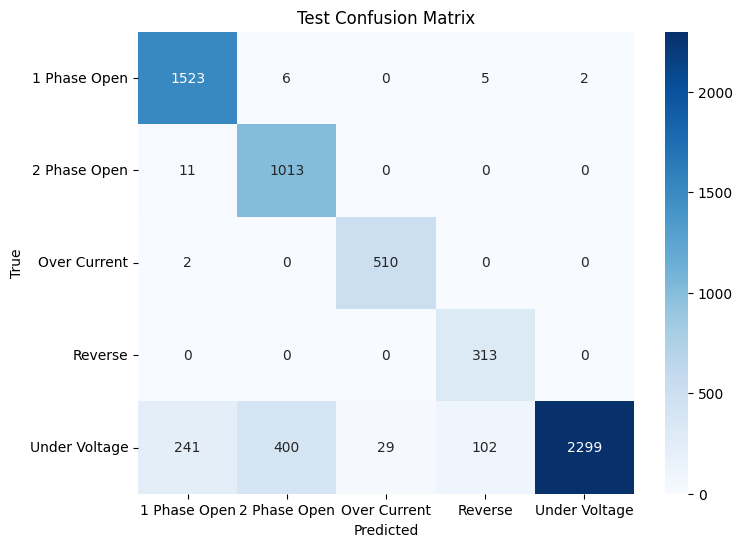

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# Evaluate the model on the testing data
y_test_pred = model.predict(X_test)
y_test_pred_class = np.argmax(y_test_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred_class)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_test_pred_class)
print(f'Test Accuracy: {accuracy_test * 100:.2f}%')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


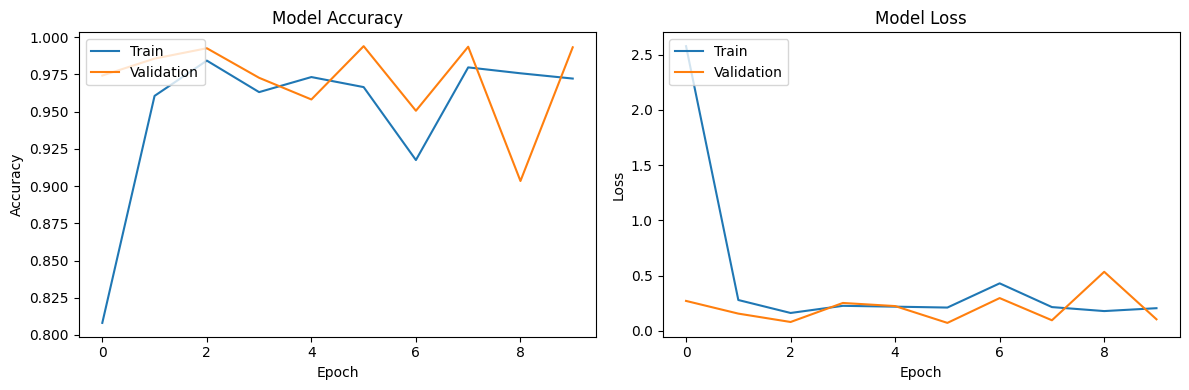

In [55]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [58]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = (y_test)  # No need to specify axis

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, zero_division=1))

202/202 [==============================] - 2s 12ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1536
         1.0       0.71      0.99      0.83      1024
         2.0       0.95      1.00      0.97       512
         3.0       0.75      1.00      0.85       313
         4.0       1.00      0.75      0.86      3071

    accuracy                           0.88      6456
   macro avg       0.85      0.95      0.89      6456
weighted avg       0.90      0.88      0.88      6456



# MLSTM-FCN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Conv1D, Flatten, Dense, Input, concatenate, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from scipy.fft import fft
from tslearn.preprocessing import TimeSeriesScalerMinMax
from hyperopt import fmin, tpe, hp

# Load your training and validation data
df_train_val = pd.read_csv("machines.csv")
df_train_val['Torque'] = pd.to_numeric(df_train_val['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)  # Fill NaN values with 0

# Load your test data
df_test = pd.read_csv("machines test.csv")
df_test['Torque'] = pd.to_numeric(df_test['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_test['Torque'] = df_test['Torque'].fillna(0)  # Fill NaN values with 0

# Assuming you have a column 'Category' for class labels
label_encoder = LabelEncoder()
df_train_val['Category'] = label_encoder.fit_transform(df_train_val['Category'])
df_test['Category'] = label_encoder.transform(df_test['Category'])

y_train_val = df_train_val['Category'].values
y_test = df_test['Category'].values

# One-hot encode the labels
y_train_val_one_hot = to_categorical(y_train_val)
y_test_one_hot = to_categorical(y_test)

# Create time series from DataFrame
X_train_val = df_train_val.drop(columns=['Category']).values
X_test = df_test.drop(columns=['Category']).values

# Perform FFT on the time series
X_train_val_fft = np.abs(fft(X_train_val))
X_test_fft = np.abs(fft(X_test))

# Normalize time series
X_train_val_fft = TimeSeriesScalerMinMax().fit_transform(X_train_val_fft)
X_test_fft = TimeSeriesScalerMinMax().fit_transform(X_test_fft)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val_fft, y_train_val_one_hot, test_size=0.2, random_state=42)

# Convert labels to float32
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

# CNN branch
cnn_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
rnn_input = Input(shape=(X_train.shape[1], X_train.shape[2]))

# Objective function for hyperparameter tuning
def objective(params):
    # Extract hyperparameters
    lstm_units = int(params['lstm_units'])
    conv_filters = int(params['conv_filters'])
    dropout_rate = params['dropout_rate']
    learning_rate = params['learning_rate']
    l2_regularization = params['l2_regularization']

       # CNN branch
    cnn_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
    cnn_output = Conv1D(96, 3, activation='relu')(cnn_input)
    cnn_output = BatchNormalization()(cnn_output)  # Add BatchNormalization layer
    cnn_output = Flatten()(cnn_output)
    cnn_output = Dropout(0.3)(cnn_output)
    cnn_output = Conv1D(48, 3, activation='relu')(cnn_input)
    cnn_output = BatchNormalization()(cnn_output)
    cnn_output = Flatten()(cnn_output)
    cnn_output = Dropout(0.3)(cnn_output)

    # RNN branch
    rnn_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
    rnn_output = LSTM(20, kernel_regularizer=l2(0.1))(rnn_input)
    rnn_output = BatchNormalization()(rnn_output)  # Add BatchNormalization layer
    rnn_output = Dropout(0.3)(rnn_output)
    rnn_output = LSTM(20, kernel_regularizer=l2(0.1))(rnn_input)
    rnn_output = BatchNormalization()(rnn_output)  # Add BatchNormalization layer
    rnn_output = Dropout(0.3)(rnn_output)

    # Concatenate the outputs of CNN and RNN
    merged = concatenate([cnn_output, rnn_output])

    # Fully connected layer for classification
    final_output = Dense(5, activation='softmax', kernel_regularizer=l2(l2_regularization))(merged)

    # Create the model
    model = Model(inputs=[cnn_input, rnn_input], outputs=final_output)

    # Compile the model with the specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit the model
    history = model.fit([X_train, X_train], y_train, epochs=10, batch_size=16, validation_data=([X_val, X_val], y_val), verbose=0)

    # Evaluate the model on the validation set
    val_accuracy = history.history['val_accuracy'][-1]

    return -val_accuracy  # Minimize negative accuracy (maximize accuracy)

# Define the hyperparameter search space
space = {
    'lstm_units': hp.quniform('lstm_units', 5, 50, 1),
    'conv_filters': hp.quniform('conv_filters', 32, 256, 32),
    'dropout_rate': hp.uniform('dropout_rate', 0, 0.5),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),  # Search in log space
    'l2_regularization': hp.loguniform('l2_regularization', -5, 0)  # Search in log space
}

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10)

print("Best Hyperparameters:", best)


  0%|                                                                           | 0/10 [00:00<?, ?trial/s, best loss=?]

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Conv1D, Flatten, Dense, Input, concatenate, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from scipy.fft import fft
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

df_train_val = pd.read_csv("machines.csv")
df_train_val['Torque'] = df_train_val['Torque'].replace('no load', 0)  # Convert 'Torque' to numeric
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)  # Fill NaN values with 0

df_test = pd.read_csv("machines test.csv")
df_test['Torque'] = df_test['Torque'].replace('no load', 0)  # Convert 'Torque' to numeric
df_test['Torque'] = df_test['Torque'].fillna(0)  # Fill NaN values with 0

# Assuming you have a column 'Category' for class labels
label_encoder = LabelEncoder()
df_train_val['Category'] = label_encoder.fit_transform(df_train_val['Category'])
df_test['Category'] = label_encoder.transform(df_test['Category'])

y_train_val = df_train_val['Category'].values
y_test = df_test['Category'].values

# One-hot encode the labels
y_train_val_one_hot = to_categorical(y_train_val)
y_test_one_hot = to_categorical(y_test)

# Create time series from DataFrame
X_train_val = df_train_val.drop(columns=['Category']).values
X_test = df_test.drop(columns=['Category']).values

# Perform FFT on the time series
X_train_val_fft = np.abs(fft(X_train_val))
X_test_fft = np.abs(fft(X_test))

# Normalize time series
X_train_val_fft = TimeSeriesScalerMinMax().fit_transform(X_train_val_fft)
X_test_fft = TimeSeriesScalerMinMax().fit_transform(X_test_fft)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val_fft, y_train_val_one_hot, test_size=0.2, random_state=42)

# Convert labels to float32
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

# CNN branch
cnn_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
cnn_output = Conv1D(64, 3, activation='relu')(cnn_input)
cnn_output = BatchNormalization()(cnn_output)  # Add BatchNormalization layer
cnn_output = Flatten()(cnn_output)
cnn_output = Dropout(0.05)(cnn_output)
cnn_output = Conv1D(48, 3, activation='relu')(cnn_input)
cnn_output = BatchNormalization()(cnn_output)
cnn_output = Flatten()(cnn_output)
cnn_output = Dropout(0.05)(cnn_output)

# RNN branch
rnn_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
rnn_output = LSTM(17, kernel_regularizer=l2(0.02))(rnn_input)
rnn_output = BatchNormalization()(rnn_output)  # Add BatchNormalization layer
rnn_output = Dropout(0.05)(rnn_output)
rnn_output = LSTM(17, kernel_regularizer=l2(0.02))(rnn_input)
rnn_output = BatchNormalization()(rnn_output)  # Add BatchNormalization layer
rnn_output = Dropout(0.05)(rnn_output)

# Concatenate the outputs of CNN and RNN
merged = concatenate([cnn_output, rnn_output])

# Fully connected layer for classification
final_output = Dense(5, activation='softmax', kernel_regularizer=l2(0.1))(merged)

# Create the model
model = Model(inputs=[cnn_input, rnn_input], outputs=final_output)


learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit([X_train, X_train], y_train, epochs=50, batch_size=100, validation_data=([X_val, X_val], y_val), verbose=1)

# Evaluate the model on the test set
y_test_pred_one_hot = model.predict([X_test_fft, X_test_fft])
y_test_pred = np.argmax(y_test_pred_one_hot, axis=1)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test}")


Epoch 1/50
160/160 [==============================] - 6s 13ms/step - loss: 1.6941 - accuracy: 0.5379 - val_loss: 1.7111 - val_accuracy: 0.4149
Epoch 2/50
160/160 [==============================] - 1s 7ms/step - loss: 1.1050 - accuracy: 0.6170 - val_loss: 1.3804 - val_accuracy: 0.5150
Epoch 3/50
160/160 [==============================] - 1s 7ms/step - loss: 0.9782 - accuracy: 0.6265 - val_loss: 1.0911 - val_accuracy: 0.6322
Epoch 4/50
160/160 [==============================] - 1s 7ms/step - loss: 0.9338 - accuracy: 0.6374 - val_loss: 0.9588 - val_accuracy: 0.6007
Epoch 5/50
160/160 [==============================] - 1s 7ms/step - loss: 0.9141 - accuracy: 0.6382 - val_loss: 0.9880 - val_accuracy: 0.6219
Epoch 6/50
160/160 [==============================] - 1s 8ms/step - loss: 0.8922 - accuracy: 0.6420 - val_loss: 0.8863 - val_accuracy: 0.6297
Epoch 7/50
160/160 [==============================] - 1s 8ms/step - loss: 0.8807 - accuracy: 0.6406 - val_loss: 0.9562 - val_accuracy: 0.5769
Epoch

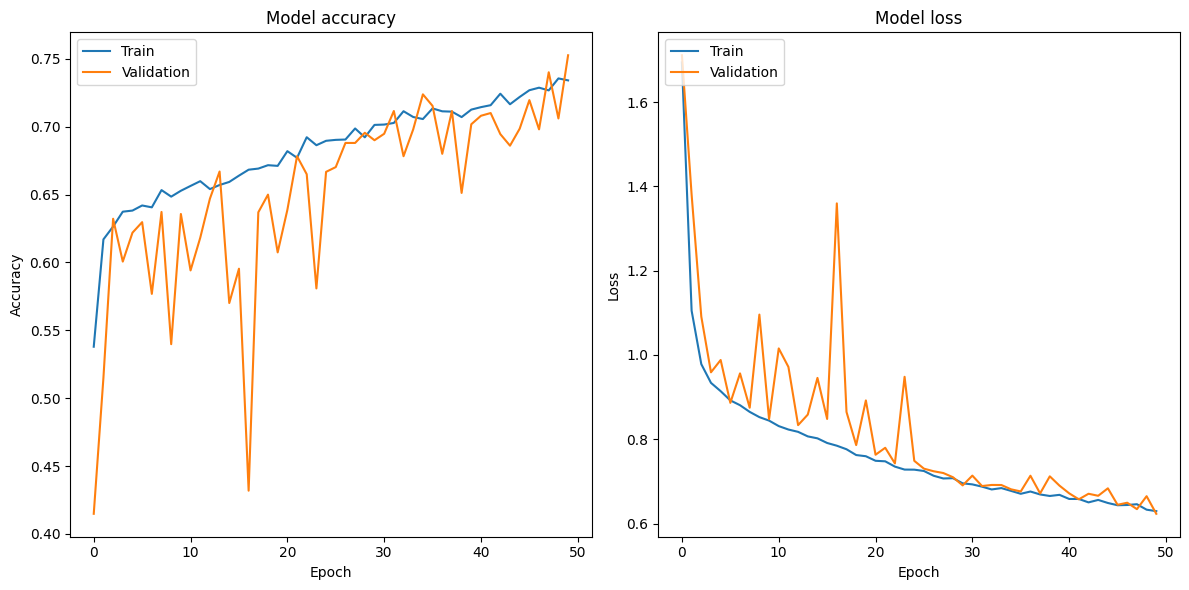

208/208 [==============================] - 0s 2ms/step


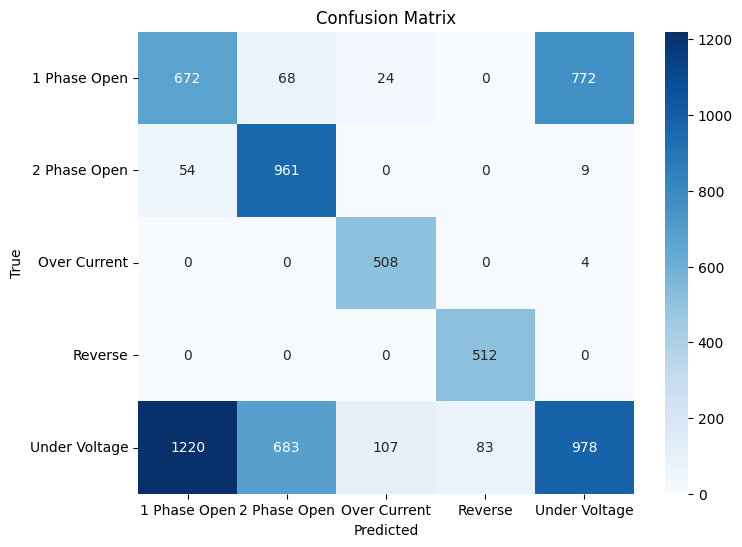

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Plot confusion matrix
y_test_pred_one_hot = model.predict([X_test_fft, X_test_fft])
y_test_pred = np.argmax(y_test_pred_one_hot, axis=1)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Non FFT Model MLSTM-FCN

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Conv1D, Flatten, Dense, Input, concatenate, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from scipy.fft import fft
from tslearn.preprocessing import TimeSeriesScalerMinMax
from hyperopt import fmin, tpe, hp

# Load your training and validation data
df_train_val = pd.read_csv("machines.csv")
df_train_val['Torque'] = pd.to_numeric(df_train_val['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)  # Fill NaN values with 0

# Load your test data
df_test = pd.read_csv("machines test.csv")
df_test['Torque'] = pd.to_numeric(df_test['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_test['Torque'] = df_test['Torque'].fillna(0)  # Fill NaN values with 0

# Assuming you have a column 'Category' for class labels
label_encoder = LabelEncoder()
df_train_val['Category'] = label_encoder.fit_transform(df_train_val['Category'])
df_test['Category'] = label_encoder.transform(df_test['Category'])

y_train_val = df_train_val['Category'].values
y_test = df_test['Category'].values

# One-hot encode the labels
y_train_val_one_hot = to_categorical(y_train_val)
y_test_one_hot = to_categorical(y_test)

# Create time series from DataFrame
X_train_val = df_train_val.drop(columns=['Category']).values
X_test = df_test.drop(columns=['Category']).values

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val_one_hot, test_size=0.2, random_state=42)

# Convert labels to float32
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

# Objective function for hyperparameter tuning
def objective(params):
    # Extract hyperparameters
    lstm_units = int(params['lstm_units'])
    conv_filters = int(params['conv_filters'])
    dropout_rate = params['dropout_rate']
    learning_rate = params['learning_rate']
    l2_regularization = params['l2_regularization']

    # CNN branch
    cnn_output = Conv1D(conv_filters, 3, activation='relu', kernel_regularizer=l2(l2_regularization))(cnn_input)
    cnn_output = Flatten()(cnn_output)
    cnn_output = Dropout(dropout_rate)(cnn_output)

    # RNN branch
    rnn_output = LSTM(lstm_units, kernel_regularizer=l2(l2_regularization))(rnn_input)
    rnn_output = Dropout(dropout_rate)(rnn_output)

    # Concatenate the outputs of CNN and RNN
    merged = concatenate([cnn_output, rnn_output])

    # Fully connected layer for classification
    final_output = Dense(5, activation='softmax', kernel_regularizer=l2(l2_regularization))(merged)

    # Create the model
    model = Model(inputs=[cnn_input, rnn_input], outputs=final_output)

    # Compile the model with the specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Fit the model
    history = model.fit([X_train, X_train], y_train, epochs=10, batch_size=32, validation_data=([X_val, X_val], y_val), verbose=0)

    # Evaluate the model on the validation set
    val_accuracy = history.history['val_accuracy'][-1]

    return -val_accuracy  # Minimize negative accuracy (maximize accuracy)

# Define the hyperparameter search space
space = {
    'lstm_units': hp.quniform('lstm_units', 5, 50, 1),
    'conv_filters': hp.quniform('conv_filters', 32, 256, 32),
    'dropout_rate': hp.uniform('dropout_rate', 0, 0.5),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),  # Search in log space
    'l2_regularization': hp.loguniform('l2_regularization', -5, 0)  # Search in log space
}

# Run Bayesian optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10)

# Print the best hyperparameters
print("Best Hyperparameters:", best)


100%|███████████████████████████████████████████████| 10/10 [05:17<00:00, 31.72s/trial, best loss: -0.7871807813644409]
Best Hyperparameters: {'conv_filters': 224.0, 'dropout_rate': 0.0352815943719339, 'l2_regularization': 0.0859722921679129, 'learning_rate': 0.061599411335658744, 'lstm_units': 24.0}


In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Conv1D, Flatten, Dense, Input, concatenate, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tensorflow.keras.optimizers import Adam


# Load your training and validation data
df_train_val = pd.read_csv("machines.csv")
df_train_val['Torque'] = pd.to_numeric(df_train_val['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)  # Fill NaN values with 0

# Load your test data
df_test = pd.read_csv("machines test.csv")
df_test['Torque'] = pd.to_numeric(df_test['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_test['Torque'] = df_test['Torque'].fillna(0)  # Fill NaN values with 0

# Assuming you have a column 'Category' for class labels
label_encoder = LabelEncoder()
df_train_val['Category'] = label_encoder.fit_transform(df_train_val['Category'])
df_test['Category'] = label_encoder.transform(df_test['Category'])

y_train_val = df_train_val['Category'].values
y_test = df_test['Category'].values

# One-hot encode the labels
y_train_val_one_hot = to_categorical(y_train_val)
y_test_one_hot = to_categorical(y_test)

# Create time series from DataFrame
X_train_val = df_train_val.drop(columns=['Category']).values
X_test = df_test.drop(columns=['Category']).values

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val_one_hot, test_size=0.2)

print(X_train.shape)

# Convert labels to float32
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

# CNN branch
cnn_input = Input(shape=(X_train.shape[1], 1))
cnn_output = Conv1D(224, 3, activation='relu')(cnn_input)
cnn_output = BatchNormalization()(cnn_output)  # Add BatchNormalization layer
cnn_output = Flatten()(cnn_output)
cnn_output = Dropout(0.03)(cnn_output)
cnn_output = Conv1D(112, 3, activation='relu')(cnn_input)
cnn_output = BatchNormalization()(cnn_output)  # Add BatchNormalization layer
cnn_output = Flatten()(cnn_output)
cnn_output = Dropout(0.03)(cnn_output)

# RNN branch
rnn_input = Input(shape=(X_train.shape[1], 1))
rnn_output = LSTM(30, kernel_regularizer=l2(0.8))(rnn_input)
rnn_output = BatchNormalization()(rnn_output)  # Add BatchNormalization layer
rnn_output = Dropout(0.03)(rnn_output)
rnn_output = LSTM(30, kernel_regularizer=l2(0.8))(rnn_input)
rnn_output = BatchNormalization()(rnn_output)  # Add BatchNormalization layer
rnn_output = Dropout(0.03)(rnn_output)

# Concatenate the outputs of CNN and RNN
merged = concatenate([cnn_output, rnn_output])

# Fully connected layer for classification
final_output = Dense(5, activation='softmax', kernel_regularizer=l2(0.08))(merged)

# Create the model
model = Model(inputs=[cnn_input, rnn_input], outputs=final_output)


(15974, 10)


In [45]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit([X_train, X_train], y_train, epochs=100, batch_size=100, validation_data=([X_val, X_val], y_val), verbose=1)

# Evaluate the model on the test set
y_test_pred_one_hot = model.predict([X_test, X_test])
y_test_pred = np.argmax(y_test_pred_one_hot, axis=1)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test}")


Epoch 1/100
160/160 [==============================] - 3s 8ms/step - loss: 1.7058 - accuracy: 0.7621 - val_loss: 1.3490 - val_accuracy: 0.6104
Epoch 2/100
160/160 [==============================] - 1s 6ms/step - loss: 0.6078 - accuracy: 0.8548 - val_loss: 0.6422 - val_accuracy: 0.7742
Epoch 3/100
160/160 [==============================] - 1s 6ms/step - loss: 0.4612 - accuracy: 0.8680 - val_loss: 0.4304 - val_accuracy: 0.8806
Epoch 4/100
160/160 [==============================] - 1s 6ms/step - loss: 0.3850 - accuracy: 0.8717 - val_loss: 0.3765 - val_accuracy: 0.8523
Epoch 5/100
160/160 [==============================] - 1s 6ms/step - loss: 0.3393 - accuracy: 0.8754 - val_loss: 0.3246 - val_accuracy: 0.8678
Epoch 6/100
160/160 [==============================] - 1s 6ms/step - loss: 0.3244 - accuracy: 0.8759 - val_loss: 0.3177 - val_accuracy: 0.8721
Epoch 7/100
160/160 [==============================] - 1s 6ms/step - loss: 0.3052 - accuracy: 0.8772 - val_loss: 0.3355 - val_accuracy: 0.8648

Epoch 58/100
160/160 [==============================] - 1s 7ms/step - loss: 0.2211 - accuracy: 0.8750 - val_loss: 0.2075 - val_accuracy: 0.8836
Epoch 59/100
160/160 [==============================] - 1s 7ms/step - loss: 0.2210 - accuracy: 0.8742 - val_loss: 0.2155 - val_accuracy: 0.8838
Epoch 60/100
160/160 [==============================] - 1s 7ms/step - loss: 0.2231 - accuracy: 0.8765 - val_loss: 0.2192 - val_accuracy: 0.8751
Epoch 61/100
160/160 [==============================] - 1s 6ms/step - loss: 0.2402 - accuracy: 0.8693 - val_loss: 0.2412 - val_accuracy: 0.8653
Epoch 62/100
160/160 [==============================] - 1s 6ms/step - loss: 0.2235 - accuracy: 0.8735 - val_loss: 0.2378 - val_accuracy: 0.8751
Epoch 63/100
160/160 [==============================] - 1s 6ms/step - loss: 0.2192 - accuracy: 0.8742 - val_loss: 0.2108 - val_accuracy: 0.8791
Epoch 64/100
160/160 [==============================] - 1s 6ms/step - loss: 0.2182 - accuracy: 0.8745 - val_loss: 0.2172 - val_accuracy:

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = (y_test)  # No need to specify axis

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, zero_division=1))

In [46]:
# Assuming you have split your data into X_train, X_val, y_train, and y_val

# Print distribution of classes in the training set
print("Training Set Class Distribution:")
print(pd.Series(np.argmax(y_train, axis=1)).value_counts())

# Print distribution of classes in the validation set
print("\nValidation Set Class Distribution:")
print(pd.Series(np.argmax(y_val, axis=1)).value_counts())


Training Set Class Distribution:
0    3317
1    3281
3    3268
2    3257
4    2851
dtype: int64

Validation Set Class Distribution:
2    839
3    828
1    815
0    779
4    733
dtype: int64


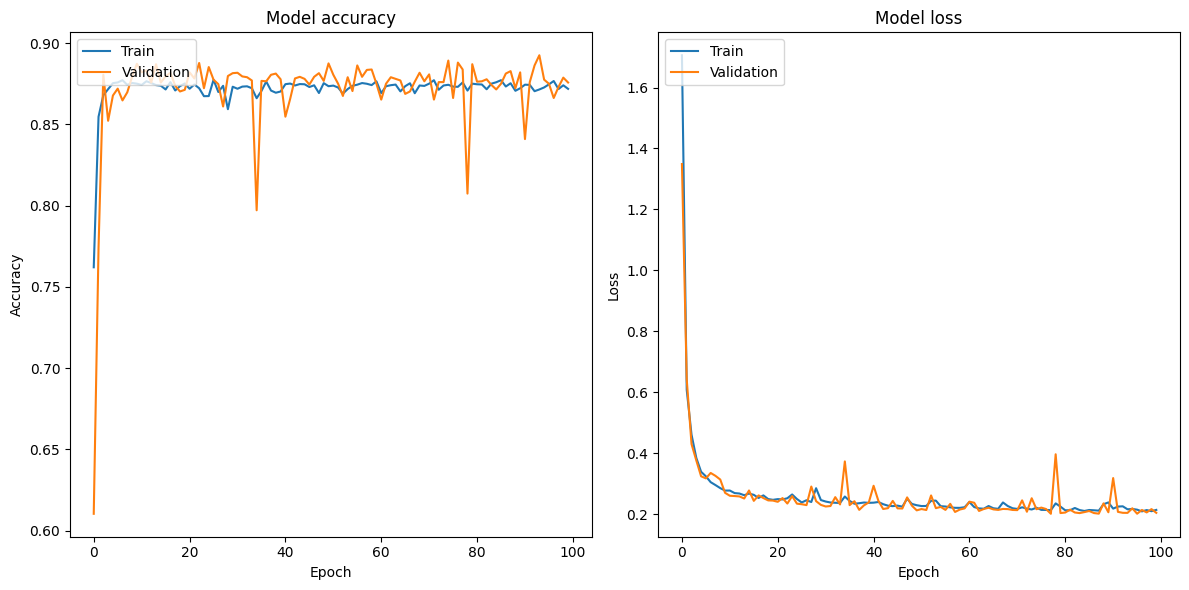

208/208 [==============================] - 0s 2ms/step


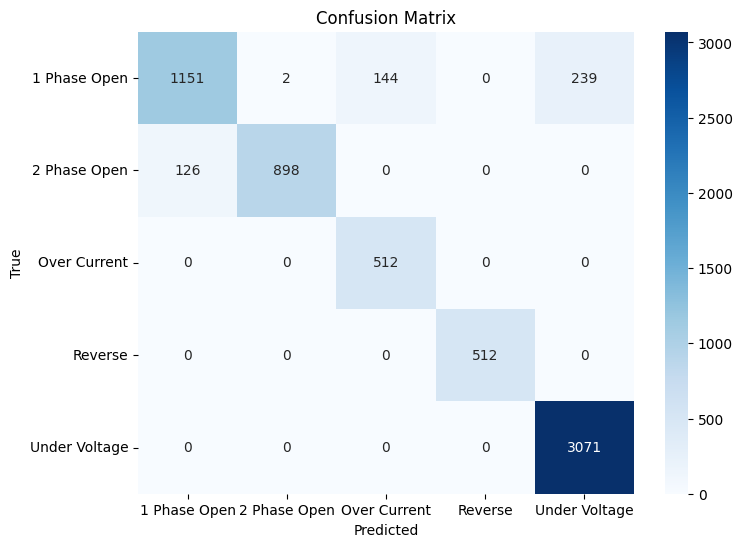

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Plot confusion matrix
y_test_pred_one_hot = model.predict([X_test, X_test])
y_test_pred = np.argmax(y_test_pred_one_hot, axis=1)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Trying to convert it to a Binary Classification Problem

In [134]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Conv1D, Flatten, Dense, Input, concatenate, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from scipy.fft import fft
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import TimeSeriesOverSampler

# Load your training and validation data
df_train_val = pd.read_csv("trainingminusnormalclean.csv")
df_train_val['Torque'] = pd.to_numeric(df_train_val['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)  # Fill NaN values with 0

# Load your test data
df_test = pd.read_csv("TestData2.csv")
df_test['Torque'] = pd.to_numeric(df_test['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_test['Torque'] = df_test['Torque'].fillna(0)  # Fill NaN values with 0

# Assuming you have a column 'Category' for class labels
label_encoder = LabelEncoder()
df_train_val['Category'] = label_encoder.fit_transform(df_train_val['Category'])
df_test['Category'] = label_encoder.transform(df_test['Category'])

# Choose the positive class (e.g., class 0)
positive_class = 0

# Create binary labels: 1 for positive class, 0 for all other classes
df_train_val['BinaryLabel'] = np.where(df_train_val['Category'] == positive_class, 1, 0)
df_test['BinaryLabel'] = np.where(df_test['Category'] == positive_class, 1, 0)

y_train_val = df_train_val['BinaryLabel'].values
y_test = df_test['BinaryLabel'].values

# One-hot encode the binary labels
y_train_val_one_hot = to_categorical(y_train_val)
y_test_one_hot = to_categorical(y_test)

# Create time series from DataFrame
X_train_val = df_train_val.drop(columns=['Category', 'BinaryLabel']).values
X_test = df_test.drop(columns=['Category', 'BinaryLabel']).values

# Perform FFT on the time series
X_train_val_fft = np.abs(fft(X_train_val))
X_test_fft = np.abs(fft(X_test))

# Normalize time series
X_train_val_fft = TimeSeriesScalerMinMax().fit_transform(X_train_val_fft)
X_test_fft = TimeSeriesScalerMinMax().fit_transform(X_test_fft)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val_fft, y_train_val_one_hot, test_size=0.2, random_state=42)

# Oversample the minority class while preserving time series structure
oversampler = TimeSeriesOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Convert labels to float32
y_train_resampled = y_train_resampled.astype(np.float32)
y_val = y_val.astype(np.float32)

# CNN branch
cnn_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
cnn_output = Conv1D(96, 3, activation='relu')(cnn_input)
#cnn_output = BatchNormalization()(cnn_output)  # Add BatchNormalization layer
cnn_output = Flatten()(cnn_output)
cnn_output = Dropout(0.021039400518128082)(cnn_output)

# RNN branch
rnn_input = Input(shape=(X_train.shape[1], X_train.shape[2]))
rnn_output = LSTM(17, kernel_regularizer=l2(0.006971725491703063))(rnn_input)
#rnn_output = BatchNormalization()(rnn_output)  # Add BatchNormalization layer
rnn_output = Dropout(0.021039400518128082)(rnn_output)

# Concatenate the outputs of CNN and RNN
merged = concatenate([cnn_output, rnn_output])

# Fully connected layer for classification
final_output = Dense(2, activation='softmax', kernel_regularizer=l2(0.006971725491703063))(merged)

# Create the model
model = Model(inputs=[cnn_input, rnn_input], outputs=final_output)

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit([X_train, X_train], y_train, epochs=100, batch_size=32, validation_data=([X_val, X_val], y_val), verbose=1)

# Evaluate the model on the test set
y_test_pred_one_hot = model.predict([X_test_fft, X_test_fft])
y_test_pred = np.argmax(y_test_pred_one_hot, axis=1)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test}")


ImportError: cannot import name 'TimeSeriesOverSampler' from 'imblearn.over_sampling' (C:\Users\Ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\over_sampling\__init__.py)

In [120]:
# Assuming you have split your data into X_train, X_val, y_train, and y_val

# Print distribution of classes in the training set
print("Training Set Class Distribution:")
print(pd.Series(np.argmax(y_train, axis=1)).value_counts())

# Print distribution of classes in the validation set
print("\nValidation Set Class Distribution:")
print(pd.Series(np.argmax(y_val, axis=1)).value_counts())


Training Set Class Distribution:
0    1631
1     416
dtype: int64

Validation Set Class Distribution:
0    416
1     96
dtype: int64


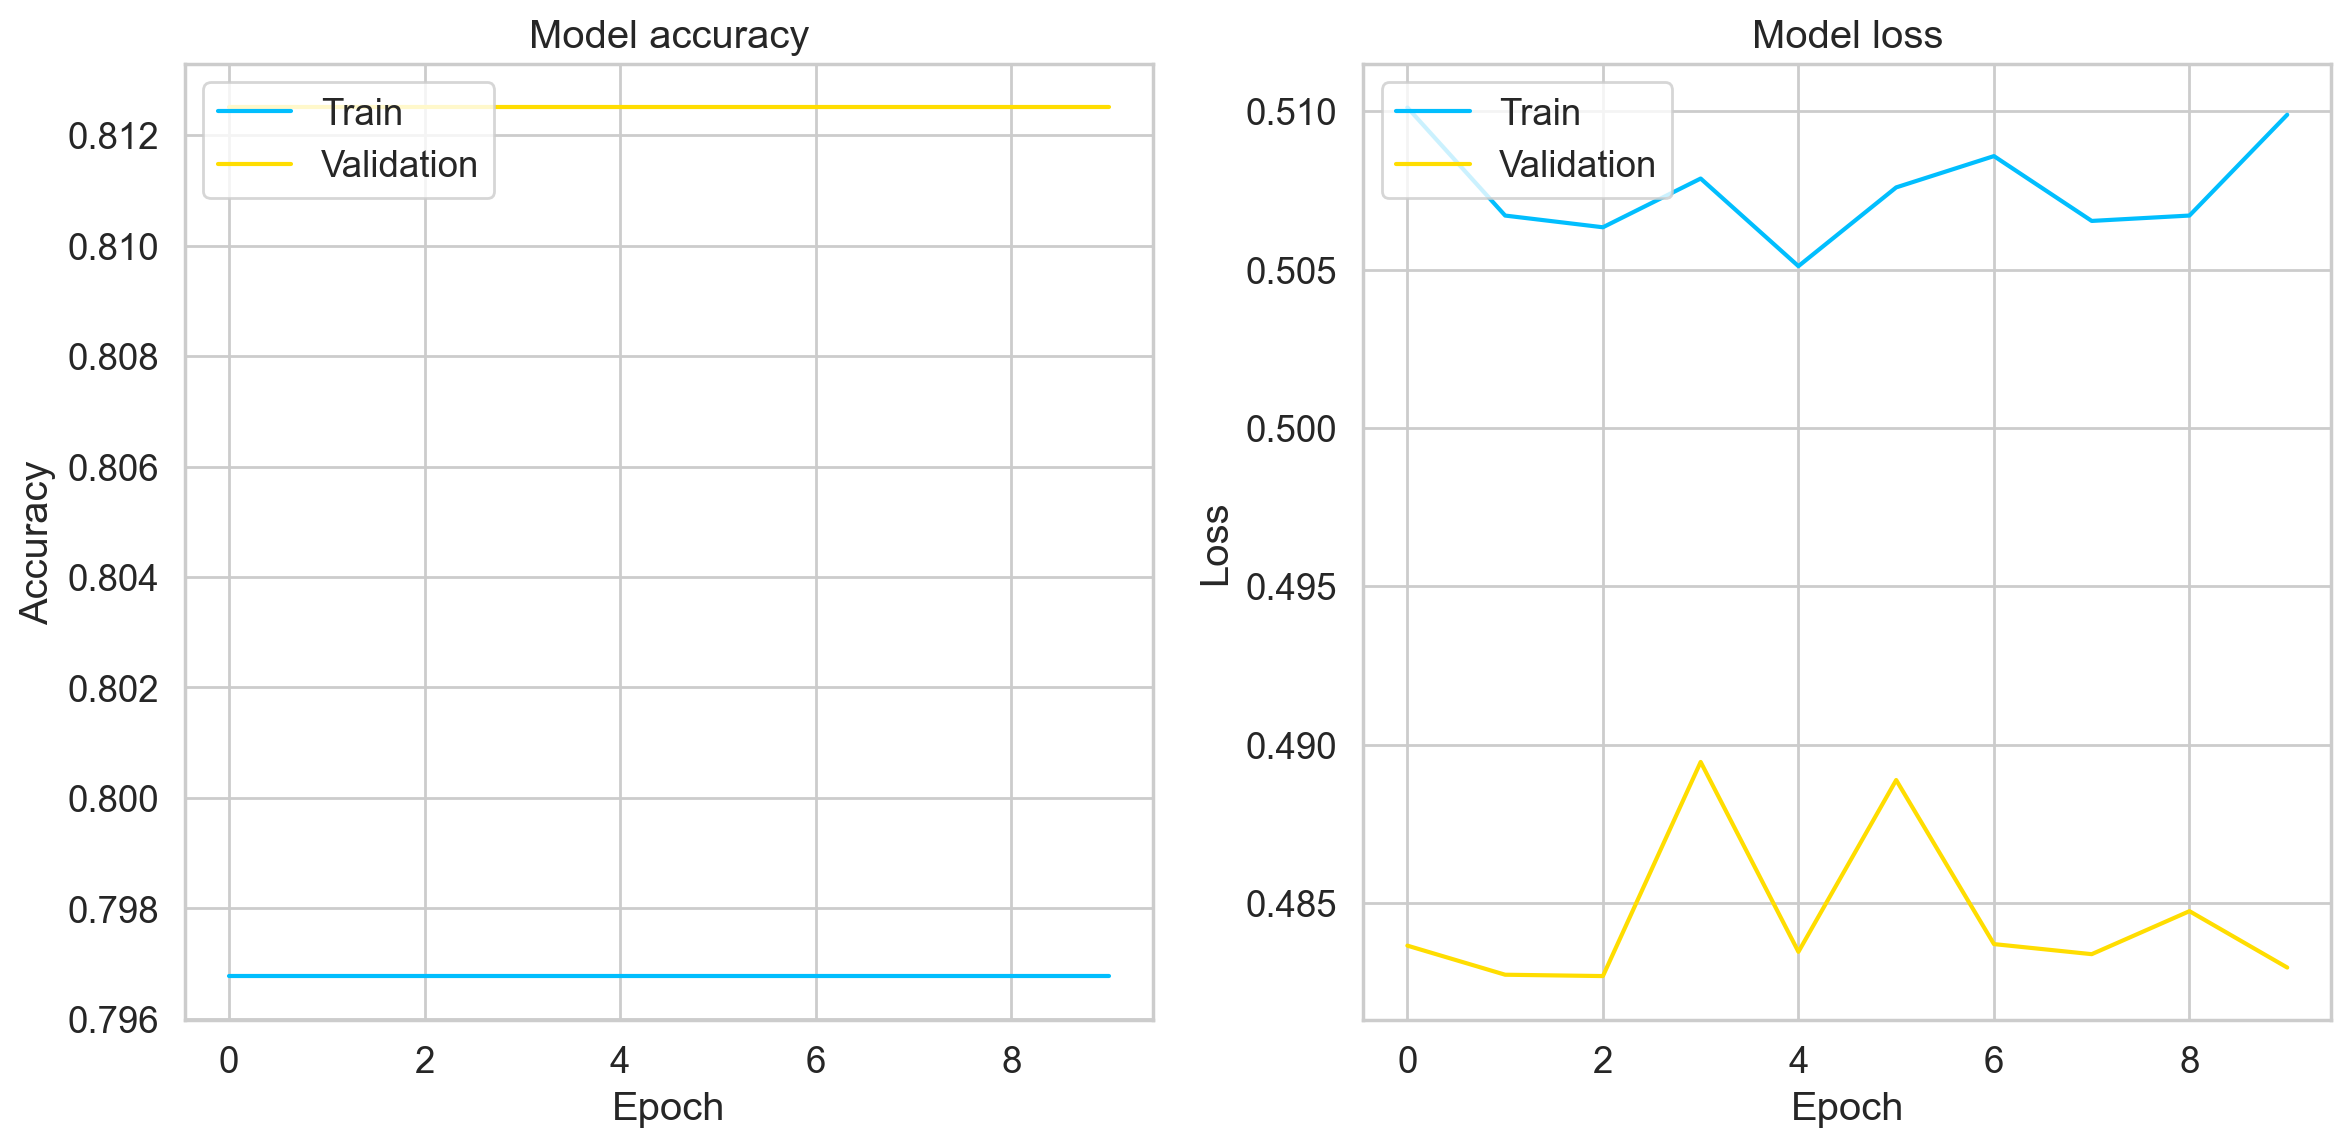

80/80 [==============================] - 0s 2ms/step


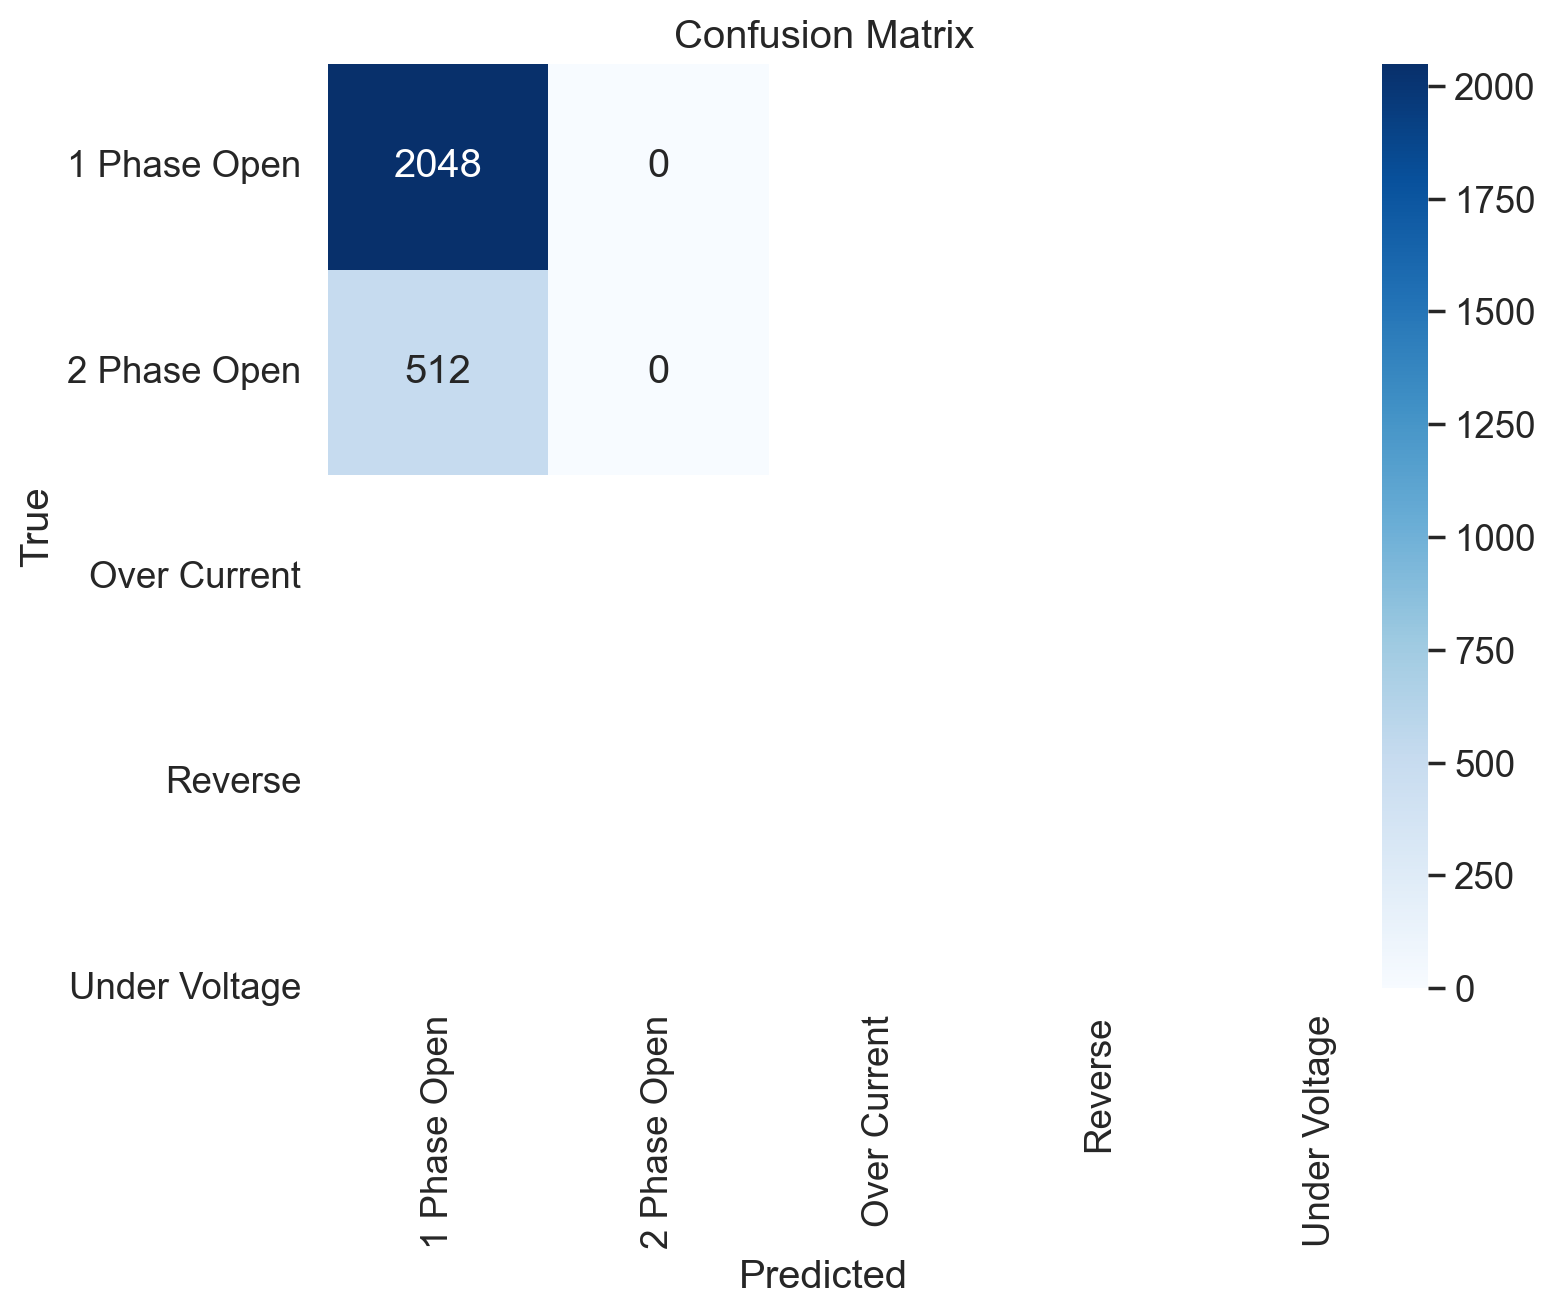

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Plot confusion matrix
y_test_pred_one_hot = model.predict([X_test_fft, X_test_fft])
y_test_pred = np.argmax(y_test_pred_one_hot, axis=1)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Shapelet Classifier As Non FFT

In [28]:
import pandas as pd
import numpy as np
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.fft import fft

# Load your training and validation data
df_train_val = pd.read_csv("trainingminusnormalclean.csv")
df_train_val['Torque'] = pd.to_numeric(df_train_val['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)  # Fill NaN values with 0

# Load your test data
df_test = pd.read_csv("TestData2.csv")
df_test['Torque'] = pd.to_numeric(df_test['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_test['Torque'] = df_test['Torque'].fillna(0)  # Fill NaN values with 0

# Assuming you have a column 'Category' for class labels
y_train_val = df_train_val['Category'].values
y_test = df_test['Category'].values

# Create time series from DataFrame
X_train_val = df_train_val.drop(columns=['Category']).values
X_test = df_test.drop(columns=['Category']).values

# Perform FFT on the time series
X_train_val_fft = np.abs(fft(X_train_val))
X_test_fft = np.abs(fft(X_test))

# Normalize time series
X_train_val_fft = TimeSeriesScalerMinMax().fit_transform(X_train_val_fft)
X_test_fft = TimeSeriesScalerMinMax().fit_transform(X_test_fft)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val_fft, y_train_val, test_size=0.2, random_state=42)

# Define shapelet parameters
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=X_train.shape[0], 
                                                       ts_sz=X_train.shape[1],
                                                       n_classes=len(set(y_train)), 
                                                       l=0.1, 
                                                       r=1)

# Initialize the shapelet model
shapelet_model = ShapeletModel(n_shapelets_per_size=shapelet_sizes, 
                               optimizer="sgd", 
                               weight_regularizer=.01, 
                               max_iter=200)

# Fit the shapelet model
shapelet_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = shapelet_model.predict(X_val)

# Evaluate the accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val}")

# Make predictions on the test set
y_test_pred = shapelet_model.predict(X_test_fft)

# Evaluate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test}")


C:\Users\Ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Validation Accuracy: 0.1796875
Test Accuracy: 0.2


In [33]:
import pandas as pd
import numpy as np
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.fft import fft

# Load your training and validation data
df_train_val = pd.read_csv("trainingminusnormalclean.csv")
df_train_val['Torque'] = pd.to_numeric(df_train_val['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)  # Fill NaN values with 0

# Load your test data
df_test = pd.read_csv("TestData2.csv")
df_test['Torque'] = pd.to_numeric(df_test['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_test['Torque'] = df_test['Torque'].fillna(0)  # Fill NaN values with 0

# Assuming you have a column 'Category' for class labels
y_train_val = df_train_val['Category'].values
y_test = df_test['Category'].values

# Create time series from DataFrame
X_train_val = df_train_val.drop(columns=['Category']).values
X_test = df_test.drop(columns=['Category']).values

# Normalize time series
X_train_val = TimeSeriesScalerMinMax().fit_transform(X_train_val)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Define shapelet parameters
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=X_train.shape[0], 
                                                       ts_sz=X_train.shape[1],
                                                       n_classes=len(set(y_train)), 
                                                       l=0.1, 
                                                       r=1)

# Initialize the shapelet model
shapelet_model = ShapeletModel(n_shapelets_per_size=shapelet_sizes, 
                               optimizer="sgd", 
                               weight_regularizer=.01, 
                               max_iter=200)

# Fit the shapelet model
shapelet_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = shapelet_model.predict(X_val)

# Evaluate the accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val}")

# Make predictions on the test set
y_test_pred = shapelet_model.predict(X_test_fft)

# Evaluate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test}")


C:\Users\Ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Validation Accuracy: 0.294921875
Test Accuracy: 0.19453125


# TimeSeriesForest!

In [47]:
import pandas as pd
import numpy as np
from tsfresh import extract_features
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Load your training and validation data
df_train_val = pd.read_csv("trainingminusnormalclean.csv")
df_train_val['Torque'] = pd.to_numeric(df_train_val['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)  # Fill NaN values with 0

# Load your test data
df_test = pd.read_csv("TestData2.csv")
df_test['Torque'] = pd.to_numeric(df_test['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_test['Torque'] = df_test['Torque'].fillna(0)  # Fill NaN values with 0

# Specify the parameters you want to include
parameters = ['Torque', 'E1', 'E2', 'E3', 'I1', 'I2', 'I3', 'AI8', 'Pm']

# Create time series from DataFrame for training data
X_train_val = df_train_val[parameters].values

# Assuming you have a column 'Category' for class labels
y_train_val = df_train_val['Category'].values

# Convert the data to a time series format expected by tsfresh
X_train_val_ts = pd.DataFrame({'id': df_train_val.index.repeat(len(parameters)),
                               'time': np.tile(df_train_val.index, len(parameters)),
                               'parameter': np.repeat(parameters, len(df_train_val)),
                               'value': X_train_val.flatten(),
                               'category': np.tile(y_train_val, len(parameters) * len(df_train_val))})

# Extract features using tsfresh for training data
X_train_val_features = extract_features(X_train_val_ts, column_id="id", column_sort="time", column_kind="parameter")

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val_features, y_train_val, test_size=0.2, random_state=42)

# Use a k-Nearest Neighbors classifier for classification
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = knn_classifier.predict(X_val)

# Evaluate accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy_val * 100:.2f}%")

# Create time series from DataFrame for test data
X_test = df_test[parameters].values

# Convert the data to a time series format expected by tsfresh for test data
X_test_ts = pd.DataFrame({'id': df_test.index.repeat(len(parameters)),
                          'time': np.tile(df_test.index, len(parameters)),
                          'parameter': np.repeat(parameters, len(df_test)),
                          'value': X_test.flatten()})

# Extract features using tsfresh for test data
X_test_features = extract_features(X_test_ts, column_id="id", column_sort="time", column_kind="parameter")

# Make predictions on the test set
y_test_pred = knn_classifier.predict(X_test_features)

# Assuming you have the true labels for the test set
y_test = df_test['Category'].values

# Evaluate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test * 100:.2f}%")


C:\Users\Ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


ValueError: All arrays must be of the same length

# RISE

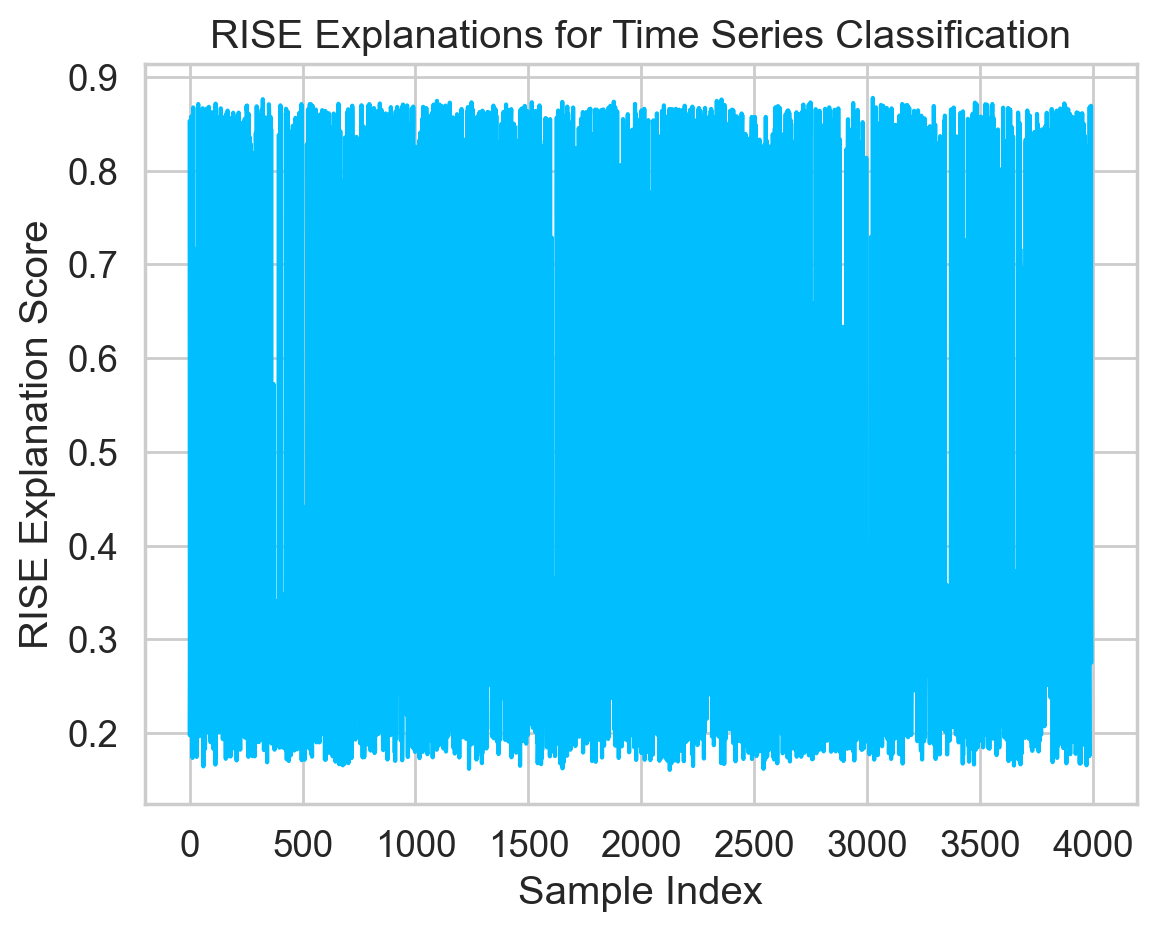

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your training and validation data
df_train_val = pd.read_csv("machines.csv")
df_train_val['Torque'] = pd.to_numeric(df_train_val['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)  # Fill NaN values with 0

# Load your test data
df_test = pd.read_csv("machines test.csv")
df_test['Torque'] = pd.to_numeric(df_test['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_test['Torque'] = df_test['Torque'].fillna(0)  # Fill NaN values with 0

# Assuming you have a column 'Category' for class labels
y_train_val = df_train_val['Category'].values
y_test = df_test['Category'].values

# Create time series from DataFrame
X_train_val = df_train_val.drop(columns=['Category']).values
X_test = df_test.drop(columns=['Category']).values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Train a simple RandomForestClassifier as an example model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Function to generate RISE masks
def generate_rise_masks(input_size, num_masks=1000, mask_size=(1, 10)):
    masks = []
    for _ in range(num_masks):
        mask_length = np.random.randint(mask_size[0], mask_size[1] + 1)
        mask = np.zeros(input_size)
        start = np.random.randint(0, input_size - mask_length + 1)
        mask[start:start + mask_length] = 1
        masks.append(mask)
    return np.array(masks)

# Function to apply RISE to a given input sequence
def apply_rise(sequence, masks):
    masked_sequences = masks * sequence
    return masked_sequences

# Function to explain a model prediction using RISE
def explain_with_rise(model, X, num_masks=1000, mask_size=(1, 10)):
    explanations = []
    input_size = X.shape[1]

    masks = generate_rise_masks(input_size, num_masks, mask_size)

    for i in range(len(X)):
        masked_sequences = apply_rise(X[i], masks)
        predictions = model.predict_proba(masked_sequences)[:, 1]
        explanation = np.mean(predictions)
        explanations.append(explanation)

    return np.array(explanations)

# Apply RISE to the validation set
rise_explanations = explain_with_rise(model, X_val)

# Visualize RISE explanations
plt.plot(rise_explanations)
plt.xlabel('Sample Index')
plt.ylabel('RISE Explanation Score')
plt.title('RISE Explanations for Time Series Classification')
plt.show()

(6655, 10)


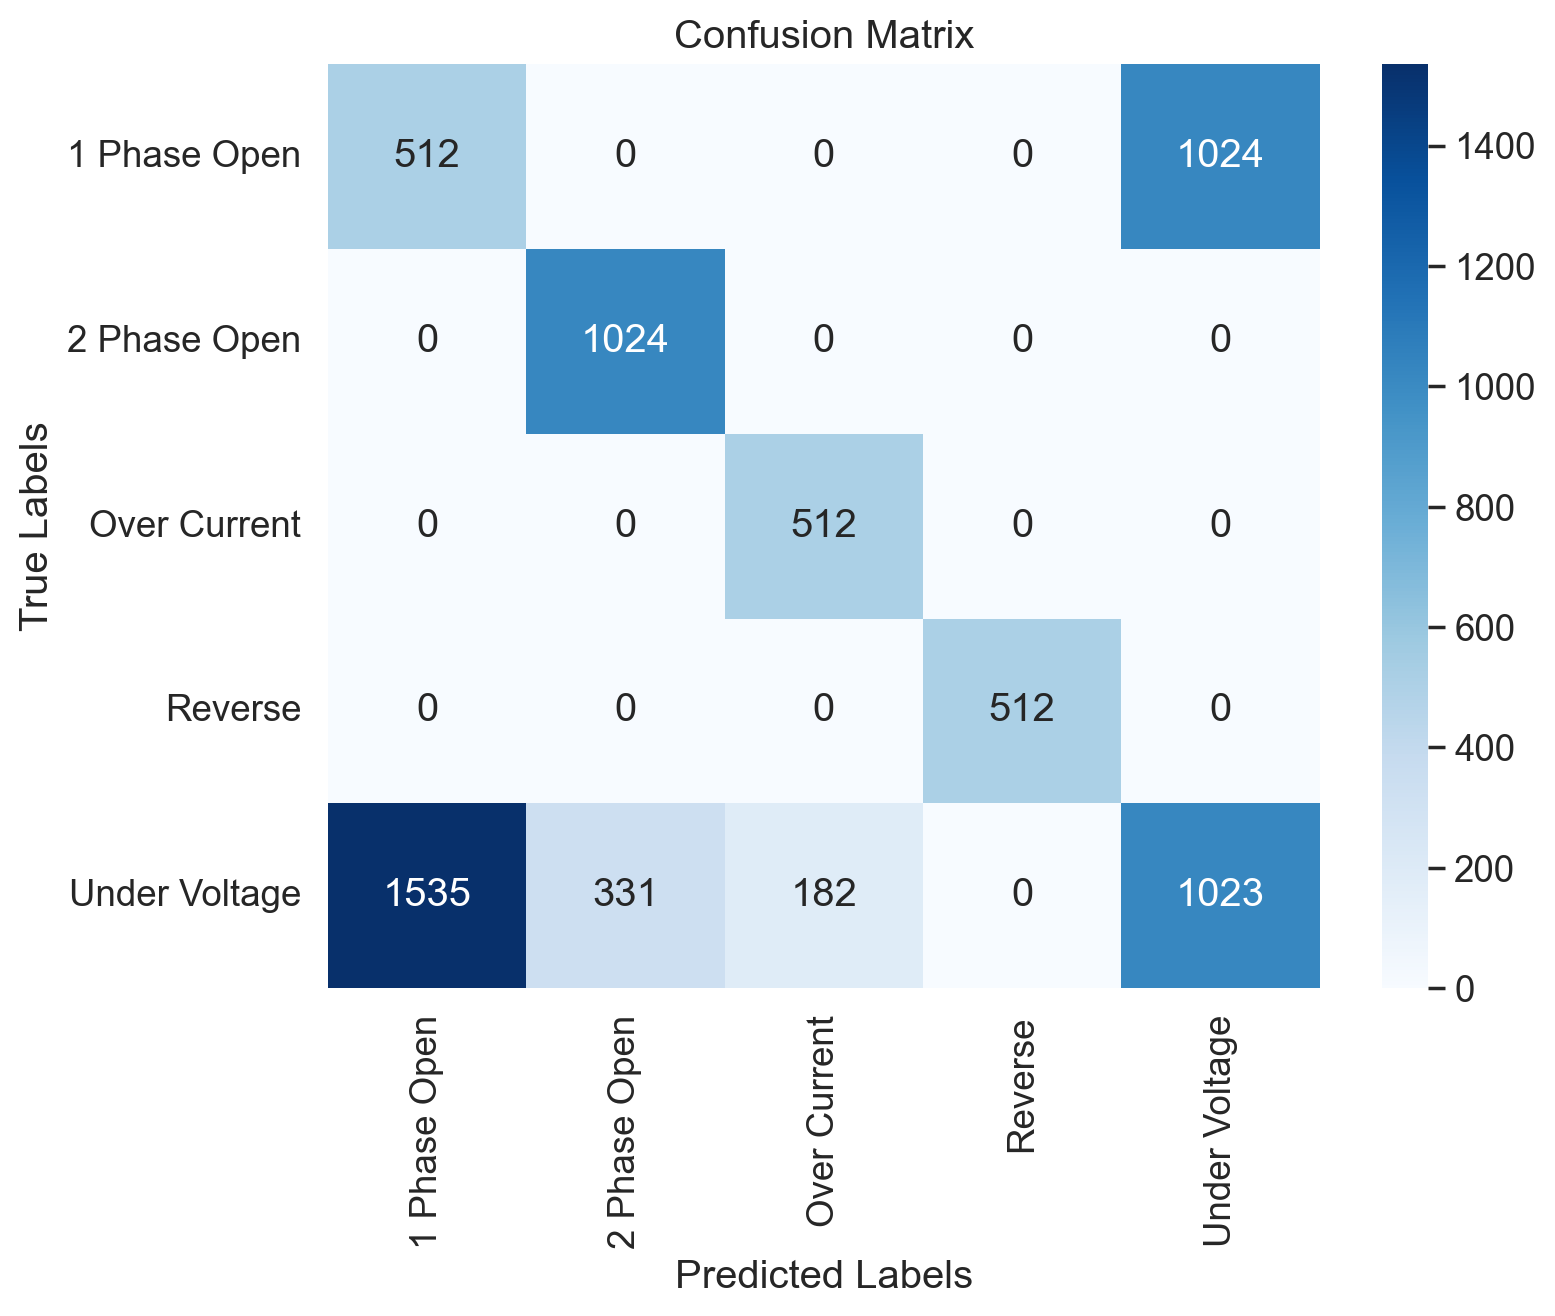

Testing Accuracy: 53.84%


In [85]:

print(X_test.shape)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and confusion matrix
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(f'Testing Accuracy: {test_accuracy:.2%}')

# Dynamic Time Warping

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from fastdtw import fastdtw
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load your training and validation data
df_train_val = pd.read_csv("machines.csv")
df_train_val['Torque'] = pd.to_numeric(df_train_val['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)  # Fill NaN values with 0

# Convert 'Category' column to integer type using LabelEncoder
label_encoder = LabelEncoder()
df_train_val['Category'] = label_encoder.fit_transform(df_train_val['Category'])

# Load your test data
df_test = pd.read_csv("machines test.csv")
df_test['Torque'] = pd.to_numeric(df_test['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_test['Torque'] = df_test['Torque'].fillna(0)  # Fill NaN values with 0

# Map 'Category' values to numeric labels using the same LabelEncoder
df_test['Category'] = label_encoder.transform(df_test['Category'])

# Assuming you have a column 'Category' for class labels
y_train_val = df_train_val['Category'].values
y_test = df_test['Category'].values

# Create time series from DataFrame
X_train_val = df_train_val.drop(columns=['Category']).values
X_test = df_test.drop(columns=['Category']).values


# Function to calculate DTW distance between two time series
def calculate_dtw_distance(series1, series2):
    distance, _ = fastdtw(series1, series2)
    return distance

# Function to calculate DTW distances between a test series and all training series
def calculate_dtw_distances(test_series, training_series):
    distances = [calculate_dtw_distance(test_series, train_series) for train_series in training_series]
    return distances

# Function to predict the label for a test series using k-nearest neighbors with DTW
def knn_predict(test_series, training_series, training_labels, k=3):
    distances = calculate_dtw_distances(test_series, training_series)
    nearest_neighbors_indices = np.argsort(distances)[:k]
    nearest_labels = training_labels[nearest_neighbors_indices]
    predicted_label = np.argmax(np.bincount(nearest_labels))
    return predicted_label

# Function to evaluate the accuracy of a k-NN model on a validation or test set
def evaluate_knn_model(X, y, X_train, y_train, k=3):
    y_pred = [knn_predict(test_series, X_train, y_train, k=k) for test_series in X]
    accuracy = accuracy_score(y, y_pred)
    return accuracy

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Example: Evaluate a k-NN model with DTW on the validation set
accuracy_val = evaluate_knn_model(X_val, y_val, X_train, y_train, k=3)
print(f'Accuracy on validation set using k-NN with DTW: {accuracy_val:.2f}')

# Example: Evaluate a k-NN model with DTW on the test set
accuracy_test = evaluate_knn_model(X_test, y_test, X_train, y_train, k=3)
print(f'Accuracy on test set using k-NN with DTW: {accuracy_test:.2f}')


Accuracy on validation set using k-NN with DTW: 0.90
Accuracy on test set using k-NN with DTW: 0.88


# Using a shaplet transform with K-NN

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from sklearn.metrics import accuracy_score

# Load your training and validation data
df_train_val = pd.read_csv("machines.csv")
df_train_val['Torque'] = pd.to_numeric(df_train_val['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)  # Fill NaN values with 0

# Convert 'Category' column to integer type using LabelEncoder
label_encoder = LabelEncoder()
df_train_val['Category'] = label_encoder.fit_transform(df_train_val['Category'])

# Load your test data
df_test = pd.read_csv("machines test.csv")
df_test['Torque'] = pd.to_numeric(df_test['Torque'], errors='coerce')  # Convert 'Torque' to numeric
df_test['Torque'] = df_test['Torque'].fillna(0)  # Fill NaN values with 0

# Map 'Category' values to numeric labels using the same LabelEncoder
df_test['Category'] = label_encoder.transform(df_test['Category'])

# Normalize the time series
scaler = TimeSeriesScalerMinMax()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

# Split the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Define the shapelet model
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=X_train.shape[0],
                                                       ts_sz=X_train.shape[1],
                                                       n_classes=len(np.unique(y_train)),
                                                       l=0.1, r=1)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes, optimizer="sgd", weight_regularizer=.01)

# Fit the model on the training data
shp_clf.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = shp_clf.predict(X_val)

# Calculate and print accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy_val:.2%}')

# Make predictions on the test set
y_test_pred = shp_clf.predict(X_test)

# Calculate and print accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {accuracy_test:.2%}')


C:\Users\Ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


Validation Accuracy: 49.75%
Testing Accuracy: 23.80%


# Time LeNet

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, AveragePooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers


# Load your training and validation data
df_train_val = pd.read_csv("machines.csv")
df_train_val['Torque'] = pd.to_numeric(df_train_val['Torque'], errors='coerce')
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)
label_encoder = LabelEncoder()
df_train_val['Category'] = label_encoder.fit_transform(df_train_val['Category'])

# Load your test data
df_test = pd.read_csv("machines test.csv")
df_test['Torque'] = pd.to_numeric(df_test['Torque'], errors='coerce')
df_test['Torque'] = df_test['Torque'].fillna(0)
df_test['Category'] = label_encoder.transform(df_test['Category'])

y_train_val = df_train_val['Category'].values
y_test = df_test['Category'].values

X_train_val = df_train_val.drop(columns=['Category']).values
X_test = df_test.drop(columns=['Category']).values

scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

# Convert labels to one-hot encoding
y_train_val = to_categorical(y_train_val)

# Reshape data for Conv1D input
X_train_val = X_train_val.reshape((X_train_val.shape[0], X_train_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Split the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Define the Time LeNet model with Dropout and Weight Regularization
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(10, kernel_size=5, activation='relu'),
    AveragePooling1D(pool_size=2),
    # Conv1D(16, kernel_size=5, activation='relu'),
    # AveragePooling1D(pool_size=2),
    Flatten(),
    Dense(120, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(84, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/20
999/999 [==============================] - 5s 4ms/step - loss: 0.9324 - accuracy: 0.7209 - val_loss: 0.5729 - val_accuracy: 0.7874
Epoch 2/20
999/999 [==============================] - 3s 3ms/step - loss: 0.5075 - accuracy: 0.8327 - val_loss: 0.4421 - val_accuracy: 0.8613
Epoch 3/20
999/999 [==============================] - 3s 3ms/step - loss: 0.4296 - accuracy: 0.8538 - val_loss: 0.3984 - val_accuracy: 0.8613
Epoch 4/20
999/999 [==============================] - 3s 3ms/step - loss: 0.3879 - accuracy: 0.8679 - val_loss: 0.3597 - val_accuracy: 0.8618
Epoch 5/20
999/999 [==============================] - 4s 4ms/step - loss: 0.3613 - accuracy: 0.8736 - val_loss: 0.3590 - val_accuracy: 0.8598
Epoch 6/20
999/999 [==============================] - 3s 3ms/step - loss: 0.3441 - accuracy: 0.8791 - val_loss: 0.3265 - val_accuracy: 0.8933
Epoch 7/20
999/999 [==============================] - 4s 4ms/step - loss: 0.3224 - accuracy: 0.8869 - val_loss: 0.3118 - val_accuracy: 0.8963
Epoch 

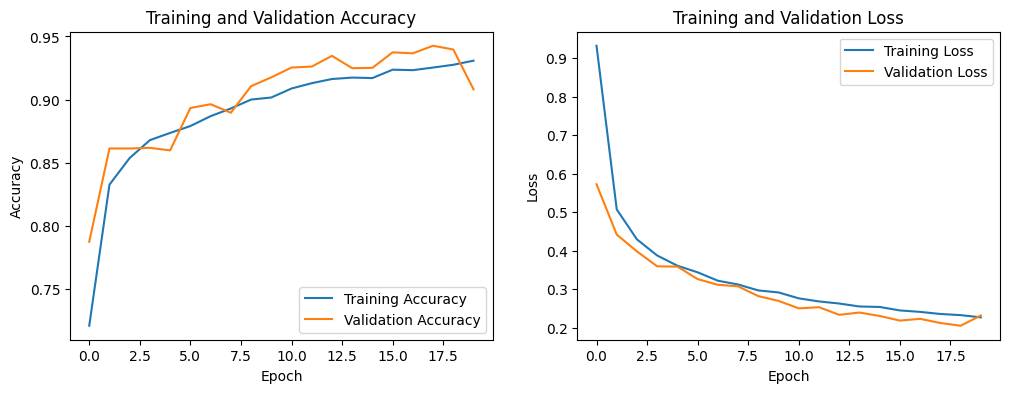

Test Loss: 2.6478
Test Accuracy: 55.42%
208/208 [==============================] - 1s 2ms/step


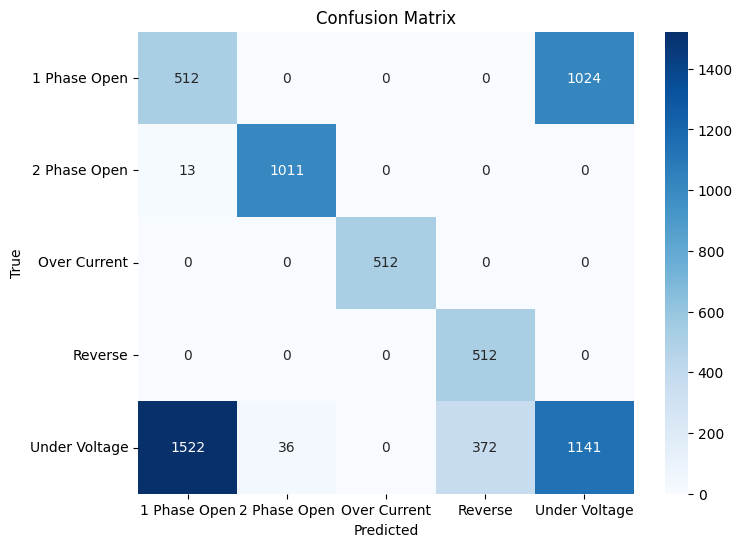

Classification Report:
               precision    recall  f1-score   support

 1 Phase Open       0.25      0.33      0.29      1536
 2 Phase Open       0.97      0.99      0.98      1024
 Over Current       1.00      1.00      1.00       512
      Reverse       0.58      1.00      0.73       512
Under Voltage       0.53      0.37      0.44      3071

     accuracy                           0.55      6655
    macro avg       0.66      0.74      0.69      6655
 weighted avg       0.57      0.55      0.55      6655



In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


# Convert true labels to one-hot encoding
y_test_encoded = to_categorical(y_test)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.2%}')

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Convert predictions to class labels
y_test_pred_labels = np.argmax(y_test_pred, axis=1)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_test_pred_labels, classes=label_encoder.classes_)

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_test_pred_labels, target_names=label_encoder.classes_))


# Time Warping Invariant Echo State Network

In [2]:
pip install pyESN


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install torchesn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torchesn (from versions: none)
ERROR: No matching distribution found for torchesn

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
from torchesn.nn import EchoStateNetwork
from torchesn import utils

# 

# Load your training and validation data
df_train_val = pd.read_csv("machines.csv")
df_train_val['Torque'] = pd.to_numeric(df_train_val['Torque'], errors='coerce')
df_train_val['Torque'] = df_train_val['Torque'].fillna(0)
label_encoder = LabelEncoder()
df_train_val['Category'] = label_encoder.fit_transform(df_train_val['Category'])

# Load your test data
df_test = pd.read_csv("machines test.csv")
df_test['Torque'] = pd.to_numeric(df_test['Torque'], errors='coerce')
df_test['Torque'] = df_test['Torque'].fillna(0)
df_test['Category'] = label_encoder.transform(df_test['Category'])

y_train_val = df_train_val['Category'].values
y_test = df_test['Category'].values

X_train_val = df_train_val.drop(columns=['Category']).values
X_test = df_test.drop(columns=['Category']).values

scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)
# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Hyperparameters
input_size = X_train.shape[2]
output_size = len(np.unique(y_train_encoded))
hidden_size = 200  # You can adjust this value based on your needs
spectral_radius = 0.8  # Adjust as needed
leaking_rate = 0.2  # Adjust as needed

# Create Echo State Network model
esn = EchoStateNetwork(input_size, hidden_size, output_size, spectral_radius=spectral_radius, leaking_rate=leaking_rate)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)

# Training
esn.fit(X_train_tensor, y_train_tensor)

# Convert test data to PyTorch tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Prediction
y_test_pred = esn.predict(X_test_tensor)

# Convert predictions to class labels
y_test_pred_labels = torch.argmax(y_test_pred, dim=1).numpy()

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_test_pred_labels)
print(f'Test Accuracy: {accuracy:.2%}')


ModuleNotFoundError: No module named 'torchesn'